# Step 0: Scelta del Tema dell'Elaborato
###David:

"Devo preparare una presentazione di circa 10 minuti e 15 slide per il corso di Natural Language Processing. La presentazione deve riguardare un piccolo elaborato in cui vado ad approfondire e sviluppare uno o più argomenti del corso. Il lavoro deve essere fatto con la tua collaborazione, tramite diverse interazioni fra me e te dovremmo riuscire ad ottenere un elaborato funzionante in python. Intanto ti chiedo quali possono essere secondo te temi interessanti e problemi attuali del NLP su cui sviluppare un elaborato, che sia preferibilmente eseguibile in locale e in un colab. Prendi spunto dall'indice del libro Text Analytics with Python di cui ti allego l'indice."

###chatGPT:

Basandoci sull'indice del libro Text Analytics with Python che hai condiviso, qui ci sono alcune idee interessanti per il tuo elaborato:

1. **Text Summarization e Information Extraction**
Approfondisci le tecniche di sintesi testuale, come Latent Semantic Analysis (LSA) o algoritmi basati su grafi come TextRank. Potresti implementare un sistema di riassunto automatico che analizza articoli o documenti.

2. **Topic Modeling**
Utilizza tecniche come Latent Dirichlet Allocation (LDA) o Non-Negative Matrix Factorization (NMF) per identificare argomenti latenti in un corpus di testi. Potresti applicare questo metodo a dataset di ricerca scientifica o articoli di giornale.

3. **Sentiment Analysis con Lexicon-Based e Machine Learning**
Crea un sistema per analizzare il sentimento di testi, combinando approcci basati su lessici (ad es., VADER o SentiWordNet) e modelli di apprendimento automatico. Potresti applicarlo ai dati dei social media.

4. **Named Entity Recognition (NER)**
Progetta e addestra un modello NER personalizzato utilizzando pacchetti come spaCy o Hugging Face Transformers. Potresti usarlo per estrarre informazioni rilevanti da articoli o notizie.

5. **Document Similarity e Recommender Systems**
Sviluppa un sistema di raccomandazione basato sulla similarità tra documenti, usando tecniche come TF-IDF o embeddings pre-addestrati (ad es., Word2Vec, GloVe).

6. **Text Classification con Embeddings**
Esplora l'uso di rappresentazioni avanzate del testo (ad es., BERT o Universal Sentence Embeddings) per classificare documenti o identificare spam.

7. **Keyword Extraction e Summarization**
Implementa un sistema per estrarre parole chiave significative o frasi da testi, utilizzando metodi basati su TF-IDF o algoritmi basati su grafi.

8. **Clustering e Visualizzazione**
Analizza gruppi di testi utilizzando algoritmi di clustering (K-Means, Hierarchical Clustering) e visualizza i risultati con tecniche come t-SNE o PCA.

Tra questi temi, ti suggerisco di iniziare con qualcosa di scalabile e focalizzato, ad esempio un sistema di Text Summarization o un modello per il riconoscimento del sentimento. Entrambi sono attuabili in Python, adatti per una presentazione di 10 minuti e forniscono spunti per implementazioni interessanti su Colab.

Hai già una preferenza o un dataset in mente per iniziare?

###David:
"Mi ispira il sistema di Text Summarization. Per quanto riguarda il dataset proponimene alcuni te, che siano di dimensioni preferibilmente minori di 5GB e strettamente minori di 10GB, e facilmente utilizzabili in python."

###chatGPT:
Ecco alcuni dataset interessanti per un progetto di Text Summarization, tutti facilmente utilizzabili in Python e di dimensioni gestibili:

1. **CNN/DailyMail Dataset**
- Descrizione: Comprende articoli di notizie e i relativi riassunti. È ampiamente utilizzato per il training e la valutazione di sistemi di sintesi testuale.
- Dimensione: ~1GB.
- Dove trovarlo: Disponibile tramite la libreria datasets di Hugging Face:
```python
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")
```
- Pro: Ottimo per modelli di abstractive summarization.
- Contro: Contenuto limitato a notizie in inglese.
2. **XSum (Extreme Summarization)**
- Descrizione: Una raccolta di articoli della BBC con riassunti estremamente concisi (una sola frase).
- Dimensione: ~500MB.
- Dove trovarlo: Anch'esso disponibile su Hugging Face:
```python
dataset = load_dataset("xsum")
```
- Pro: Riassunti sintetici e dataset leggero.
- Contro: Le sintesi potrebbero essere troppo concise per alcuni approcci.
3. **ArXiv Dataset**
- Descrizione: Raccolta di articoli scientifici con abstract. Adatto a progetti accademici o tecnici.
- Dimensione: Disponibile in diverse dimensioni, ma è possibile filtrare per categorie specifiche per ottenere dataset più piccoli (~2GB).
- Dove trovarlo: Dataset ridotto su Hugging Face:
```python
dataset = load_dataset("scientific_papers", "arxiv")
```
- Pro: Contenuti tecnici ideali per contesti accademici.
- Contro: Linguaggio altamente specifico.
4. **PubMed Dataset**
Descrizione: Similarmente all’ArXiv, ma concentrato su articoli medici.
Dimensione: ~3GB (compresso).
Dove trovarlo: Disponibile nella stessa collezione di Hugging Face:
```python
dataset = load_dataset("scientific_papers", "pubmed")
```
- Pro: Perfetto per chi cerca contenuti in ambito biomedico.
- Contro: Complessità del linguaggio.
5. **Amazon Fine Food Reviews Dataset**
- Descrizione: Contiene recensioni di cibi con sintesi presenti nella sezione "summaries" (non tutte le recensioni hanno riassunti).
- Dimensione: ~300MB.
- Dove trovarlo: Scaricabile da Kaggle qui.
- Pro: Diverso dai soliti dataset di notizie, utile per esplorare stili informali di sintesi.
- Contro: Riassunti meno consistenti.
6. **DUC 2004**
- Descrizione: Un classico dataset per valutare sistemi di riassunto estrattivo. Contiene documenti e i relativi riassunti scritti da esperti.
- Dimensione: Molto piccolo (~50MB).
- Dove trovarlo: Richiede una registrazione per scaricarlo dal sito della NIST.
- Pro: Dataset di riferimento per benchmarking.
- Contro: Dataset più limitato in termini di dimensione e contenuto.

Per iniziare ti consiglierei CNN/DailyMail o XSum per la loro leggerezza e semplicità d'uso. Sono facilmente integrabili in progetti Python e ideali per esperimenti di abstractive e extractive summarization. Se hai un tema specifico o preferisci un dataset diverso, possiamo adattare la scelta!

###David:
"Approvo sull'utilizzo del dataset CNN/DailyMail Dataset, mi ispira la via dell'abstractive summarization!"

#Step 1: Caricamento del Dataset
Questo step prepara il dataset CNN/DailyMail utilizzando la libreria Hugging Face datasets. Ti guiderò a:

- Installare le librerie necessarie.
- Caricare e visualizzare un esempio di articolo e riassunto.

In [1]:
# Assicurati di avere le librerie installate
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset

# Caricamento del dataset CNN/DailyMail
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Suddivisione dei dati
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

# Visualizza un esempio
print(f"Esempio articolo: {train_data[0]['article']}\n")
print(f"Esempio riassunto: {train_data[0]['highlights']}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Esempio articolo: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office cha

#Step 2: Preprocessing del Testo.
In questo passaggio, prepareremo i dati del dataset per essere utilizzati dal modello di abstractive summarization. Questo include la tokenizzazione e la gestione delle lunghezze variabili.
##Obiettivi dello Step 2
- Tokenizzare articoli e riassunti usando il tokenizer del modello T5 (Text-to-Text Transfer Transformer).
- Truncare o applicare padding per uniformare la lunghezza dei token.
- Preparare un preprocessore per automatizzare questi passaggi.


In [3]:
# Assicurati di avere la libreria transformers installata
!pip install transformers

In [4]:
from transformers import AutoTokenizer

# Inizializza il tokenizer per T5
tokenizer = AutoTokenizer.from_pretrained("t5-small")

# Funzione di preprocessing
def preprocess_function(examples):
    # Prendi l'articolo come input e il riassunto come output
    inputs = examples['article']
    targets = examples['highlights']

    # Tokenizza l'articolo (input) e il riassunto (output)
    model_inputs = tokenizer(
        inputs,
        max_length=512,
        truncation=True,
        padding="max_length"
    )

    # Tokenizza il riassunto e aggiungi come "labels" per il training
    labels = tokenizer(
        targets,
        max_length=150,
        truncation=True,
        padding="max_length"
    )

    # Aggiungi le labels al dizionario degli input
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Preprocessing dei dati
processed_train_data = train_data.map(preprocess_function, batched=True)
processed_validation_data = validation_data.map(preprocess_function, batched=True)

# Mostra un esempio preprocessato
print(processed_train_data[0])


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

##Spiegazione del Codice
- max_length e padding: Limitiamo la lunghezza massima del testo a 512 token per l'articolo e 150 per il riassunto. Applichiamo padding per uniformare le dimensioni.
- labels: Sono le tokenizzazioni dei riassunti e verranno utilizzate come target per il modello.

##Risultati Attesi
Il dataset preprocessato mostrerà un dizionario con:

- input_ids: I token dell'articolo.
- labels: I token del riassunto.
- Altre chiavi opzionali come attention_mask.

In [ ]:
!python --version

Python 3.10.11


In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.1 MB 16.2 MB/s eta 0:00:01
     -------- ------------------------------- 1.2/6.1 MB 15.6 MB/s eta 0:00:01
     ------------ --------------------------- 1.9/6.1 MB 15.1 MB/s eta 0:00:01
     ----------------- ---------------------- 2.7/6.1 MB 15.8 MB/s eta 0:00:01
     ---------------------- ----------------- 3.4/6.1 MB 15.5 MB/s eta 0:00:01
     --------------------------- ------------ 4.1/6.1 MB 15.6 MB/s eta 0:00:01
     ------------------------------- -------- 4.8/6.1 MB 15.5 MB/s eta 0:00:01
     ------------------------------------- -- 5.7/6.1 MB 15.7 MB/s eta 0:00:01
     ---------------------------------------  6.1/6.1 MB 16.1 MB/s eta 0:00:01
     ---------------------------------------- 6.1/6.1 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ----

ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\verba\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\~orch\\lib\\asmjit.dll'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\verba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------- ----------------- 1.4/2.4 GB 15.6 MB/s eta 0:01:09
     ---------------------- ----------------- 1.4/2.4 GB 15.2 MB/s eta 0:01:11
     ---------------------- ----------------- 1.4/2.4 GB 15.6 MB/s eta 0:01:09
     ---------------------- ----------------- 1.4/2.4 GB 14.9 MB/s eta 0:01:12
     ---------------------- ----------------- 1.4/2.4 GB 15.2 MB/s eta 0:01:11
     ---------------------- ----------------- 1.4/2.4 GB 14.9 MB/s eta 0:01:12
     ---------------------- ----------------- 1.4/2.4 GB 14.9 MB/s eta 0:01:12
     ---------------------- ----------------- 1.4/2.4 GB 14.6 MB/s eta 0:01:14
     ---------------------- ----------------- 1.4/2.4 GB 14.2 MB/s eta 0:01:15
     ---------------------- ----------------- 1.4/2.4 GB 14.2 MB/s eta 0:01:15
     ---------------------- ----------------- 1.4/2.4 GB 13.9 MB/s eta 0:01:17
     ---------------------- ----------------- 1.4/2.4 GB 13.9 MB/s eta 0:01:17
     ---------------------- ----------------- 1.4/2.

In [5]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Controlla se la GPU è supportata


2.5.1+cu121
True


In [ ]:
!nvidia-smi

Mon Dec  2 15:28:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              15W /  30W |   1029MiB /  8192MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Step 3: Scelta del Modello.
In questo passaggio, utilizzeremo il modello T5 (Text-to-Text Transfer Transformer), che è ampiamente utilizzato per compiti di abstractive summarization.

## **Modello T5 (Text-to-Text Transfer Transformer)**
Il modello T5 (Text-to-Text Transfer Transformer), sviluppato da Google Research, è un'architettura basata sui trasformatori progettata per affrontare vari compiti di NLP (Natural Language Processing) usando un approccio unificato: ogni task è rappresentato come un problema di trasformazione testo-a-testo (text-to-text). Questo significa che sia l'input che l'output sono sempre stringhe di testo.

###Principali Caratteristiche
1. Approccio Unificato (Text-to-Text):

In T5, ogni compito NLP, che sia traduzione, riassunto, classificazione, risposta a domande o completamento di testo, viene formulato come un'operazione che trasforma un input testuale in un output testuale.
- Esempio:
  - Riassunto:
    - Input: "summarize: This is an example of a long text."
    - Output: "This is a summary."
  - Traduzione:
    - Input: "translate English to French: How are you?"
    - Output: "Comment ça va?"
2. Architettura Basata su Transformer:
T5 utilizza una variante dell'architettura Transformer con un encoder e un decoder separati (simile ai modelli di traduzione neurale).
Encoder: Legge e comprime il testo di input in una rappresentazione densa.
Decoder: Decodifica questa rappresentazione per generare il testo di output.
3. Pre-addestramento su C4 (Colossal Clean Crawled Corpus):
T5 è pre-addestrato su un enorme corpus di testo (C4) usando una variante del compito masked language modeling chiamata "span corruption", in cui frammenti di testo consecutivi vengono mascherati e il modello deve prevederli.
4. Scalabilità:
Disponibile in diverse dimensioni (da T5-Small a T5-11B) per adattarsi a varie risorse computazionali.
5. Versatilità:
Può essere utilizzato per compiti come traduzione, riassunto, risposta a domande, analisi del sentiment, ecc.

###Come Funziona?
1. Pre-addestramento:
Il modello viene addestrato su un compito generico di completamento di testo (es., riempire le parti mancanti in un documento) per apprendere una rappresentazione generale del linguaggio.

2. Fine-Tuning:
Per compiti specifici, il modello viene affinato (fine-tuned) con un dataset etichettato. Ad esempio, per il riassunto, il dataset potrebbe contenere articoli come input e riassunti come output.

3. Generazione Testuale:
Durante l'inferenza, il modello usa tecniche come il beam search per generare il testo di output con una qualità migliore e maggiore coerenza.

###Vantaggi di T5
- Flessibilità: Un unico modello può gestire un'ampia gamma di compiti.
- Uniformità: Riduce la complessità di progettazione perché ogni task segue lo stesso formato.
- Prestazioni Elevate: Pre-addestrato su un enorme corpus e ottimizzato per diversi compiti.

T5 rappresenta un grande passo verso modelli NLP generalisti, in cui l'approccio unificato testo-a-testo semplifica l'applicazione del modello a nuovi compiti. Se vuoi esplorare approfondimenti tecnici, trovi maggiori dettagli nel paper ufficiale di Google. 😊

##Obiettivi dello Step 3
- Caricare un modello pre-addestrato T5.
- Configurare il modello per il fine-tuning sui dati preprocessati.
- Esegui il seguente codice per caricare il modello T5:

In [6]:
from transformers import AutoModelForSeq2SeqLM

# Carica il modello pre-addestrato T5 (versione piccola)
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Mostra un riassunto del modello
print(model.config)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5Config {
  "_attn_implementation_autoset": true,
  "_name_or_path": "t5-small",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stoppin

##Spiegazione del Codice
- AutoModelForSeq2SeqLM: Specifico per modelli che generano testo, come T5 o BART.
- t5-small: Una versione leggera del modello, adatta per iniziare e lavorare su risorse limitate. Puoi scegliere t5-base o t5-large per prestazioni migliori se hai capacità di calcolo sufficienti.

Optional: Verifica il Modello
Per assicurarti che il modello sia stato caricato correttamente, puoi testarlo su un esempio rapido:

In [7]:
# Test rapido con input di esempio
text_to_summarize = "Though many attempts have been made in blind superresolution to restore low-resolution images with unknown and complex degradations, they are still far from addressing general real-world degraded images. In this work, we extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. Specifically, a high-order degradation modeling process is introduced to better simulate complex realworld degradations. We also consider the common ringing andovershoot artifacts in the synthesis process. In addition, we employ a U-Net discriminator with spectral normalization to increase discriminator capability and stabilize the training dynamics. Extensive comparisons have shown its superior visual performance than prior works on various real datasets. We also provide efficient implementations to synthesize training pairs on the fly."
input_text = "summarize: " + text_to_summarize
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
output_ids = model.generate(input_ids, max_length=50, num_beams=4, early_stopping=True)
summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(f"Testo di Input:\n{text_to_summarize}\n")
print(f"Riassunto generato: {summary}")


Testo di Input:
Though many attempts have been made in blind superresolution to restore low-resolution images with unknown and complex degradations, they are still far from addressing general real-world degraded images. In this work, we extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. Specifically, a high-order degradation modeling process is introduced to better simulate complex realworld degradations. We also consider the common ringing andovershoot artifacts in the synthesis process. In addition, we employ a U-Net discriminator with spectral normalization to increase discriminator capability and stabilize the training dynamics. Extensive comparisons have shown its superior visual performance than prior works on various real datasets. We also provide efficient implementations to synthesize training pairs on the fly.

Riassunto generato: a high-order degradation modeling process is introduced to better 

#Step 4: Training o Fine-Tuning
In questo step, configureremo un trainer per affinare il modello T5 sui dati preprocessati del dataset CNN/DailyMail. Useremo la classe Seq2SeqTrainer di Hugging Face per semplificare il processo.

##Obiettivi dello Step 4
- Configurare i parametri del training (es. numero di epoche, batch size).
- Utilizzare Seq2SeqTrainer per il fine-tuning.
- Monitorare il processo di training.

##Spiegazione del Codice
- Seq2SeqTrainingArguments: Definisce i parametri del training, come tasso di apprendimento, dimensione del batch e numero di epoche.
- fp16: Usa calcoli in precisione ridotta per accelerare il training su GPU.
- Seq2SeqTrainer: Una classe specifica per il training di modelli di generazione sequenza-sequenza.
- evaluation_strategy: Valuta il modello periodicamente per monitorare i progressi.
##Monitoraggio
Durante il training, vedrai:

- Perdita (loss): Indica quanto il modello si sta adattando ai dati.
- Metriche di valutazione: Saranno calcolate se definite nel trainer.
##Note Importanti
- Risorse Hardware: Il training può essere intensivo. Se stai usando Google Colab, assicurati di attivare la GPU (Runtime > Change runtime type > GPU).
- Checkpoints: I modelli saranno salvati automaticamente nella cartella ./results.
##Prossimi Passi
Al termine del training, possiamo:

- Valutare le prestazioni del modello.
- Generare riassunti su dati di test.

##Obiettivo del Training
L'obiettivo di questo processo è migliorare il modello pre-addestrato T5 su un compito specifico: il riassunto astrattivo (abstractive summarization) di articoli di notizie. Sebbene il modello T5 sia già stato pre-addestrato su un vasto set di dati generici, il fine-tuning lo adatta ulteriormente per un'applicazione specifica (in questo caso, il dataset CNN/DailyMail).

In [8]:
!pip install accelerate>=0.26.0

In [9]:
#1. Installa o aggiorna accelerate
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1


In [10]:
#assicurarti che tutte le dipendenze necessarie siano installate, usa il comando consigliato:
!pip install transformers[torch]
#2. Riavvia l'ambiente

In [11]:
#3. Verifica l'installazione
import accelerate
print(accelerate.__version__)
#La versione dovrebbe essere almeno 0.26.0.

1.1.1


In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

# Configurazione dei parametri del training
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",                 # Cartella per i risultati
    learning_rate=2e-5,                    # Tasso di apprendimento
    per_device_train_batch_size=8,         # Batch size per il training
    per_device_eval_batch_size=8,          # Batch size per la validazione
    weight_decay=0.01,                     # Decadimento del peso
    save_total_limit=3,                    # Limite per i checkpoint salvati
    num_train_epochs=3,                    # Numero di epoche
    predict_with_generate=True,            # Usa la generazione durante la valutazione
    logging_dir="./logs",                  # Cartella per i log
    logging_steps=100,                     # Frequenza dei log
    save_steps=500,                        # Salva il modello ogni 500 passi
    evaluation_strategy="steps",           # Valutazione ogni N passi
    eval_steps=500,                        # Passi per la valutazione
    fp16=True                              # Usa il calcolo in precisione ridotta (se disponibile)
)

# Configurazione del trainer
trainer = Seq2SeqTrainer(
    model=model,                           # Modello da affinare
    args=training_args,                    # Parametri di training
    train_dataset=processed_train_data,    # Dataset di training
    eval_dataset=processed_validation_data,# Dataset di validazione
    tokenizer=tokenizer                    # Tokenizer
)

# Avvia il training
trainer.train()

C:\Users\verba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\verba\AppData\Local\Temp\ipykernel_15224\2251491583.py:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
  0%|          | 101/107670 [00:17<4:26:37,  6.72it/s]

{'loss': 5.5481, 'grad_norm': 4.138925552368164, 'learning_rate': 1.9982167734745055e-05, 'epoch': 0.0}


  0%|          | 201/107670 [00:32<4:25:21,  6.75it/s]

{'loss': 1.4975, 'grad_norm': 1.8926321268081665, 'learning_rate': 1.996359245843782e-05, 'epoch': 0.01}


  0%|          | 301/107670 [00:47<4:24:20,  6.77it/s]

{'loss': 1.2006, 'grad_norm': 1.4648323059082031, 'learning_rate': 1.9945017182130586e-05, 'epoch': 0.01}


  0%|          | 401/107670 [01:02<4:34:38,  6.51it/s]

{'loss': 1.1588, 'grad_norm': 1.269233226776123, 'learning_rate': 1.992644190582335e-05, 'epoch': 0.01}


  0%|          | 500/107670 [01:17<4:35:41,  6.48it/s]

{'loss': 1.1063, 'grad_norm': 0.9565668702125549, 'learning_rate': 1.9907866629516116e-05, 'epoch': 0.01}


                                                      
  0%|          | 500/107670 [02:45<4:35:41,  6.48it/s]

{'eval_loss': 1.0717095136642456, 'eval_runtime': 87.6157, 'eval_samples_per_second': 152.575, 'eval_steps_per_second': 19.072, 'epoch': 0.01}


  1%|          | 601/107670 [03:01<4:44:54,  6.26it/s]  

{'loss': 1.0597, 'grad_norm': 1.1608606576919556, 'learning_rate': 1.988929135320888e-05, 'epoch': 0.02}


  1%|          | 701/107670 [03:17<4:38:25,  6.40it/s]

{'loss': 1.0566, 'grad_norm': 1.0558853149414062, 'learning_rate': 1.9870716076901647e-05, 'epoch': 0.02}


  1%|          | 801/107670 [03:33<4:38:06,  6.40it/s]

{'loss': 1.0775, 'grad_norm': 1.1001766920089722, 'learning_rate': 1.9852140800594412e-05, 'epoch': 0.02}


  1%|          | 901/107670 [03:48<4:36:24,  6.44it/s]

{'loss': 1.0447, 'grad_norm': 1.1564980745315552, 'learning_rate': 1.9833565524287174e-05, 'epoch': 0.03}


  1%|          | 1000/107670 [04:03<4:35:29,  6.45it/s]

{'loss': 1.0358, 'grad_norm': 0.9836304187774658, 'learning_rate': 1.981499024797994e-05, 'epoch': 0.03}


                                                       
  1%|          | 1000/107670 [05:32<4:35:29,  6.45it/s]

{'eval_loss': 1.0495156049728394, 'eval_runtime': 88.4179, 'eval_samples_per_second': 151.191, 'eval_steps_per_second': 18.899, 'epoch': 0.03}


  1%|          | 1101/107670 [05:48<4:36:01,  6.43it/s]  

{'loss': 1.048, 'grad_norm': 1.1472609043121338, 'learning_rate': 1.9796414971672708e-05, 'epoch': 0.03}


  1%|          | 1201/107670 [06:04<4:42:02,  6.29it/s]

{'loss': 1.0695, 'grad_norm': 0.9595300555229187, 'learning_rate': 1.977783969536547e-05, 'epoch': 0.03}


  1%|          | 1301/107670 [06:20<4:41:38,  6.29it/s]

{'loss': 1.0264, 'grad_norm': 1.802855372428894, 'learning_rate': 1.9759264419058235e-05, 'epoch': 0.04}


  1%|▏         | 1401/107670 [06:35<4:40:09,  6.32it/s]

{'loss': 1.0833, 'grad_norm': 0.9144282937049866, 'learning_rate': 1.9740689142751e-05, 'epoch': 0.04}


  1%|▏         | 1500/107670 [06:51<4:36:22,  6.40it/s]

{'loss': 1.0325, 'grad_norm': 1.0150043964385986, 'learning_rate': 1.9722113866443765e-05, 'epoch': 0.04}


                                                       
  1%|▏         | 1500/107670 [08:20<4:36:22,  6.40it/s]

{'eval_loss': 1.0398316383361816, 'eval_runtime': 89.1516, 'eval_samples_per_second': 149.947, 'eval_steps_per_second': 18.743, 'epoch': 0.04}


  1%|▏         | 1601/107670 [08:37<4:38:37,  6.34it/s]  

{'loss': 1.0633, 'grad_norm': 0.9523167014122009, 'learning_rate': 1.970353859013653e-05, 'epoch': 0.04}


  2%|▏         | 1701/107670 [08:52<4:37:41,  6.36it/s]

{'loss': 1.0529, 'grad_norm': 0.9261063933372498, 'learning_rate': 1.9684963313829296e-05, 'epoch': 0.05}


  2%|▏         | 1801/107670 [09:08<4:39:00,  6.32it/s]

{'loss': 1.0716, 'grad_norm': 0.6646454930305481, 'learning_rate': 1.966638803752206e-05, 'epoch': 0.05}


  2%|▏         | 1901/107670 [09:24<4:37:51,  6.34it/s]

{'loss': 1.0432, 'grad_norm': 0.969631552696228, 'learning_rate': 1.9647812761214823e-05, 'epoch': 0.05}


  2%|▏         | 2000/107670 [09:39<4:34:21,  6.42it/s]

{'loss': 1.0228, 'grad_norm': 1.078826904296875, 'learning_rate': 1.962923748490759e-05, 'epoch': 0.06}


                                                       
  2%|▏         | 2000/107670 [11:08<4:34:21,  6.42it/s]

{'eval_loss': 1.0345441102981567, 'eval_runtime': 88.6472, 'eval_samples_per_second': 150.8, 'eval_steps_per_second': 18.85, 'epoch': 0.06}


  2%|▏         | 2101/107670 [11:25<4:35:45,  6.38it/s]  

{'loss': 1.0678, 'grad_norm': 1.5817511081695557, 'learning_rate': 1.9610662208600353e-05, 'epoch': 0.06}


  2%|▏         | 2201/107670 [11:41<4:37:37,  6.33it/s]

{'loss': 1.0513, 'grad_norm': 0.8511711359024048, 'learning_rate': 1.959208693229312e-05, 'epoch': 0.06}


  2%|▏         | 2301/107670 [11:56<4:36:29,  6.35it/s]

{'loss': 1.0443, 'grad_norm': 1.1646195650100708, 'learning_rate': 1.9573511655985884e-05, 'epoch': 0.06}


  2%|▏         | 2401/107670 [12:12<4:34:12,  6.40it/s]

{'loss': 1.0387, 'grad_norm': 2.4104535579681396, 'learning_rate': 1.955493637967865e-05, 'epoch': 0.07}


  2%|▏         | 2500/107670 [12:27<4:33:42,  6.40it/s]

{'loss': 1.0297, 'grad_norm': 0.8561558127403259, 'learning_rate': 1.9536361103371415e-05, 'epoch': 0.07}


                                                       
  2%|▏         | 2500/107670 [13:56<4:33:42,  6.40it/s]

{'eval_loss': 1.0285383462905884, 'eval_runtime': 88.7608, 'eval_samples_per_second': 150.607, 'eval_steps_per_second': 18.826, 'epoch': 0.07}


  2%|▏         | 2601/107670 [14:13<4:36:20,  6.34it/s]  

{'loss': 1.0152, 'grad_norm': 0.8657394051551819, 'learning_rate': 1.951778582706418e-05, 'epoch': 0.07}


  3%|▎         | 2701/107670 [14:28<4:28:14,  6.52it/s]

{'loss': 1.0208, 'grad_norm': 0.9516965746879578, 'learning_rate': 1.9499210550756945e-05, 'epoch': 0.08}


  3%|▎         | 2801/107670 [14:44<4:30:14,  6.47it/s]

{'loss': 1.0316, 'grad_norm': 0.939521074295044, 'learning_rate': 1.9480635274449707e-05, 'epoch': 0.08}


  3%|▎         | 2901/107670 [14:59<4:33:18,  6.39it/s]

{'loss': 1.0452, 'grad_norm': 0.993819534778595, 'learning_rate': 1.9462059998142472e-05, 'epoch': 0.08}


  3%|▎         | 3000/107670 [15:15<4:30:47,  6.44it/s]

{'loss': 1.0291, 'grad_norm': 0.9416853189468384, 'learning_rate': 1.944348472183524e-05, 'epoch': 0.08}


                                                       
  3%|▎         | 3000/107670 [16:44<4:30:47,  6.44it/s]

{'eval_loss': 1.0262922048568726, 'eval_runtime': 88.7158, 'eval_samples_per_second': 150.683, 'eval_steps_per_second': 18.835, 'epoch': 0.08}


  3%|▎         | 3101/107670 [17:00<4:30:12,  6.45it/s]  

{'loss': 1.016, 'grad_norm': 1.2026395797729492, 'learning_rate': 1.9424909445528003e-05, 'epoch': 0.09}


  3%|▎         | 3201/107670 [17:15<4:27:45,  6.50it/s]

{'loss': 1.0132, 'grad_norm': 0.7858597636222839, 'learning_rate': 1.9406334169220768e-05, 'epoch': 0.09}


  3%|▎         | 3301/107670 [17:31<4:33:32,  6.36it/s]

{'loss': 1.0035, 'grad_norm': 1.020095705986023, 'learning_rate': 1.9387758892913533e-05, 'epoch': 0.09}


  3%|▎         | 3401/107670 [17:46<4:29:56,  6.44it/s]

{'loss': 1.0281, 'grad_norm': 0.6871320009231567, 'learning_rate': 1.93691836166063e-05, 'epoch': 0.09}


  3%|▎         | 3500/107670 [18:01<4:28:29,  6.47it/s]

{'loss': 1.0477, 'grad_norm': 0.8347997069358826, 'learning_rate': 1.9350608340299064e-05, 'epoch': 0.1}


                                                       
  3%|▎         | 3500/107670 [19:31<4:28:29,  6.47it/s]

{'eval_loss': 1.0249298810958862, 'eval_runtime': 89.3777, 'eval_samples_per_second': 149.568, 'eval_steps_per_second': 18.696, 'epoch': 0.1}


  3%|▎         | 3601/107670 [19:47<4:29:07,  6.44it/s]  

{'loss': 1.0197, 'grad_norm': 0.7551171779632568, 'learning_rate': 1.933203306399183e-05, 'epoch': 0.1}


  3%|▎         | 3701/107670 [20:03<4:28:20,  6.46it/s]

{'loss': 1.0348, 'grad_norm': 0.9429182410240173, 'learning_rate': 1.9313457787684594e-05, 'epoch': 0.1}


  4%|▎         | 3801/107670 [20:18<4:28:27,  6.45it/s]

{'loss': 1.0236, 'grad_norm': 0.8473999500274658, 'learning_rate': 1.9294882511377356e-05, 'epoch': 0.11}


  4%|▎         | 3901/107670 [20:34<4:27:22,  6.47it/s]

{'loss': 1.0469, 'grad_norm': 0.9647278785705566, 'learning_rate': 1.9276307235070125e-05, 'epoch': 0.11}


  4%|▎         | 4000/107670 [20:49<4:24:43,  6.53it/s]

{'loss': 1.0574, 'grad_norm': 1.0519311428070068, 'learning_rate': 1.925773195876289e-05, 'epoch': 0.11}


                                                       
  4%|▎         | 4000/107670 [22:17<4:24:43,  6.53it/s]

{'eval_loss': 1.0217223167419434, 'eval_runtime': 88.4901, 'eval_samples_per_second': 151.068, 'eval_steps_per_second': 18.883, 'epoch': 0.11}


  4%|▍         | 4101/107670 [22:34<4:26:00,  6.49it/s]  

{'loss': 1.0306, 'grad_norm': 0.8008886575698853, 'learning_rate': 1.9239156682455652e-05, 'epoch': 0.11}


  4%|▍         | 4201/107670 [22:49<4:26:02,  6.48it/s]

{'loss': 1.0322, 'grad_norm': 1.041683554649353, 'learning_rate': 1.9220581406148417e-05, 'epoch': 0.12}


  4%|▍         | 4301/107670 [23:04<4:23:19,  6.54it/s]

{'loss': 1.039, 'grad_norm': 1.025504231452942, 'learning_rate': 1.9202006129841182e-05, 'epoch': 0.12}


  4%|▍         | 4401/107670 [23:20<4:27:14,  6.44it/s]

{'loss': 1.0263, 'grad_norm': 1.3367339372634888, 'learning_rate': 1.9183430853533948e-05, 'epoch': 0.12}


  4%|▍         | 4500/107670 [23:35<4:21:04,  6.59it/s]

{'loss': 1.0207, 'grad_norm': 1.3502302169799805, 'learning_rate': 1.9164855577226713e-05, 'epoch': 0.13}


                                                       
  4%|▍         | 4500/107670 [25:04<4:21:04,  6.59it/s]

{'eval_loss': 1.0202175378799438, 'eval_runtime': 88.8068, 'eval_samples_per_second': 150.529, 'eval_steps_per_second': 18.816, 'epoch': 0.13}


  4%|▍         | 4601/107670 [25:20<4:22:36,  6.54it/s]  

{'loss': 1.0456, 'grad_norm': 0.9389516115188599, 'learning_rate': 1.9146280300919478e-05, 'epoch': 0.13}


  4%|▍         | 4701/107670 [25:35<4:23:13,  6.52it/s]

{'loss': 1.0336, 'grad_norm': 1.0707346200942993, 'learning_rate': 1.9127705024612243e-05, 'epoch': 0.13}


  4%|▍         | 4801/107670 [25:51<4:23:04,  6.52it/s]

{'loss': 1.0023, 'grad_norm': 1.1521023511886597, 'learning_rate': 1.910912974830501e-05, 'epoch': 0.13}


  5%|▍         | 4901/107670 [26:06<4:24:21,  6.48it/s]

{'loss': 1.0025, 'grad_norm': 0.9090781807899475, 'learning_rate': 1.9090554471997774e-05, 'epoch': 0.14}


  5%|▍         | 5000/107670 [26:21<4:20:37,  6.57it/s]

{'loss': 1.0179, 'grad_norm': 0.9151794910430908, 'learning_rate': 1.907197919569054e-05, 'epoch': 0.14}


                                                       
  5%|▍         | 5000/107670 [27:50<4:20:37,  6.57it/s]

{'eval_loss': 1.019606590270996, 'eval_runtime': 88.6164, 'eval_samples_per_second': 150.852, 'eval_steps_per_second': 18.857, 'epoch': 0.14}


  5%|▍         | 5101/107670 [28:06<4:21:13,  6.54it/s]  

{'loss': 1.0189, 'grad_norm': 0.8183102011680603, 'learning_rate': 1.90534039193833e-05, 'epoch': 0.14}


  5%|▍         | 5201/107670 [28:21<4:21:49,  6.52it/s]

{'loss': 1.0374, 'grad_norm': 0.8465893268585205, 'learning_rate': 1.9034828643076066e-05, 'epoch': 0.14}


  5%|▍         | 5301/107670 [28:37<4:21:31,  6.52it/s]

{'loss': 0.9886, 'grad_norm': 0.9483245611190796, 'learning_rate': 1.9016253366768835e-05, 'epoch': 0.15}


  5%|▌         | 5401/107670 [28:52<4:22:16,  6.50it/s]

{'loss': 0.9951, 'grad_norm': 1.1776156425476074, 'learning_rate': 1.8997678090461597e-05, 'epoch': 0.15}


  5%|▌         | 5500/107670 [29:07<4:21:17,  6.52it/s]

{'loss': 1.0088, 'grad_norm': 0.8355438709259033, 'learning_rate': 1.8979102814154362e-05, 'epoch': 0.15}


                                                       
  5%|▌         | 5500/107670 [30:36<4:21:17,  6.52it/s]

{'eval_loss': 1.018244981765747, 'eval_runtime': 88.7562, 'eval_samples_per_second': 150.615, 'eval_steps_per_second': 18.827, 'epoch': 0.15}


  5%|▌         | 5601/107670 [30:52<4:18:09,  6.59it/s]  

{'loss': 1.0093, 'grad_norm': 0.8933724164962769, 'learning_rate': 1.8960527537847127e-05, 'epoch': 0.16}


  5%|▌         | 5701/107670 [31:07<4:22:06,  6.48it/s]

{'loss': 1.0253, 'grad_norm': 1.2155041694641113, 'learning_rate': 1.8941952261539892e-05, 'epoch': 0.16}


  5%|▌         | 5801/107670 [31:23<4:18:42,  6.56it/s]

{'loss': 1.0594, 'grad_norm': 2.881713628768921, 'learning_rate': 1.8923376985232658e-05, 'epoch': 0.16}


  5%|▌         | 5901/107670 [31:38<4:21:51,  6.48it/s]

{'loss': 1.0528, 'grad_norm': 0.878171443939209, 'learning_rate': 1.8904801708925423e-05, 'epoch': 0.16}


  6%|▌         | 6000/107670 [31:53<4:16:25,  6.61it/s]

{'loss': 1.0417, 'grad_norm': 1.0868250131607056, 'learning_rate': 1.8886226432618188e-05, 'epoch': 0.17}


                                                       
  6%|▌         | 6000/107670 [33:22<4:16:25,  6.61it/s]

{'eval_loss': 1.017216682434082, 'eval_runtime': 88.8299, 'eval_samples_per_second': 150.49, 'eval_steps_per_second': 18.811, 'epoch': 0.17}


  6%|▌         | 6101/107670 [33:38<4:18:18,  6.55it/s]  

{'loss': 1.0196, 'grad_norm': 0.8008214235305786, 'learning_rate': 1.886765115631095e-05, 'epoch': 0.17}


  6%|▌         | 6201/107670 [33:53<4:20:07,  6.50it/s]

{'loss': 1.0389, 'grad_norm': 0.804990828037262, 'learning_rate': 1.884907588000372e-05, 'epoch': 0.17}


  6%|▌         | 6301/107670 [34:09<4:17:49,  6.55it/s]

{'loss': 0.9953, 'grad_norm': 1.2736737728118896, 'learning_rate': 1.883050060369648e-05, 'epoch': 0.18}


  6%|▌         | 6401/107670 [34:24<4:17:36,  6.55it/s]

{'loss': 0.9844, 'grad_norm': 0.9078369140625, 'learning_rate': 1.8811925327389246e-05, 'epoch': 0.18}


  6%|▌         | 6500/107670 [34:39<4:13:46,  6.64it/s]

{'loss': 1.0277, 'grad_norm': 0.7798858880996704, 'learning_rate': 1.879335005108201e-05, 'epoch': 0.18}


                                                       
  6%|▌         | 6500/107670 [36:08<4:13:46,  6.64it/s]

{'eval_loss': 1.0171972513198853, 'eval_runtime': 88.7717, 'eval_samples_per_second': 150.589, 'eval_steps_per_second': 18.824, 'epoch': 0.18}


  6%|▌         | 6601/107670 [36:24<4:17:20,  6.55it/s]  

{'loss': 1.0228, 'grad_norm': 0.9800028204917908, 'learning_rate': 1.8774774774774776e-05, 'epoch': 0.18}


  6%|▌         | 6701/107670 [36:39<4:20:49,  6.45it/s]

{'loss': 1.0166, 'grad_norm': 0.8887826204299927, 'learning_rate': 1.875619949846754e-05, 'epoch': 0.19}


  6%|▋         | 6801/107670 [36:54<4:17:58,  6.52it/s]

{'loss': 0.9883, 'grad_norm': 0.851359486579895, 'learning_rate': 1.8737624222160307e-05, 'epoch': 0.19}


  6%|▋         | 6901/107670 [37:10<4:17:16,  6.53it/s]

{'loss': 1.007, 'grad_norm': 0.9731502532958984, 'learning_rate': 1.8719048945853072e-05, 'epoch': 0.19}


  7%|▋         | 7000/107670 [37:25<4:17:03,  6.53it/s]

{'loss': 1.0223, 'grad_norm': 1.386805772781372, 'learning_rate': 1.8700473669545834e-05, 'epoch': 0.2}


                                                       
  7%|▋         | 7000/107670 [38:53<4:17:03,  6.53it/s]

{'eval_loss': 1.0133870840072632, 'eval_runtime': 88.4788, 'eval_samples_per_second': 151.087, 'eval_steps_per_second': 18.886, 'epoch': 0.2}


  7%|▋         | 7101/107670 [39:09<4:16:07,  6.54it/s]  

{'loss': 1.0474, 'grad_norm': 0.7501184344291687, 'learning_rate': 1.86818983932386e-05, 'epoch': 0.2}


  7%|▋         | 7201/107670 [39:25<4:14:53,  6.57it/s]

{'loss': 1.0238, 'grad_norm': 1.1188205480575562, 'learning_rate': 1.8663323116931368e-05, 'epoch': 0.2}


  7%|▋         | 7301/107670 [39:40<4:15:07,  6.56it/s]

{'loss': 1.0338, 'grad_norm': 0.7984662652015686, 'learning_rate': 1.864474784062413e-05, 'epoch': 0.2}


  7%|▋         | 7401/107670 [39:55<4:15:43,  6.53it/s]

{'loss': 1.0087, 'grad_norm': 1.5418349504470825, 'learning_rate': 1.8626172564316895e-05, 'epoch': 0.21}


  7%|▋         | 7500/107670 [40:10<4:20:13,  6.42it/s]

{'loss': 1.0192, 'grad_norm': 0.6826949119567871, 'learning_rate': 1.860759728800966e-05, 'epoch': 0.21}


                                                       
  7%|▋         | 7500/107670 [41:39<4:20:13,  6.42it/s]

{'eval_loss': 1.0141627788543701, 'eval_runtime': 88.5735, 'eval_samples_per_second': 150.925, 'eval_steps_per_second': 18.866, 'epoch': 0.21}


  7%|▋         | 7601/107670 [41:55<4:15:39,  6.52it/s]  

{'loss': 1.0024, 'grad_norm': 0.7914886474609375, 'learning_rate': 1.8589022011702426e-05, 'epoch': 0.21}


  7%|▋         | 7701/107670 [42:10<4:15:16,  6.53it/s]

{'loss': 1.0007, 'grad_norm': 0.9124464392662048, 'learning_rate': 1.857044673539519e-05, 'epoch': 0.21}


  7%|▋         | 7801/107670 [42:26<4:16:05,  6.50it/s]

{'loss': 1.0169, 'grad_norm': 1.2840908765792847, 'learning_rate': 1.8551871459087956e-05, 'epoch': 0.22}


  7%|▋         | 7901/107670 [42:41<4:15:57,  6.50it/s]

{'loss': 1.0153, 'grad_norm': 0.842677652835846, 'learning_rate': 1.853329618278072e-05, 'epoch': 0.22}


  7%|▋         | 8000/107670 [42:56<4:12:15,  6.59it/s]

{'loss': 1.0369, 'grad_norm': 0.989128828048706, 'learning_rate': 1.8514720906473483e-05, 'epoch': 0.22}


                                                       
  7%|▋         | 8000/107670 [44:24<4:12:15,  6.59it/s]

{'eval_loss': 1.0152339935302734, 'eval_runtime': 88.4025, 'eval_samples_per_second': 151.217, 'eval_steps_per_second': 18.902, 'epoch': 0.22}


  8%|▊         | 8101/107670 [44:41<4:13:38,  6.54it/s]  

{'loss': 1.0212, 'grad_norm': 1.0245064496994019, 'learning_rate': 1.8496145630166252e-05, 'epoch': 0.23}


  8%|▊         | 8201/107670 [44:56<4:15:54,  6.48it/s]

{'loss': 1.0133, 'grad_norm': 0.7891077995300293, 'learning_rate': 1.8477570353859017e-05, 'epoch': 0.23}


  8%|▊         | 8301/107670 [45:11<4:13:38,  6.53it/s]

{'loss': 1.0146, 'grad_norm': 0.9243792295455933, 'learning_rate': 1.845899507755178e-05, 'epoch': 0.23}


  8%|▊         | 8401/107670 [45:26<4:14:51,  6.49it/s]

{'loss': 1.0093, 'grad_norm': 0.7981232404708862, 'learning_rate': 1.8440419801244544e-05, 'epoch': 0.23}


  8%|▊         | 8500/107670 [45:42<4:09:08,  6.63it/s]

{'loss': 0.9988, 'grad_norm': 0.9283727407455444, 'learning_rate': 1.842184452493731e-05, 'epoch': 0.24}


                                                       
  8%|▊         | 8500/107670 [47:10<4:09:08,  6.63it/s]

{'eval_loss': 1.012465476989746, 'eval_runtime': 88.5883, 'eval_samples_per_second': 150.9, 'eval_steps_per_second': 18.863, 'epoch': 0.24}


  8%|▊         | 8601/107670 [47:26<4:12:03,  6.55it/s]  

{'loss': 1.0097, 'grad_norm': 1.0010114908218384, 'learning_rate': 1.8403269248630075e-05, 'epoch': 0.24}


  8%|▊         | 8701/107670 [47:42<4:13:02,  6.52it/s]

{'loss': 1.0147, 'grad_norm': 1.170082449913025, 'learning_rate': 1.838469397232284e-05, 'epoch': 0.24}


  8%|▊         | 8801/107670 [47:57<4:12:34,  6.52it/s]

{'loss': 1.0085, 'grad_norm': 0.8987081050872803, 'learning_rate': 1.8366118696015605e-05, 'epoch': 0.25}


  8%|▊         | 8901/107670 [48:12<4:13:43,  6.49it/s]

{'loss': 1.0255, 'grad_norm': 0.8441908359527588, 'learning_rate': 1.834754341970837e-05, 'epoch': 0.25}


  8%|▊         | 9000/107670 [48:27<4:12:22,  6.52it/s]

{'loss': 1.0034, 'grad_norm': 0.8698554039001465, 'learning_rate': 1.8328968143401132e-05, 'epoch': 0.25}


                                                       
  8%|▊         | 9000/107670 [49:56<4:12:22,  6.52it/s]

{'eval_loss': 1.0116692781448364, 'eval_runtime': 88.2897, 'eval_samples_per_second': 151.411, 'eval_steps_per_second': 18.926, 'epoch': 0.25}


  8%|▊         | 9101/107670 [50:12<4:22:23,  6.26it/s]  

{'loss': 1.0149, 'grad_norm': 0.7802190184593201, 'learning_rate': 1.83103928670939e-05, 'epoch': 0.25}


  9%|▊         | 9201/107670 [50:27<4:10:25,  6.55it/s]

{'loss': 1.0259, 'grad_norm': 1.1035820245742798, 'learning_rate': 1.8291817590786666e-05, 'epoch': 0.26}


  9%|▊         | 9301/107670 [50:43<4:10:35,  6.54it/s]

{'loss': 1.0089, 'grad_norm': 0.6797977685928345, 'learning_rate': 1.8273242314479428e-05, 'epoch': 0.26}


  9%|▊         | 9401/107670 [50:58<4:10:53,  6.53it/s]

{'loss': 1.018, 'grad_norm': 0.9099436402320862, 'learning_rate': 1.8254667038172193e-05, 'epoch': 0.26}


  9%|▉         | 9500/107670 [51:13<4:10:43,  6.53it/s]

{'loss': 1.0116, 'grad_norm': 0.7311384081840515, 'learning_rate': 1.823627751462803e-05, 'epoch': 0.26}


                                                       
  9%|▉         | 9500/107670 [52:42<4:10:43,  6.53it/s]

{'eval_loss': 1.0105092525482178, 'eval_runtime': 88.5992, 'eval_samples_per_second': 150.882, 'eval_steps_per_second': 18.86, 'epoch': 0.26}


  9%|▉         | 9601/107670 [52:58<4:08:43,  6.57it/s]  

{'loss': 1.0503, 'grad_norm': 0.7965323328971863, 'learning_rate': 1.8217702238320796e-05, 'epoch': 0.27}


  9%|▉         | 9701/107670 [53:13<4:09:48,  6.54it/s]

{'loss': 1.0052, 'grad_norm': 1.1452304124832153, 'learning_rate': 1.819912696201356e-05, 'epoch': 0.27}


  9%|▉         | 9801/107670 [53:28<4:11:02,  6.50it/s]

{'loss': 1.0242, 'grad_norm': 0.9908865094184875, 'learning_rate': 1.8180551685706326e-05, 'epoch': 0.27}


  9%|▉         | 9901/107670 [53:44<4:10:19,  6.51it/s]

{'loss': 0.989, 'grad_norm': 0.8321893215179443, 'learning_rate': 1.816197640939909e-05, 'epoch': 0.28}


  9%|▉         | 10000/107670 [53:59<4:07:28,  6.58it/s]

{'loss': 1.0163, 'grad_norm': 0.6433135867118835, 'learning_rate': 1.8143401133091857e-05, 'epoch': 0.28}


                                                        
  9%|▉         | 10000/107670 [55:27<4:07:28,  6.58it/s]

{'eval_loss': 1.0092406272888184, 'eval_runtime': 88.4383, 'eval_samples_per_second': 151.156, 'eval_steps_per_second': 18.895, 'epoch': 0.28}


  9%|▉         | 10101/107670 [55:43<4:09:24,  6.52it/s]  

{'loss': 1.0483, 'grad_norm': 0.8623400926589966, 'learning_rate': 1.812482585678462e-05, 'epoch': 0.28}


  9%|▉         | 10201/107670 [55:59<4:07:15,  6.57it/s]

{'loss': 1.0192, 'grad_norm': 1.1375502347946167, 'learning_rate': 1.8106250580477387e-05, 'epoch': 0.28}


 10%|▉         | 10301/107670 [56:14<4:06:33,  6.58it/s]

{'loss': 0.9896, 'grad_norm': 0.9237092137336731, 'learning_rate': 1.8087675304170153e-05, 'epoch': 0.29}


 10%|▉         | 10401/107670 [56:29<4:08:54,  6.51it/s]

{'loss': 1.0176, 'grad_norm': 0.9061937928199768, 'learning_rate': 1.8069100027862915e-05, 'epoch': 0.29}


 10%|▉         | 10500/107670 [56:44<4:06:49,  6.56it/s]

{'loss': 1.0373, 'grad_norm': 0.8329540491104126, 'learning_rate': 1.805052475155568e-05, 'epoch': 0.29}


                                                        
 10%|▉         | 10500/107670 [58:13<4:06:49,  6.56it/s]

{'eval_loss': 1.0105654001235962, 'eval_runtime': 88.6314, 'eval_samples_per_second': 150.827, 'eval_steps_per_second': 18.853, 'epoch': 0.29}


 10%|▉         | 10601/107670 [58:29<4:07:11,  6.54it/s]  

{'loss': 1.045, 'grad_norm': 0.7820703983306885, 'learning_rate': 1.8031949475248445e-05, 'epoch': 0.3}


 10%|▉         | 10701/107670 [58:44<4:14:58,  6.34it/s]

{'loss': 1.0032, 'grad_norm': 0.8091328740119934, 'learning_rate': 1.801337419894121e-05, 'epoch': 0.3}


 10%|█         | 10801/107670 [58:59<4:08:52,  6.49it/s]

{'loss': 0.9834, 'grad_norm': 0.9031866788864136, 'learning_rate': 1.7994798922633976e-05, 'epoch': 0.3}


 10%|█         | 10901/107670 [59:15<4:08:11,  6.50it/s]

{'loss': 0.9948, 'grad_norm': 1.0483388900756836, 'learning_rate': 1.797622364632674e-05, 'epoch': 0.3}


 10%|█         | 11000/107670 [59:30<4:05:25,  6.56it/s]

{'loss': 1.0102, 'grad_norm': 0.9843796491622925, 'learning_rate': 1.7957648370019506e-05, 'epoch': 0.31}


                                                        
 10%|█         | 11000/107670 [1:00:58<4:05:25,  6.56it/s]

{'eval_loss': 1.0119355916976929, 'eval_runtime': 88.3185, 'eval_samples_per_second': 151.361, 'eval_steps_per_second': 18.92, 'epoch': 0.31}


 10%|█         | 11101/107670 [1:01:14<4:13:09,  6.36it/s]  

{'loss': 1.0292, 'grad_norm': 0.9101033806800842, 'learning_rate': 1.7939258846475343e-05, 'epoch': 0.31}


 10%|█         | 11201/107670 [1:01:30<4:05:17,  6.55it/s]

{'loss': 0.9853, 'grad_norm': 0.6939774751663208, 'learning_rate': 1.792068357016811e-05, 'epoch': 0.31}


 10%|█         | 11301/107670 [1:01:45<4:07:30,  6.49it/s]

{'loss': 1.0058, 'grad_norm': 0.7271925806999207, 'learning_rate': 1.7902108293860874e-05, 'epoch': 0.31}


 11%|█         | 11401/107670 [1:02:00<4:06:35,  6.51it/s]

{'loss': 1.0154, 'grad_norm': 1.1307969093322754, 'learning_rate': 1.788353301755364e-05, 'epoch': 0.32}


 11%|█         | 11500/107670 [1:02:15<4:05:23,  6.53it/s]

{'loss': 1.0251, 'grad_norm': 0.7192721962928772, 'learning_rate': 1.78649577412464e-05, 'epoch': 0.32}


                                                          
 11%|█         | 11500/107670 [1:03:43<4:05:23,  6.53it/s]

{'eval_loss': 1.0104321241378784, 'eval_runtime': 88.2106, 'eval_samples_per_second': 151.546, 'eval_steps_per_second': 18.943, 'epoch': 0.32}


 11%|█         | 11601/107670 [1:04:00<4:06:17,  6.50it/s]  

{'loss': 0.9958, 'grad_norm': 0.8691598176956177, 'learning_rate': 1.7846382464939166e-05, 'epoch': 0.32}


 11%|█         | 11701/107670 [1:04:15<4:04:41,  6.54it/s]

{'loss': 1.0178, 'grad_norm': 0.7539042830467224, 'learning_rate': 1.782780718863193e-05, 'epoch': 0.33}


 11%|█         | 11801/107670 [1:04:30<4:02:11,  6.60it/s]

{'loss': 1.0279, 'grad_norm': 0.8926182389259338, 'learning_rate': 1.7809231912324697e-05, 'epoch': 0.33}


 11%|█         | 11901/107670 [1:04:45<4:05:38,  6.50it/s]

{'loss': 0.9942, 'grad_norm': 0.8890590667724609, 'learning_rate': 1.7790656636017462e-05, 'epoch': 0.33}


 11%|█         | 12000/107670 [1:05:00<4:03:55,  6.54it/s]

{'loss': 1.0229, 'grad_norm': 0.8082772493362427, 'learning_rate': 1.7772081359710227e-05, 'epoch': 0.33}


                                                          
 11%|█         | 12000/107670 [1:06:29<4:03:55,  6.54it/s]

{'eval_loss': 1.0078072547912598, 'eval_runtime': 88.3017, 'eval_samples_per_second': 151.39, 'eval_steps_per_second': 18.924, 'epoch': 0.33}


 11%|█         | 12101/107670 [1:06:45<4:04:28,  6.52it/s]  

{'loss': 1.0329, 'grad_norm': 0.8563316464424133, 'learning_rate': 1.7753506083402993e-05, 'epoch': 0.34}


 11%|█▏        | 12201/107670 [1:07:00<4:03:41,  6.53it/s]

{'loss': 0.9751, 'grad_norm': 0.8701587319374084, 'learning_rate': 1.7734930807095754e-05, 'epoch': 0.34}


 11%|█▏        | 12301/107670 [1:07:15<4:03:13,  6.53it/s]

{'loss': 1.0117, 'grad_norm': 0.9134277105331421, 'learning_rate': 1.7716355530788523e-05, 'epoch': 0.34}


 12%|█▏        | 12401/107670 [1:07:30<4:04:10,  6.50it/s]

{'loss': 1.0191, 'grad_norm': 0.9090868234634399, 'learning_rate': 1.7697780254481288e-05, 'epoch': 0.35}


 12%|█▏        | 12500/107670 [1:07:45<3:59:45,  6.62it/s]

{'loss': 1.0086, 'grad_norm': 1.1949108839035034, 'learning_rate': 1.767920497817405e-05, 'epoch': 0.35}


                                                          
 12%|█▏        | 12500/107670 [1:09:14<3:59:45,  6.62it/s]

{'eval_loss': 1.0079169273376465, 'eval_runtime': 88.6442, 'eval_samples_per_second': 150.805, 'eval_steps_per_second': 18.851, 'epoch': 0.35}


 12%|█▏        | 12601/107670 [1:09:30<4:03:11,  6.52it/s]  

{'loss': 1.0139, 'grad_norm': 1.0457359552383423, 'learning_rate': 1.7660629701866815e-05, 'epoch': 0.35}


 12%|█▏        | 12701/107670 [1:09:46<4:04:11,  6.48it/s]

{'loss': 1.0095, 'grad_norm': 0.7772265672683716, 'learning_rate': 1.7642054425559584e-05, 'epoch': 0.35}


 12%|█▏        | 12801/107670 [1:10:01<4:04:18,  6.47it/s]

{'loss': 1.0247, 'grad_norm': 1.315507173538208, 'learning_rate': 1.7623479149252346e-05, 'epoch': 0.36}


 12%|█▏        | 12901/107670 [1:10:16<4:01:45,  6.53it/s]

{'loss': 1.0355, 'grad_norm': 0.7882122993469238, 'learning_rate': 1.760490387294511e-05, 'epoch': 0.36}


 12%|█▏        | 13000/107670 [1:10:31<3:57:23,  6.65it/s]

{'loss': 1.0304, 'grad_norm': 0.9069076180458069, 'learning_rate': 1.7586328596637876e-05, 'epoch': 0.36}


                                                          
 12%|█▏        | 13000/107670 [1:12:00<3:57:23,  6.65it/s]

{'eval_loss': 1.0057344436645508, 'eval_runtime': 88.6103, 'eval_samples_per_second': 150.863, 'eval_steps_per_second': 18.858, 'epoch': 0.36}


 12%|█▏        | 13101/107670 [1:12:16<4:01:31,  6.53it/s]  

{'loss': 1.0161, 'grad_norm': 1.2147496938705444, 'learning_rate': 1.756775332033064e-05, 'epoch': 0.37}


 12%|█▏        | 13201/107670 [1:12:31<3:59:57,  6.56it/s]

{'loss': 0.9891, 'grad_norm': 0.8982653021812439, 'learning_rate': 1.754936379678648e-05, 'epoch': 0.37}


 12%|█▏        | 13301/107670 [1:12:46<4:01:08,  6.52it/s]

{'loss': 1.0008, 'grad_norm': 0.8399258852005005, 'learning_rate': 1.7530788520479244e-05, 'epoch': 0.37}


 12%|█▏        | 13401/107670 [1:13:01<4:00:42,  6.53it/s]

{'loss': 0.978, 'grad_norm': 0.9098220467567444, 'learning_rate': 1.751221324417201e-05, 'epoch': 0.37}


 13%|█▎        | 13500/107670 [1:13:17<3:57:52,  6.60it/s]

{'loss': 1.0251, 'grad_norm': 0.769600510597229, 'learning_rate': 1.7493637967864775e-05, 'epoch': 0.38}


                                                          
 13%|█▎        | 13500/107670 [1:14:45<3:57:52,  6.60it/s]

{'eval_loss': 1.007048487663269, 'eval_runtime': 88.6526, 'eval_samples_per_second': 150.791, 'eval_steps_per_second': 18.849, 'epoch': 0.38}


 13%|█▎        | 13601/107670 [1:15:01<3:58:34,  6.57it/s]  

{'loss': 0.9926, 'grad_norm': 0.9347798824310303, 'learning_rate': 1.7475062691557537e-05, 'epoch': 0.38}


 13%|█▎        | 13701/107670 [1:15:17<4:00:12,  6.52it/s]

{'loss': 1.0357, 'grad_norm': 1.1733452081680298, 'learning_rate': 1.7456487415250302e-05, 'epoch': 0.38}


 13%|█▎        | 13801/107670 [1:15:32<3:59:46,  6.52it/s]

{'loss': 1.017, 'grad_norm': 0.9913713932037354, 'learning_rate': 1.7437912138943067e-05, 'epoch': 0.38}


 13%|█▎        | 13901/107670 [1:15:47<4:00:34,  6.50it/s]

{'loss': 1.0325, 'grad_norm': 0.9334936738014221, 'learning_rate': 1.7419336862635832e-05, 'epoch': 0.39}


 13%|█▎        | 14000/107670 [1:16:02<3:57:17,  6.58it/s]

{'loss': 1.0493, 'grad_norm': 0.7270314693450928, 'learning_rate': 1.7400761586328598e-05, 'epoch': 0.39}


                                                          
 13%|█▎        | 14000/107670 [1:17:31<3:57:17,  6.58it/s]

{'eval_loss': 1.00603449344635, 'eval_runtime': 88.4807, 'eval_samples_per_second': 151.084, 'eval_steps_per_second': 18.885, 'epoch': 0.39}


 13%|█▎        | 14101/107670 [1:17:47<3:57:48,  6.56it/s]  

{'loss': 1.0004, 'grad_norm': 0.9681970477104187, 'learning_rate': 1.7382186310021363e-05, 'epoch': 0.39}


 13%|█▎        | 14201/107670 [1:18:02<3:56:49,  6.58it/s]

{'loss': 0.9878, 'grad_norm': 0.8720682859420776, 'learning_rate': 1.7363611033714128e-05, 'epoch': 0.4}


 13%|█▎        | 14301/107670 [1:18:17<3:57:22,  6.56it/s]

{'loss': 0.9907, 'grad_norm': 0.9992186427116394, 'learning_rate': 1.7345035757406893e-05, 'epoch': 0.4}


 13%|█▎        | 14401/107670 [1:18:32<3:58:06,  6.53it/s]

{'loss': 0.999, 'grad_norm': 0.7925548553466797, 'learning_rate': 1.732646048109966e-05, 'epoch': 0.4}


 13%|█▎        | 14500/107670 [1:18:47<3:57:38,  6.53it/s]

{'loss': 1.0023, 'grad_norm': 0.9641494154930115, 'learning_rate': 1.7307885204792424e-05, 'epoch': 0.4}


                                                          
 13%|█▎        | 14500/107670 [1:20:16<3:57:38,  6.53it/s]

{'eval_loss': 1.0079257488250732, 'eval_runtime': 88.4274, 'eval_samples_per_second': 151.175, 'eval_steps_per_second': 18.897, 'epoch': 0.4}


 14%|█▎        | 14601/107670 [1:20:32<3:54:47,  6.61it/s]  

{'loss': 1.0085, 'grad_norm': 0.7767108082771301, 'learning_rate': 1.7289309928485186e-05, 'epoch': 0.41}


 14%|█▎        | 14701/107670 [1:20:47<3:56:35,  6.55it/s]

{'loss': 0.9967, 'grad_norm': 0.9216268658638, 'learning_rate': 1.727073465217795e-05, 'epoch': 0.41}


 14%|█▎        | 14801/107670 [1:21:02<3:57:42,  6.51it/s]

{'loss': 0.9946, 'grad_norm': 0.6662039756774902, 'learning_rate': 1.725215937587072e-05, 'epoch': 0.41}


 14%|█▍        | 14901/107670 [1:21:18<3:58:00,  6.50it/s]

{'loss': 0.9953, 'grad_norm': 0.6891252994537354, 'learning_rate': 1.723358409956348e-05, 'epoch': 0.42}


 14%|█▍        | 15000/107670 [1:21:33<3:54:21,  6.59it/s]

{'loss': 1.0435, 'grad_norm': 0.8028686046600342, 'learning_rate': 1.7215008823256247e-05, 'epoch': 0.42}


                                                          
 14%|█▍        | 15000/107670 [1:23:01<3:54:21,  6.59it/s]

{'eval_loss': 1.0053306818008423, 'eval_runtime': 88.3818, 'eval_samples_per_second': 151.253, 'eval_steps_per_second': 18.907, 'epoch': 0.42}


 14%|█▍        | 15101/107670 [1:23:17<3:54:39,  6.57it/s]  

{'loss': 0.9765, 'grad_norm': 0.9238280653953552, 'learning_rate': 1.7196433546949012e-05, 'epoch': 0.42}


 14%|█▍        | 15201/107670 [1:23:32<3:55:04,  6.56it/s]

{'loss': 1.0119, 'grad_norm': 0.8323822617530823, 'learning_rate': 1.7177858270641777e-05, 'epoch': 0.42}


 14%|█▍        | 15301/107670 [1:23:48<3:56:45,  6.50it/s]

{'loss': 1.0496, 'grad_norm': 1.1322962045669556, 'learning_rate': 1.7159282994334543e-05, 'epoch': 0.43}


 14%|█▍        | 15401/107670 [1:24:03<3:54:48,  6.55it/s]

{'loss': 1.0163, 'grad_norm': 1.1357755661010742, 'learning_rate': 1.7140707718027308e-05, 'epoch': 0.43}


 14%|█▍        | 15500/107670 [1:24:18<3:54:53,  6.54it/s]

{'loss': 1.0336, 'grad_norm': 0.8521533012390137, 'learning_rate': 1.7122132441720073e-05, 'epoch': 0.43}


                                                          
 14%|█▍        | 15500/107670 [1:25:47<3:54:53,  6.54it/s]

{'eval_loss': 1.0059247016906738, 'eval_runtime': 88.5648, 'eval_samples_per_second': 150.94, 'eval_steps_per_second': 18.868, 'epoch': 0.43}


 14%|█▍        | 15601/107670 [1:26:03<3:52:45,  6.59it/s]  

{'loss': 0.9933, 'grad_norm': 0.8923393487930298, 'learning_rate': 1.7103557165412835e-05, 'epoch': 0.43}


 15%|█▍        | 15701/107670 [1:26:18<3:53:45,  6.56it/s]

{'loss': 0.9995, 'grad_norm': 0.8343417644500732, 'learning_rate': 1.70849818891056e-05, 'epoch': 0.44}


 15%|█▍        | 15801/107670 [1:26:33<3:55:49,  6.49it/s]

{'loss': 0.9786, 'grad_norm': 0.812628448009491, 'learning_rate': 1.706640661279837e-05, 'epoch': 0.44}


 15%|█▍        | 15901/107670 [1:26:48<3:55:24,  6.50it/s]

{'loss': 1.0134, 'grad_norm': 0.8721035122871399, 'learning_rate': 1.704783133649113e-05, 'epoch': 0.44}


 15%|█▍        | 16000/107670 [1:27:03<3:52:06,  6.58it/s]

{'loss': 1.0227, 'grad_norm': 0.830151379108429, 'learning_rate': 1.7029256060183896e-05, 'epoch': 0.45}


                                                          
 15%|█▍        | 16000/107670 [1:28:32<3:52:06,  6.58it/s]

{'eval_loss': 1.004930019378662, 'eval_runtime': 88.4133, 'eval_samples_per_second': 151.199, 'eval_steps_per_second': 18.9, 'epoch': 0.45}


 15%|█▍        | 16101/107670 [1:28:48<3:51:55,  6.58it/s]  

{'loss': 0.9926, 'grad_norm': 0.9872130751609802, 'learning_rate': 1.701068078387666e-05, 'epoch': 0.45}


 15%|█▌        | 16201/107670 [1:29:03<3:53:37,  6.53it/s]

{'loss': 0.9746, 'grad_norm': 0.6897422075271606, 'learning_rate': 1.6992105507569426e-05, 'epoch': 0.45}


 15%|█▌        | 16301/107670 [1:29:18<3:54:19,  6.50it/s]

{'loss': 0.9834, 'grad_norm': 0.8798268437385559, 'learning_rate': 1.6973530231262192e-05, 'epoch': 0.45}


 15%|█▌        | 16401/107670 [1:29:33<3:53:10,  6.52it/s]

{'loss': 0.9697, 'grad_norm': 0.7966105341911316, 'learning_rate': 1.6954954954954957e-05, 'epoch': 0.46}


 15%|█▌        | 16500/107670 [1:29:48<3:48:53,  6.64it/s]

{'loss': 0.9879, 'grad_norm': 1.1529195308685303, 'learning_rate': 1.6936379678647722e-05, 'epoch': 0.46}


                                                          
 15%|█▌        | 16500/107670 [1:31:17<3:48:53,  6.64it/s]

{'eval_loss': 1.0063979625701904, 'eval_runtime': 88.1935, 'eval_samples_per_second': 151.576, 'eval_steps_per_second': 18.947, 'epoch': 0.46}


 15%|█▌        | 16601/107670 [1:31:33<3:51:50,  6.55it/s]  

{'loss': 0.998, 'grad_norm': 0.8235715627670288, 'learning_rate': 1.6917804402340484e-05, 'epoch': 0.46}


 16%|█▌        | 16701/107670 [1:31:48<3:52:49,  6.51it/s]

{'loss': 1.0173, 'grad_norm': 0.8712705373764038, 'learning_rate': 1.6899229126033253e-05, 'epoch': 0.47}


 16%|█▌        | 16801/107670 [1:32:03<3:52:20,  6.52it/s]

{'loss': 1.0199, 'grad_norm': 1.3762692213058472, 'learning_rate': 1.6880653849726018e-05, 'epoch': 0.47}


 16%|█▌        | 16901/107670 [1:32:18<3:52:52,  6.50it/s]

{'loss': 1.015, 'grad_norm': 0.936855137348175, 'learning_rate': 1.686207857341878e-05, 'epoch': 0.47}


 16%|█▌        | 17000/107670 [1:32:33<3:47:57,  6.63it/s]

{'loss': 1.0, 'grad_norm': 0.8820372223854065, 'learning_rate': 1.6843503297111545e-05, 'epoch': 0.47}


                                                          
 16%|█▌        | 17000/107670 [1:34:02<3:47:57,  6.63it/s]

{'eval_loss': 1.0055381059646606, 'eval_runtime': 88.2941, 'eval_samples_per_second': 151.403, 'eval_steps_per_second': 18.925, 'epoch': 0.47}


 16%|█▌        | 17101/107670 [1:34:18<3:50:50,  6.54it/s]  

{'loss': 0.9853, 'grad_norm': 0.7718296647071838, 'learning_rate': 1.682492802080431e-05, 'epoch': 0.48}


 16%|█▌        | 17201/107670 [1:34:33<3:52:22,  6.49it/s]

{'loss': 1.0018, 'grad_norm': 0.8349854350090027, 'learning_rate': 1.6806352744497076e-05, 'epoch': 0.48}


 16%|█▌        | 17301/107670 [1:34:48<3:48:25,  6.59it/s]

{'loss': 0.9734, 'grad_norm': 0.9791618585586548, 'learning_rate': 1.678777746818984e-05, 'epoch': 0.48}


 16%|█▌        | 17401/107670 [1:35:04<3:49:58,  6.54it/s]

{'loss': 0.986, 'grad_norm': 0.6845138669013977, 'learning_rate': 1.6769202191882606e-05, 'epoch': 0.48}


 16%|█▋        | 17500/107670 [1:35:19<3:46:19,  6.64it/s]

{'loss': 1.009, 'grad_norm': 0.9744276404380798, 'learning_rate': 1.675062691557537e-05, 'epoch': 0.49}


                                                          
 16%|█▋        | 17500/107670 [1:36:47<3:46:19,  6.64it/s]

{'eval_loss': 1.0048965215682983, 'eval_runtime': 88.5286, 'eval_samples_per_second': 151.002, 'eval_steps_per_second': 18.875, 'epoch': 0.49}


 16%|█▋        | 17601/107670 [1:37:03<3:47:58,  6.58it/s]  

{'loss': 0.9844, 'grad_norm': 0.7781873345375061, 'learning_rate': 1.6732051639268137e-05, 'epoch': 0.49}


 16%|█▋        | 17701/107670 [1:37:19<3:49:42,  6.53it/s]

{'loss': 0.9865, 'grad_norm': 0.9446988105773926, 'learning_rate': 1.6713476362960902e-05, 'epoch': 0.49}


 17%|█▋        | 17801/107670 [1:37:34<3:50:16,  6.50it/s]

{'loss': 0.9959, 'grad_norm': 0.8160544037818909, 'learning_rate': 1.6694901086653664e-05, 'epoch': 0.5}


 17%|█▋        | 17901/107670 [1:37:49<3:49:39,  6.51it/s]

{'loss': 1.0251, 'grad_norm': 0.9580069184303284, 'learning_rate': 1.667632581034643e-05, 'epoch': 0.5}


 17%|█▋        | 18000/107670 [1:38:04<3:49:46,  6.50it/s]

{'loss': 0.9798, 'grad_norm': 0.7185420989990234, 'learning_rate': 1.6657750534039194e-05, 'epoch': 0.5}


                                                          
 17%|█▋        | 18000/107670 [1:39:32<3:49:46,  6.50it/s]

{'eval_loss': 1.0036383867263794, 'eval_runtime': 88.4667, 'eval_samples_per_second': 151.108, 'eval_steps_per_second': 18.888, 'epoch': 0.5}


 17%|█▋        | 18101/107670 [1:39:49<3:48:20,  6.54it/s]  

{'loss': 0.992, 'grad_norm': 0.7550929188728333, 'learning_rate': 1.663917525773196e-05, 'epoch': 0.5}


 17%|█▋        | 18201/107670 [1:40:04<3:47:24,  6.56it/s]

{'loss': 1.0296, 'grad_norm': 0.9067273736000061, 'learning_rate': 1.6620599981424725e-05, 'epoch': 0.51}


 17%|█▋        | 18301/107670 [1:40:19<3:46:29,  6.58it/s]

{'loss': 0.9991, 'grad_norm': 0.9050270915031433, 'learning_rate': 1.660202470511749e-05, 'epoch': 0.51}


 17%|█▋        | 18401/107670 [1:40:34<3:47:50,  6.53it/s]

{'loss': 1.023, 'grad_norm': 1.4615380764007568, 'learning_rate': 1.6583635181573327e-05, 'epoch': 0.51}


 17%|█▋        | 18500/107670 [1:40:49<3:44:21,  6.62it/s]

{'loss': 0.9933, 'grad_norm': 1.0219045877456665, 'learning_rate': 1.6565059905266093e-05, 'epoch': 0.52}


                                                          
 17%|█▋        | 18500/107670 [1:42:18<3:44:21,  6.62it/s]

{'eval_loss': 1.0052704811096191, 'eval_runtime': 88.6828, 'eval_samples_per_second': 150.739, 'eval_steps_per_second': 18.842, 'epoch': 0.52}


 17%|█▋        | 18601/107670 [1:42:34<3:45:19,  6.59it/s]  

{'loss': 0.9711, 'grad_norm': 0.7801927924156189, 'learning_rate': 1.6546484628958858e-05, 'epoch': 0.52}


 17%|█▋        | 18701/107670 [1:42:49<3:50:55,  6.42it/s]

{'loss': 0.9708, 'grad_norm': 0.8431299328804016, 'learning_rate': 1.652790935265162e-05, 'epoch': 0.52}


 17%|█▋        | 18801/107670 [1:43:04<3:47:31,  6.51it/s]

{'loss': 1.0044, 'grad_norm': 1.0006179809570312, 'learning_rate': 1.650933407634439e-05, 'epoch': 0.52}


 18%|█▊        | 18901/107670 [1:43:19<3:47:23,  6.51it/s]

{'loss': 1.0016, 'grad_norm': 0.9611941576004028, 'learning_rate': 1.6490758800037154e-05, 'epoch': 0.53}


 18%|█▊        | 19000/107670 [1:43:34<3:43:51,  6.60it/s]

{'loss': 0.9742, 'grad_norm': 0.8751169443130493, 'learning_rate': 1.6472183523729915e-05, 'epoch': 0.53}


                                                          
 18%|█▊        | 19000/107670 [1:45:03<3:43:51,  6.60it/s]

{'eval_loss': 1.0039950609207153, 'eval_runtime': 88.5548, 'eval_samples_per_second': 150.957, 'eval_steps_per_second': 18.87, 'epoch': 0.53}


 18%|█▊        | 19101/107670 [1:45:19<3:44:59,  6.56it/s]  

{'loss': 1.0172, 'grad_norm': 0.7199304103851318, 'learning_rate': 1.645360824742268e-05, 'epoch': 0.53}


 18%|█▊        | 19201/107670 [1:45:34<3:45:13,  6.55it/s]

{'loss': 1.0184, 'grad_norm': 1.1359182596206665, 'learning_rate': 1.643503297111545e-05, 'epoch': 0.53}


 18%|█▊        | 19301/107670 [1:45:50<3:45:06,  6.54it/s]

{'loss': 1.0116, 'grad_norm': 0.7339338064193726, 'learning_rate': 1.641645769480821e-05, 'epoch': 0.54}


 18%|█▊        | 19401/107670 [1:46:05<3:45:17,  6.53it/s]

{'loss': 1.0134, 'grad_norm': 1.135920763015747, 'learning_rate': 1.6397882418500976e-05, 'epoch': 0.54}


 18%|█▊        | 19500/107670 [1:46:20<3:42:41,  6.60it/s]

{'loss': 0.9703, 'grad_norm': 0.9661720991134644, 'learning_rate': 1.6379307142193742e-05, 'epoch': 0.54}


                                                          
 18%|█▊        | 19500/107670 [1:47:48<3:42:41,  6.60it/s]

{'eval_loss': 1.003003716468811, 'eval_runtime': 88.4495, 'eval_samples_per_second': 151.137, 'eval_steps_per_second': 18.892, 'epoch': 0.54}


 18%|█▊        | 19601/107670 [1:48:04<3:44:34,  6.54it/s]  

{'loss': 0.9894, 'grad_norm': 0.9454945921897888, 'learning_rate': 1.6360731865886507e-05, 'epoch': 0.55}


 18%|█▊        | 19701/107670 [1:48:20<3:45:37,  6.50it/s]

{'loss': 1.0118, 'grad_norm': 1.138414978981018, 'learning_rate': 1.6342156589579272e-05, 'epoch': 0.55}


 18%|█▊        | 19801/107670 [1:48:35<3:44:28,  6.52it/s]

{'loss': 0.9896, 'grad_norm': 1.3720568418502808, 'learning_rate': 1.6323581313272038e-05, 'epoch': 0.55}


 18%|█▊        | 19901/107670 [1:48:50<3:44:00,  6.53it/s]

{'loss': 0.9792, 'grad_norm': 1.1414192914962769, 'learning_rate': 1.6305006036964803e-05, 'epoch': 0.55}


 19%|█▊        | 20000/107670 [1:49:05<3:41:03,  6.61it/s]

{'loss': 0.9901, 'grad_norm': 0.8628425002098083, 'learning_rate': 1.6286430760657565e-05, 'epoch': 0.56}


                                                          
 19%|█▊        | 20000/107670 [1:50:33<3:41:03,  6.61it/s]

{'eval_loss': 1.0023952722549438, 'eval_runtime': 88.2665, 'eval_samples_per_second': 151.45, 'eval_steps_per_second': 18.931, 'epoch': 0.56}


 19%|█▊        | 20101/107670 [1:50:49<3:53:49,  6.24it/s]  

{'loss': 1.0019, 'grad_norm': 0.8314733505249023, 'learning_rate': 1.626785548435033e-05, 'epoch': 0.56}


 19%|█▉        | 20201/107670 [1:51:05<3:41:21,  6.59it/s]

{'loss': 0.9937, 'grad_norm': 0.8829195499420166, 'learning_rate': 1.6249280208043095e-05, 'epoch': 0.56}


 19%|█▉        | 20301/107670 [1:51:20<3:48:06,  6.38it/s]

{'loss': 0.974, 'grad_norm': 0.7200494408607483, 'learning_rate': 1.623070493173586e-05, 'epoch': 0.57}


 19%|█▉        | 20401/107670 [1:51:36<3:54:33,  6.20it/s]

{'loss': 0.9765, 'grad_norm': 1.122430682182312, 'learning_rate': 1.6212129655428626e-05, 'epoch': 0.57}


 19%|█▉        | 20500/107670 [1:51:56<5:14:14,  4.62it/s]

{'loss': 1.0169, 'grad_norm': 0.8948925733566284, 'learning_rate': 1.619355437912139e-05, 'epoch': 0.57}


                                                          
 19%|█▉        | 20500/107670 [1:53:49<5:14:14,  4.62it/s]

{'eval_loss': 1.002360463142395, 'eval_runtime': 112.3277, 'eval_samples_per_second': 119.009, 'eval_steps_per_second': 14.876, 'epoch': 0.57}


 19%|█▉        | 20601/107670 [1:54:07<3:44:19,  6.47it/s]  

{'loss': 0.9799, 'grad_norm': 0.8125218749046326, 'learning_rate': 1.6174979102814156e-05, 'epoch': 0.57}


 19%|█▉        | 20701/107670 [1:54:22<3:45:21,  6.43it/s]

{'loss': 1.0051, 'grad_norm': 0.9264587163925171, 'learning_rate': 1.615640382650692e-05, 'epoch': 0.58}


 19%|█▉        | 20801/107670 [1:54:38<3:43:43,  6.47it/s]

{'loss': 1.0025, 'grad_norm': 0.8042040467262268, 'learning_rate': 1.6137828550199687e-05, 'epoch': 0.58}


 19%|█▉        | 20901/107670 [1:54:53<3:43:38,  6.47it/s]

{'loss': 1.0122, 'grad_norm': 0.946901798248291, 'learning_rate': 1.611925327389245e-05, 'epoch': 0.58}


 20%|█▉        | 21000/107670 [1:55:08<3:40:04,  6.56it/s]

{'loss': 1.0316, 'grad_norm': 1.056457757949829, 'learning_rate': 1.6100677997585214e-05, 'epoch': 0.59}


                                                          
 20%|█▉        | 21000/107670 [1:56:37<3:40:04,  6.56it/s]

{'eval_loss': 1.0014632940292358, 'eval_runtime': 89.2768, 'eval_samples_per_second': 149.736, 'eval_steps_per_second': 18.717, 'epoch': 0.59}


 20%|█▉        | 21101/107670 [1:56:54<3:41:09,  6.52it/s]  

{'loss': 0.9614, 'grad_norm': 0.8234776854515076, 'learning_rate': 1.6082102721277982e-05, 'epoch': 0.59}


 20%|█▉        | 21201/107670 [1:57:09<3:41:29,  6.51it/s]

{'loss': 1.0042, 'grad_norm': 0.9792829155921936, 'learning_rate': 1.6063527444970744e-05, 'epoch': 0.59}


 20%|█▉        | 21301/107670 [1:57:24<3:41:00,  6.51it/s]

{'loss': 1.0039, 'grad_norm': 0.8887966871261597, 'learning_rate': 1.604495216866351e-05, 'epoch': 0.59}


 20%|█▉        | 21401/107670 [1:57:39<3:42:47,  6.45it/s]

{'loss': 1.0142, 'grad_norm': 0.8905677795410156, 'learning_rate': 1.6026376892356275e-05, 'epoch': 0.6}


 20%|█▉        | 21500/107670 [1:57:54<3:39:00,  6.56it/s]

{'loss': 0.9874, 'grad_norm': 0.7683552503585815, 'learning_rate': 1.600780161604904e-05, 'epoch': 0.6}


                                                          
 20%|█▉        | 21500/107670 [1:59:24<3:39:00,  6.56it/s]

{'eval_loss': 1.0012449026107788, 'eval_runtime': 89.3241, 'eval_samples_per_second': 149.657, 'eval_steps_per_second': 18.707, 'epoch': 0.6}


 20%|██        | 21601/107670 [1:59:40<3:38:28,  6.57it/s]  

{'loss': 1.0035, 'grad_norm': 0.7672777771949768, 'learning_rate': 1.5989226339741805e-05, 'epoch': 0.6}


 20%|██        | 21701/107670 [1:59:55<3:41:19,  6.47it/s]

{'loss': 0.9924, 'grad_norm': 0.8725621700286865, 'learning_rate': 1.597065106343457e-05, 'epoch': 0.6}


 20%|██        | 21801/107670 [2:00:10<3:37:59,  6.57it/s]

{'loss': 0.9792, 'grad_norm': 0.9060518741607666, 'learning_rate': 1.5952075787127336e-05, 'epoch': 0.61}


 20%|██        | 21901/107670 [2:00:26<3:38:43,  6.54it/s]

{'loss': 1.0114, 'grad_norm': 0.9746361970901489, 'learning_rate': 1.5933686263583173e-05, 'epoch': 0.61}


 20%|██        | 22000/107670 [2:00:41<3:38:31,  6.53it/s]

{'loss': 0.9828, 'grad_norm': 0.890679657459259, 'learning_rate': 1.591511098727594e-05, 'epoch': 0.61}


                                                          
 20%|██        | 22000/107670 [2:02:10<3:38:31,  6.53it/s]

{'eval_loss': 1.0017229318618774, 'eval_runtime': 88.992, 'eval_samples_per_second': 150.216, 'eval_steps_per_second': 18.777, 'epoch': 0.61}


 21%|██        | 22101/107670 [2:02:26<3:37:36,  6.55it/s]  

{'loss': 0.95, 'grad_norm': 0.8964449763298035, 'learning_rate': 1.58965357109687e-05, 'epoch': 0.62}


 21%|██        | 22201/107670 [2:02:41<3:38:45,  6.51it/s]

{'loss': 0.9616, 'grad_norm': 0.7814081907272339, 'learning_rate': 1.587796043466147e-05, 'epoch': 0.62}


 21%|██        | 22301/107670 [2:02:57<3:42:05,  6.41it/s]

{'loss': 0.98, 'grad_norm': 0.912031888961792, 'learning_rate': 1.585938515835423e-05, 'epoch': 0.62}


 21%|██        | 22401/107670 [2:03:12<3:40:03,  6.46it/s]

{'loss': 1.0008, 'grad_norm': 0.8090246915817261, 'learning_rate': 1.5840809882046996e-05, 'epoch': 0.62}


 21%|██        | 22500/107670 [2:03:27<3:38:17,  6.50it/s]

{'loss': 1.0432, 'grad_norm': 0.9991407990455627, 'learning_rate': 1.582223460573976e-05, 'epoch': 0.63}


                                                          
 21%|██        | 22500/107670 [2:04:56<3:38:17,  6.50it/s]

{'eval_loss': 1.0014914274215698, 'eval_runtime': 89.0354, 'eval_samples_per_second': 150.143, 'eval_steps_per_second': 18.768, 'epoch': 0.63}


 21%|██        | 22601/107670 [2:05:13<3:37:23,  6.52it/s]  

{'loss': 0.996, 'grad_norm': 0.7791773676872253, 'learning_rate': 1.5803659329432527e-05, 'epoch': 0.63}


 21%|██        | 22701/107670 [2:05:28<3:37:09,  6.52it/s]

{'loss': 1.024, 'grad_norm': 0.8979946970939636, 'learning_rate': 1.5785084053125292e-05, 'epoch': 0.63}


 21%|██        | 22801/107670 [2:05:43<3:36:53,  6.52it/s]

{'loss': 0.9481, 'grad_norm': 0.8241949677467346, 'learning_rate': 1.5766508776818057e-05, 'epoch': 0.64}


 21%|██▏       | 22901/107670 [2:05:59<3:36:28,  6.53it/s]

{'loss': 0.9977, 'grad_norm': 1.0112113952636719, 'learning_rate': 1.5747933500510822e-05, 'epoch': 0.64}


 21%|██▏       | 23000/107670 [2:06:14<3:35:36,  6.54it/s]

{'loss': 0.9793, 'grad_norm': 0.8007832765579224, 'learning_rate': 1.5729358224203584e-05, 'epoch': 0.64}


                                                          
 21%|██▏       | 23000/107670 [2:07:43<3:35:36,  6.54it/s]

{'eval_loss': 1.000264048576355, 'eval_runtime': 88.9012, 'eval_samples_per_second': 150.369, 'eval_steps_per_second': 18.796, 'epoch': 0.64}


 21%|██▏       | 23101/107670 [2:07:59<3:36:50,  6.50it/s]  

{'loss': 0.9987, 'grad_norm': 0.7118195295333862, 'learning_rate': 1.571078294789635e-05, 'epoch': 0.64}


 22%|██▏       | 23201/107670 [2:08:14<3:34:23,  6.57it/s]

{'loss': 1.0051, 'grad_norm': 0.9071003198623657, 'learning_rate': 1.5692207671589118e-05, 'epoch': 0.65}


 22%|██▏       | 23301/107670 [2:08:29<3:35:32,  6.52it/s]

{'loss': 0.9996, 'grad_norm': 0.8744516968727112, 'learning_rate': 1.567363239528188e-05, 'epoch': 0.65}


 22%|██▏       | 23401/107670 [2:08:45<3:34:54,  6.54it/s]

{'loss': 1.0106, 'grad_norm': 0.7845070362091064, 'learning_rate': 1.5655057118974645e-05, 'epoch': 0.65}


 22%|██▏       | 23500/107670 [2:09:00<3:33:32,  6.57it/s]

{'loss': 1.0171, 'grad_norm': 0.794774055480957, 'learning_rate': 1.563648184266741e-05, 'epoch': 0.65}


                                                          
 22%|██▏       | 23500/107670 [2:10:29<3:33:32,  6.57it/s]

{'eval_loss': 1.0006766319274902, 'eval_runtime': 88.804, 'eval_samples_per_second': 150.534, 'eval_steps_per_second': 18.817, 'epoch': 0.65}


 22%|██▏       | 23601/107670 [2:10:45<3:32:46,  6.59it/s]  

{'loss': 1.0113, 'grad_norm': 0.8105488419532776, 'learning_rate': 1.5617906566360176e-05, 'epoch': 0.66}


 22%|██▏       | 23701/107670 [2:11:00<3:32:58,  6.57it/s]

{'loss': 0.9849, 'grad_norm': 0.7253381013870239, 'learning_rate': 1.559933129005294e-05, 'epoch': 0.66}


 22%|██▏       | 23801/107670 [2:11:16<3:35:50,  6.48it/s]

{'loss': 0.9913, 'grad_norm': 0.7913858294487, 'learning_rate': 1.5580756013745706e-05, 'epoch': 0.66}


 22%|██▏       | 23901/107670 [2:11:31<3:33:44,  6.53it/s]

{'loss': 1.0012, 'grad_norm': 0.916046679019928, 'learning_rate': 1.556218073743847e-05, 'epoch': 0.67}


 22%|██▏       | 24000/107670 [2:11:46<3:33:02,  6.55it/s]

{'loss': 1.006, 'grad_norm': 0.9634333848953247, 'learning_rate': 1.5543605461131233e-05, 'epoch': 0.67}


                                                          
 22%|██▏       | 24000/107670 [2:13:15<3:33:02,  6.55it/s]

{'eval_loss': 1.0020817518234253, 'eval_runtime': 88.9828, 'eval_samples_per_second': 150.231, 'eval_steps_per_second': 18.779, 'epoch': 0.67}


 22%|██▏       | 24101/107670 [2:13:31<3:34:07,  6.50it/s]  

{'loss': 0.989, 'grad_norm': 0.6608062982559204, 'learning_rate': 1.5525030184824002e-05, 'epoch': 0.67}


 22%|██▏       | 24201/107670 [2:13:47<3:35:12,  6.46it/s]

{'loss': 0.9733, 'grad_norm': 0.76602703332901, 'learning_rate': 1.5506454908516767e-05, 'epoch': 0.67}


 23%|██▎       | 24301/107670 [2:14:02<3:28:22,  6.67it/s]

{'loss': 0.9988, 'grad_norm': 0.8953235149383545, 'learning_rate': 1.548787963220953e-05, 'epoch': 0.68}


 23%|██▎       | 24401/107670 [2:14:17<3:28:46,  6.65it/s]

{'loss': 0.9921, 'grad_norm': 0.9325493574142456, 'learning_rate': 1.5469304355902294e-05, 'epoch': 0.68}


 23%|██▎       | 24500/107670 [2:14:31<3:27:19,  6.69it/s]

{'loss': 1.0026, 'grad_norm': 0.8797600865364075, 'learning_rate': 1.545072907959506e-05, 'epoch': 0.68}


                                                          
 23%|██▎       | 24500/107670 [2:15:59<3:27:19,  6.69it/s]

{'eval_loss': 1.0002310276031494, 'eval_runtime': 87.4629, 'eval_samples_per_second': 152.842, 'eval_steps_per_second': 19.105, 'epoch': 0.68}


 23%|██▎       | 24601/107670 [2:16:15<3:30:06,  6.59it/s]  

{'loss': 1.003, 'grad_norm': 0.8645892143249512, 'learning_rate': 1.5432153803287825e-05, 'epoch': 0.69}


 23%|██▎       | 24701/107670 [2:16:30<3:33:47,  6.47it/s]

{'loss': 0.9755, 'grad_norm': 0.8531209826469421, 'learning_rate': 1.541357852698059e-05, 'epoch': 0.69}


 23%|██▎       | 24801/107670 [2:16:45<3:28:18,  6.63it/s]

{'loss': 0.9985, 'grad_norm': 0.8921030759811401, 'learning_rate': 1.5395003250673355e-05, 'epoch': 0.69}


 23%|██▎       | 24901/107670 [2:17:00<3:29:38,  6.58it/s]

{'loss': 1.0045, 'grad_norm': 0.7940580248832703, 'learning_rate': 1.5376613727129193e-05, 'epoch': 0.69}


 23%|██▎       | 25000/107670 [2:17:15<3:28:51,  6.60it/s]

{'loss': 0.9618, 'grad_norm': 0.7956124544143677, 'learning_rate': 1.5358038450821958e-05, 'epoch': 0.7}


                                                          
 23%|██▎       | 25000/107670 [2:18:43<3:28:51,  6.60it/s]

{'eval_loss': 1.0002676248550415, 'eval_runtime': 87.4338, 'eval_samples_per_second': 152.893, 'eval_steps_per_second': 19.112, 'epoch': 0.7}


 23%|██▎       | 25101/107670 [2:18:59<3:25:39,  6.69it/s]  

{'loss': 1.005, 'grad_norm': 0.7881442308425903, 'learning_rate': 1.5339463174514723e-05, 'epoch': 0.7}


 23%|██▎       | 25201/107670 [2:19:14<3:35:01,  6.39it/s]

{'loss': 0.9889, 'grad_norm': 0.8868852853775024, 'learning_rate': 1.5320887898207485e-05, 'epoch': 0.7}


 23%|██▎       | 25301/107670 [2:19:29<3:27:27,  6.62it/s]

{'loss': 0.9963, 'grad_norm': 0.7793158292770386, 'learning_rate': 1.5302312621900254e-05, 'epoch': 0.7}


 24%|██▎       | 25401/107670 [2:19:44<3:26:53,  6.63it/s]

{'loss': 0.9676, 'grad_norm': 0.6830065846443176, 'learning_rate': 1.5283923098356088e-05, 'epoch': 0.71}


 24%|██▎       | 25500/107670 [2:19:59<3:27:02,  6.61it/s]

{'loss': 1.0116, 'grad_norm': 0.790043294429779, 'learning_rate': 1.5265347822048856e-05, 'epoch': 0.71}


                                                          
 24%|██▎       | 25500/107670 [2:21:30<3:27:02,  6.61it/s]

{'eval_loss': 0.9984290599822998, 'eval_runtime': 90.9444, 'eval_samples_per_second': 146.991, 'eval_steps_per_second': 18.374, 'epoch': 0.71}


 24%|██▍       | 25601/107670 [2:21:48<3:29:30,  6.53it/s]  

{'loss': 0.9376, 'grad_norm': 0.9333794116973877, 'learning_rate': 1.524677254574162e-05, 'epoch': 0.71}


 24%|██▍       | 25701/107670 [2:22:03<3:28:56,  6.54it/s]

{'loss': 0.9918, 'grad_norm': 0.7637162804603577, 'learning_rate': 1.5228197269434383e-05, 'epoch': 0.72}


 24%|██▍       | 25801/107670 [2:22:18<3:26:24,  6.61it/s]

{'loss': 0.9915, 'grad_norm': 0.7811281085014343, 'learning_rate': 1.5209621993127149e-05, 'epoch': 0.72}


 24%|██▍       | 25901/107670 [2:22:33<3:27:33,  6.57it/s]

{'loss': 0.994, 'grad_norm': 0.6592355966567993, 'learning_rate': 1.5191046716819916e-05, 'epoch': 0.72}


 24%|██▍       | 26000/107670 [2:22:48<3:25:24,  6.63it/s]

{'loss': 0.9937, 'grad_norm': 0.7070024013519287, 'learning_rate': 1.5172471440512679e-05, 'epoch': 0.72}


                                                          
 24%|██▍       | 26000/107670 [2:24:18<3:25:24,  6.63it/s]

{'eval_loss': 1.000212550163269, 'eval_runtime': 90.1194, 'eval_samples_per_second': 148.337, 'eval_steps_per_second': 18.542, 'epoch': 0.72}


 24%|██▍       | 26101/107670 [2:24:35<3:33:35,  6.36it/s]  

{'loss': 1.0393, 'grad_norm': 0.8218438625335693, 'learning_rate': 1.5153896164205444e-05, 'epoch': 0.73}


 24%|██▍       | 26201/107670 [2:24:50<3:27:21,  6.55it/s]

{'loss': 1.0072, 'grad_norm': 0.8987417221069336, 'learning_rate': 1.5135320887898208e-05, 'epoch': 0.73}


 24%|██▍       | 26301/107670 [2:25:05<3:28:03,  6.52it/s]

{'loss': 1.0416, 'grad_norm': 0.8344945907592773, 'learning_rate': 1.5116745611590973e-05, 'epoch': 0.73}


 25%|██▍       | 26401/107670 [2:25:21<3:23:43,  6.65it/s]

{'loss': 1.0049, 'grad_norm': 0.8563048839569092, 'learning_rate': 1.509817033528374e-05, 'epoch': 0.74}


 25%|██▍       | 26500/107670 [2:25:36<3:26:27,  6.55it/s]

{'loss': 1.002, 'grad_norm': 1.046321153640747, 'learning_rate': 1.5079595058976504e-05, 'epoch': 0.74}


                                                          
 25%|██▍       | 26500/107670 [2:27:05<3:26:27,  6.55it/s]

{'eval_loss': 0.9986339211463928, 'eval_runtime': 89.124, 'eval_samples_per_second': 149.993, 'eval_steps_per_second': 18.749, 'epoch': 0.74}


 25%|██▍       | 26601/107670 [2:27:21<3:23:42,  6.63it/s]  

{'loss': 0.9876, 'grad_norm': 0.8037719130516052, 'learning_rate': 1.5061019782669269e-05, 'epoch': 0.74}


 25%|██▍       | 26701/107670 [2:27:36<3:26:34,  6.53it/s]

{'loss': 0.9782, 'grad_norm': 1.124659776687622, 'learning_rate': 1.5042444506362033e-05, 'epoch': 0.74}


 25%|██▍       | 26801/107670 [2:27:52<3:25:43,  6.55it/s]

{'loss': 0.9878, 'grad_norm': 1.0044242143630981, 'learning_rate': 1.5023869230054798e-05, 'epoch': 0.75}


 25%|██▍       | 26901/107670 [2:28:07<3:27:00,  6.50it/s]

{'loss': 0.9908, 'grad_norm': 1.0366723537445068, 'learning_rate': 1.5005293953747565e-05, 'epoch': 0.75}


 25%|██▌       | 27000/107670 [2:28:22<3:25:47,  6.53it/s]

{'loss': 0.9806, 'grad_norm': 0.8673394918441772, 'learning_rate': 1.4986718677440328e-05, 'epoch': 0.75}


                                                          
 25%|██▌       | 27000/107670 [2:29:52<3:25:47,  6.53it/s]

{'eval_loss': 0.9987109899520874, 'eval_runtime': 89.9584, 'eval_samples_per_second': 148.602, 'eval_steps_per_second': 18.575, 'epoch': 0.75}


 25%|██▌       | 27101/107670 [2:30:09<3:25:11,  6.54it/s]  

{'loss': 0.9843, 'grad_norm': 1.011333703994751, 'learning_rate': 1.4968143401133094e-05, 'epoch': 0.76}


 25%|██▌       | 27201/107670 [2:30:24<3:24:42,  6.55it/s]

{'loss': 1.0115, 'grad_norm': 0.7536365985870361, 'learning_rate': 1.4949568124825857e-05, 'epoch': 0.76}


 25%|██▌       | 27301/107670 [2:30:40<3:35:11,  6.22it/s]

{'loss': 1.0097, 'grad_norm': 1.1515617370605469, 'learning_rate': 1.4930992848518624e-05, 'epoch': 0.76}


 25%|██▌       | 27401/107670 [2:30:55<3:23:49,  6.56it/s]

{'loss': 0.9647, 'grad_norm': 0.9236279726028442, 'learning_rate': 1.4912417572211388e-05, 'epoch': 0.76}


 26%|██▌       | 27500/107670 [2:31:10<3:24:27,  6.54it/s]

{'loss': 1.0142, 'grad_norm': 0.7996990084648132, 'learning_rate': 1.4893842295904153e-05, 'epoch': 0.77}


                                                          
 26%|██▌       | 27500/107670 [2:32:40<3:24:27,  6.54it/s]

{'eval_loss': 0.9991267919540405, 'eval_runtime': 89.3605, 'eval_samples_per_second': 149.596, 'eval_steps_per_second': 18.7, 'epoch': 0.77}


 26%|██▌       | 27601/107670 [2:32:56<3:23:48,  6.55it/s]  

{'loss': 0.9588, 'grad_norm': 0.7127707004547119, 'learning_rate': 1.4875267019596918e-05, 'epoch': 0.77}


 26%|██▌       | 27701/107670 [2:33:12<3:22:57,  6.57it/s]

{'loss': 0.9916, 'grad_norm': 0.7173689007759094, 'learning_rate': 1.4856691743289682e-05, 'epoch': 0.77}


 26%|██▌       | 27801/107670 [2:33:27<3:24:18,  6.52it/s]

{'loss': 1.0042, 'grad_norm': 1.2742444276809692, 'learning_rate': 1.4838116466982449e-05, 'epoch': 0.77}


 26%|██▌       | 27901/107670 [2:33:42<3:20:48,  6.62it/s]

{'loss': 1.0043, 'grad_norm': 0.9040777683258057, 'learning_rate': 1.4819541190675212e-05, 'epoch': 0.78}


 26%|██▌       | 28000/107670 [2:33:57<3:18:58,  6.67it/s]

{'loss': 0.9959, 'grad_norm': 1.2044463157653809, 'learning_rate': 1.4800965914367977e-05, 'epoch': 0.78}


                                                          
 26%|██▌       | 28000/107670 [2:35:26<3:18:58,  6.67it/s]

{'eval_loss': 0.9981751441955566, 'eval_runtime': 88.9848, 'eval_samples_per_second': 150.228, 'eval_steps_per_second': 18.778, 'epoch': 0.78}


 26%|██▌       | 28101/107670 [2:35:42<3:19:31,  6.65it/s]  

{'loss': 0.9739, 'grad_norm': 0.9335061311721802, 'learning_rate': 1.4782390638060741e-05, 'epoch': 0.78}


 26%|██▌       | 28201/107670 [2:35:57<3:22:46,  6.53it/s]

{'loss': 0.9728, 'grad_norm': 0.8488216996192932, 'learning_rate': 1.4763815361753506e-05, 'epoch': 0.79}


 26%|██▋       | 28301/107670 [2:36:13<3:28:05,  6.36it/s]

{'loss': 1.016, 'grad_norm': 1.3070406913757324, 'learning_rate': 1.4745240085446273e-05, 'epoch': 0.79}


 26%|██▋       | 28401/107670 [2:36:28<3:22:29,  6.52it/s]

{'loss': 1.0282, 'grad_norm': 0.8732602596282959, 'learning_rate': 1.4726664809139037e-05, 'epoch': 0.79}


 26%|██▋       | 28500/107670 [2:36:43<3:18:35,  6.64it/s]

{'loss': 1.0029, 'grad_norm': 1.2673646211624146, 'learning_rate': 1.4708089532831802e-05, 'epoch': 0.79}


                                                          
 26%|██▋       | 28500/107670 [2:38:12<3:18:35,  6.64it/s]

{'eval_loss': 0.9985081553459167, 'eval_runtime': 89.5589, 'eval_samples_per_second': 149.265, 'eval_steps_per_second': 18.658, 'epoch': 0.79}


 27%|██▋       | 28601/107670 [2:38:29<3:27:10,  6.36it/s]  

{'loss': 0.9951, 'grad_norm': 0.9278039932250977, 'learning_rate': 1.4689514256524566e-05, 'epoch': 0.8}


 27%|██▋       | 28701/107670 [2:38:44<3:21:55,  6.52it/s]

{'loss': 0.9617, 'grad_norm': 0.950713038444519, 'learning_rate': 1.4670938980217333e-05, 'epoch': 0.8}


 27%|██▋       | 28801/107670 [2:38:59<3:23:13,  6.47it/s]

{'loss': 0.9884, 'grad_norm': 0.9702335596084595, 'learning_rate': 1.4652363703910098e-05, 'epoch': 0.8}


 27%|██▋       | 28901/107670 [2:39:14<3:23:50,  6.44it/s]

{'loss': 1.0103, 'grad_norm': 0.8508250713348389, 'learning_rate': 1.4633788427602861e-05, 'epoch': 0.81}


 27%|██▋       | 29000/107670 [2:39:29<3:19:22,  6.58it/s]

{'loss': 0.9952, 'grad_norm': 0.7317381501197815, 'learning_rate': 1.4615213151295627e-05, 'epoch': 0.81}


                                                          
 27%|██▋       | 29000/107670 [2:40:59<3:19:22,  6.58it/s]

{'eval_loss': 0.9985198974609375, 'eval_runtime': 89.658, 'eval_samples_per_second': 149.1, 'eval_steps_per_second': 18.637, 'epoch': 0.81}


 27%|██▋       | 29101/107670 [2:41:15<3:21:18,  6.50it/s]  

{'loss': 0.9964, 'grad_norm': 0.951629638671875, 'learning_rate': 1.459663787498839e-05, 'epoch': 0.81}


 27%|██▋       | 29201/107670 [2:41:31<3:21:01,  6.51it/s]

{'loss': 0.9962, 'grad_norm': 0.9560678005218506, 'learning_rate': 1.4578062598681157e-05, 'epoch': 0.81}


 27%|██▋       | 29301/107670 [2:41:46<3:23:05,  6.43it/s]

{'loss': 1.0153, 'grad_norm': 0.9082880020141602, 'learning_rate': 1.4559487322373922e-05, 'epoch': 0.82}


 27%|██▋       | 29401/107670 [2:42:01<3:22:43,  6.43it/s]

{'loss': 0.99, 'grad_norm': 0.8573760390281677, 'learning_rate': 1.4540912046066686e-05, 'epoch': 0.82}


 27%|██▋       | 29500/107670 [2:42:16<3:17:06,  6.61it/s]

{'loss': 1.0308, 'grad_norm': 1.0471434593200684, 'learning_rate': 1.4522336769759451e-05, 'epoch': 0.82}


                                                          
 27%|██▋       | 29500/107670 [2:43:46<3:17:06,  6.61it/s]

{'eval_loss': 0.9979302883148193, 'eval_runtime': 89.7168, 'eval_samples_per_second': 149.002, 'eval_steps_per_second': 18.625, 'epoch': 0.82}


 27%|██▋       | 29601/107670 [2:44:02<3:21:59,  6.44it/s]  

{'loss': 0.9591, 'grad_norm': 0.7761738300323486, 'learning_rate': 1.4503761493452215e-05, 'epoch': 0.82}


 28%|██▊       | 29701/107670 [2:44:17<3:18:27,  6.55it/s]

{'loss': 0.9961, 'grad_norm': 0.816855788230896, 'learning_rate': 1.4485186217144982e-05, 'epoch': 0.83}


 28%|██▊       | 29801/107670 [2:44:33<3:21:24,  6.44it/s]

{'loss': 1.0289, 'grad_norm': 0.9212344288825989, 'learning_rate': 1.4466610940837747e-05, 'epoch': 0.83}


 28%|██▊       | 29901/107670 [2:44:48<3:23:02,  6.38it/s]

{'loss': 0.9891, 'grad_norm': 0.8799784183502197, 'learning_rate': 1.444803566453051e-05, 'epoch': 0.83}


 28%|██▊       | 30000/107670 [2:45:04<3:22:01,  6.41it/s]

{'loss': 1.0097, 'grad_norm': 0.7488254904747009, 'learning_rate': 1.4429460388223276e-05, 'epoch': 0.84}


                                                          
 28%|██▊       | 30000/107670 [2:46:35<3:22:01,  6.41it/s]

{'eval_loss': 0.9960587620735168, 'eval_runtime': 91.7712, 'eval_samples_per_second': 145.667, 'eval_steps_per_second': 18.208, 'epoch': 0.84}


 28%|██▊       | 30101/107670 [2:46:53<3:49:21,  5.64it/s]  

{'loss': 1.0124, 'grad_norm': 1.0451114177703857, 'learning_rate': 1.4410885111916043e-05, 'epoch': 0.84}


 28%|██▊       | 30201/107670 [2:47:10<3:40:32,  5.85it/s]

{'loss': 1.0155, 'grad_norm': 0.7589845061302185, 'learning_rate': 1.4392309835608806e-05, 'epoch': 0.84}


 28%|██▊       | 30301/107670 [2:47:26<3:32:24,  6.07it/s]

{'loss': 0.9922, 'grad_norm': 0.8453879356384277, 'learning_rate': 1.4373734559301571e-05, 'epoch': 0.84}


 28%|██▊       | 30401/107670 [2:47:43<3:31:26,  6.09it/s]

{'loss': 1.003, 'grad_norm': 0.7502050995826721, 'learning_rate': 1.4355159282994335e-05, 'epoch': 0.85}


 28%|██▊       | 30500/107670 [2:48:00<3:30:02,  6.12it/s]

{'loss': 0.9936, 'grad_norm': 0.7544600367546082, 'learning_rate': 1.43365840066871e-05, 'epoch': 0.85}


                                                          
 28%|██▊       | 30500/107670 [2:49:39<3:30:02,  6.12it/s]

{'eval_loss': 0.9975046515464783, 'eval_runtime': 99.6145, 'eval_samples_per_second': 134.197, 'eval_steps_per_second': 16.775, 'epoch': 0.85}


 28%|██▊       | 30601/107670 [2:49:58<3:30:47,  6.09it/s]  

{'loss': 1.0178, 'grad_norm': 0.7065185904502869, 'learning_rate': 1.4318008730379867e-05, 'epoch': 0.85}


 29%|██▊       | 30701/107670 [2:50:15<3:41:20,  5.80it/s]

{'loss': 0.9949, 'grad_norm': 0.7713719010353088, 'learning_rate': 1.429943345407263e-05, 'epoch': 0.86}


 29%|██▊       | 30801/107670 [2:50:33<3:42:13,  5.77it/s]

{'loss': 0.9929, 'grad_norm': 0.978037416934967, 'learning_rate': 1.4280858177765396e-05, 'epoch': 0.86}


 29%|██▊       | 30901/107670 [2:50:50<3:39:42,  5.82it/s]

{'loss': 0.9966, 'grad_norm': 0.9485296010971069, 'learning_rate': 1.426228290145816e-05, 'epoch': 0.86}


 29%|██▉       | 31000/107670 [2:51:07<3:44:39,  5.69it/s]

{'loss': 1.0121, 'grad_norm': 0.9590562582015991, 'learning_rate': 1.4243707625150925e-05, 'epoch': 0.86}


                                                          
 29%|██▉       | 31000/107670 [2:52:48<3:44:39,  5.69it/s]

{'eval_loss': 0.9970844984054565, 'eval_runtime': 100.9426, 'eval_samples_per_second': 132.432, 'eval_steps_per_second': 16.554, 'epoch': 0.86}


 29%|██▉       | 31101/107670 [2:53:07<3:39:30,  5.81it/s]  

{'loss': 0.9813, 'grad_norm': 0.9489424824714661, 'learning_rate': 1.4225132348843692e-05, 'epoch': 0.87}


 29%|██▉       | 31201/107670 [2:53:24<3:38:38,  5.83it/s]

{'loss': 0.9896, 'grad_norm': 1.0894525051116943, 'learning_rate': 1.4206742825299526e-05, 'epoch': 0.87}


 29%|██▉       | 31301/107670 [2:53:41<3:37:50,  5.84it/s]

{'loss': 0.9974, 'grad_norm': 0.7972961664199829, 'learning_rate': 1.4188167548992293e-05, 'epoch': 0.87}


 29%|██▉       | 31401/107670 [2:53:58<3:47:54,  5.58it/s]

{'loss': 1.0106, 'grad_norm': 0.8545408844947815, 'learning_rate': 1.4169592272685058e-05, 'epoch': 0.87}


 29%|██▉       | 31500/107670 [2:54:15<4:03:01,  5.22it/s]

{'loss': 0.9749, 'grad_norm': 0.7981829047203064, 'learning_rate': 1.4151016996377822e-05, 'epoch': 0.88}


                                                          
 29%|██▉       | 31500/107670 [2:55:57<4:03:01,  5.22it/s]

{'eval_loss': 0.9972752332687378, 'eval_runtime': 101.3547, 'eval_samples_per_second': 131.893, 'eval_steps_per_second': 16.487, 'epoch': 0.88}


 29%|██▉       | 31601/107670 [2:56:15<3:34:33,  5.91it/s]  

{'loss': 1.0079, 'grad_norm': 1.0288643836975098, 'learning_rate': 1.4132441720070587e-05, 'epoch': 0.88}


 29%|██▉       | 31701/107670 [2:56:32<3:47:03,  5.58it/s]

{'loss': 0.9918, 'grad_norm': 1.0004898309707642, 'learning_rate': 1.4113866443763354e-05, 'epoch': 0.88}


 30%|██▉       | 31801/107670 [2:56:49<3:33:12,  5.93it/s]

{'loss': 0.9819, 'grad_norm': 0.8008200526237488, 'learning_rate': 1.409547692021919e-05, 'epoch': 0.89}


 30%|██▉       | 31901/107670 [2:57:06<3:36:54,  5.82it/s]

{'loss': 1.0017, 'grad_norm': 1.1478867530822754, 'learning_rate': 1.4076901643911953e-05, 'epoch': 0.89}


 30%|██▉       | 32000/107670 [2:57:23<3:26:52,  6.10it/s]

{'loss': 0.991, 'grad_norm': 0.8948055505752563, 'learning_rate': 1.405832636760472e-05, 'epoch': 0.89}


                                                          
 30%|██▉       | 32000/107670 [2:59:02<3:26:52,  6.10it/s]

{'eval_loss': 0.9977943897247314, 'eval_runtime': 99.5195, 'eval_samples_per_second': 134.325, 'eval_steps_per_second': 16.791, 'epoch': 0.89}


 30%|██▉       | 32101/107670 [2:59:20<3:34:47,  5.86it/s]  

{'loss': 0.9949, 'grad_norm': 0.779806911945343, 'learning_rate': 1.4039751091297485e-05, 'epoch': 0.89}


 30%|██▉       | 32201/107670 [2:59:37<3:33:46,  5.88it/s]

{'loss': 0.9881, 'grad_norm': 0.8261920809745789, 'learning_rate': 1.4021175814990249e-05, 'epoch': 0.9}


 30%|███       | 32301/107670 [2:59:54<3:39:43,  5.72it/s]

{'loss': 1.0019, 'grad_norm': 0.8578895926475525, 'learning_rate': 1.4002600538683014e-05, 'epoch': 0.9}


 30%|███       | 32401/107670 [3:00:11<3:33:14,  5.88it/s]

{'loss': 0.9914, 'grad_norm': 0.682632327079773, 'learning_rate': 1.398402526237578e-05, 'epoch': 0.9}


 30%|███       | 32500/107670 [3:00:28<3:38:02,  5.75it/s]

{'loss': 1.0008, 'grad_norm': 1.2409876585006714, 'learning_rate': 1.3965449986068544e-05, 'epoch': 0.91}


                                                          
 30%|███       | 32500/107670 [3:02:09<3:38:02,  5.75it/s]

{'eval_loss': 0.9969372749328613, 'eval_runtime': 101.45, 'eval_samples_per_second': 131.769, 'eval_steps_per_second': 16.471, 'epoch': 0.91}


 30%|███       | 32601/107670 [3:02:28<3:40:51,  5.66it/s]  

{'loss': 1.0111, 'grad_norm': 0.7819122076034546, 'learning_rate': 1.394687470976131e-05, 'epoch': 0.91}


 30%|███       | 32700/107670 [3:02:46<3:38:44,  5.71it/s]

{'loss': 0.9837, 'grad_norm': 0.7709407210350037, 'learning_rate': 1.3928299433454073e-05, 'epoch': 0.91}


 30%|███       | 32801/107670 [3:03:03<3:52:44,  5.36it/s]

{'loss': 0.9997, 'grad_norm': 1.1348432302474976, 'learning_rate': 1.3909724157146839e-05, 'epoch': 0.91}


 31%|███       | 32901/107670 [3:03:21<3:32:18,  5.87it/s]

{'loss': 1.0312, 'grad_norm': 1.1286001205444336, 'learning_rate': 1.3891148880839604e-05, 'epoch': 0.92}


 31%|███       | 33000/107670 [3:03:38<3:32:46,  5.85it/s]

{'loss': 0.9811, 'grad_norm': 1.043074131011963, 'learning_rate': 1.3872573604532369e-05, 'epoch': 0.92}


                                                          
 31%|███       | 33000/107670 [3:05:19<3:32:46,  5.85it/s]

{'eval_loss': 0.9964774250984192, 'eval_runtime': 100.6713, 'eval_samples_per_second': 132.789, 'eval_steps_per_second': 16.599, 'epoch': 0.92}


 31%|███       | 33101/107670 [3:05:38<3:27:20,  5.99it/s]  

{'loss': 0.9948, 'grad_norm': 0.6942494511604309, 'learning_rate': 1.3853998328225133e-05, 'epoch': 0.92}


 31%|███       | 33201/107670 [3:05:55<3:39:58,  5.64it/s]

{'loss': 0.968, 'grad_norm': 0.8747621178627014, 'learning_rate': 1.3835423051917898e-05, 'epoch': 0.93}


 31%|███       | 33301/107670 [3:06:12<3:33:49,  5.80it/s]

{'loss': 1.0065, 'grad_norm': 0.7429397702217102, 'learning_rate': 1.3816847775610663e-05, 'epoch': 0.93}


 31%|███       | 33401/107670 [3:06:30<3:43:22,  5.54it/s]

{'loss': 0.9816, 'grad_norm': 0.9252206683158875, 'learning_rate': 1.3798272499303428e-05, 'epoch': 0.93}


 31%|███       | 33500/107670 [3:06:47<3:29:05,  5.91it/s]

{'loss': 1.0019, 'grad_norm': 0.8688876032829285, 'learning_rate': 1.3779697222996194e-05, 'epoch': 0.93}


                                                          
 31%|███       | 33500/107670 [3:08:30<3:29:05,  5.91it/s]

{'eval_loss': 0.9966633915901184, 'eval_runtime': 102.1651, 'eval_samples_per_second': 130.847, 'eval_steps_per_second': 16.356, 'epoch': 0.93}


 31%|███       | 33600/107670 [3:08:48<3:24:45,  6.03it/s]  

{'loss': 1.0031, 'grad_norm': 0.7575176358222961, 'learning_rate': 1.3761121946688957e-05, 'epoch': 0.94}


 31%|███▏      | 33701/107670 [3:09:05<3:28:23,  5.92it/s]

{'loss': 0.9948, 'grad_norm': 0.6540957093238831, 'learning_rate': 1.3742546670381722e-05, 'epoch': 0.94}


 31%|███▏      | 33801/107670 [3:09:22<3:33:24,  5.77it/s]

{'loss': 0.9538, 'grad_norm': 1.2940369844436646, 'learning_rate': 1.372397139407449e-05, 'epoch': 0.94}


 31%|███▏      | 33901/107670 [3:09:39<3:32:04,  5.80it/s]

{'loss': 1.0149, 'grad_norm': 1.029648780822754, 'learning_rate': 1.3705396117767253e-05, 'epoch': 0.94}


 32%|███▏      | 34000/107670 [3:09:55<3:33:53,  5.74it/s]

{'loss': 1.0144, 'grad_norm': 0.8436169624328613, 'learning_rate': 1.3686820841460018e-05, 'epoch': 0.95}


                                                          
 32%|███▏      | 34000/107670 [3:11:36<3:33:53,  5.74it/s]

{'eval_loss': 0.9956774711608887, 'eval_runtime': 100.1647, 'eval_samples_per_second': 133.46, 'eval_steps_per_second': 16.683, 'epoch': 0.95}


 32%|███▏      | 34101/107670 [3:11:54<3:35:12,  5.70it/s]  

{'loss': 0.9893, 'grad_norm': 0.8736385703086853, 'learning_rate': 1.3668245565152782e-05, 'epoch': 0.95}


 32%|███▏      | 34201/107670 [3:12:11<3:29:35,  5.84it/s]

{'loss': 1.0095, 'grad_norm': 0.9890692234039307, 'learning_rate': 1.3649670288845547e-05, 'epoch': 0.95}


 32%|███▏      | 34301/107670 [3:12:28<3:43:12,  5.48it/s]

{'loss': 1.0271, 'grad_norm': 0.9227235317230225, 'learning_rate': 1.3631095012538314e-05, 'epoch': 0.96}


 32%|███▏      | 34401/107670 [3:12:45<3:24:45,  5.96it/s]

{'loss': 0.9748, 'grad_norm': 0.8814523220062256, 'learning_rate': 1.3612519736231077e-05, 'epoch': 0.96}


 32%|███▏      | 34500/107670 [3:13:02<3:25:19,  5.94it/s]

{'loss': 1.0168, 'grad_norm': 1.1314958333969116, 'learning_rate': 1.3593944459923843e-05, 'epoch': 0.96}


                                                          
 32%|███▏      | 34500/107670 [3:14:41<3:25:19,  5.94it/s]

{'eval_loss': 0.9948989748954773, 'eval_runtime': 99.6067, 'eval_samples_per_second': 134.208, 'eval_steps_per_second': 16.776, 'epoch': 0.96}


 32%|███▏      | 34601/107670 [3:15:00<3:21:44,  6.04it/s]  

{'loss': 0.9779, 'grad_norm': 0.7208715081214905, 'learning_rate': 1.3575369183616606e-05, 'epoch': 0.96}


 32%|███▏      | 34701/107670 [3:15:17<3:27:50,  5.85it/s]

{'loss': 0.9924, 'grad_norm': 0.777977466583252, 'learning_rate': 1.3556793907309372e-05, 'epoch': 0.97}


 32%|███▏      | 34801/107670 [3:15:34<3:24:01,  5.95it/s]

{'loss': 0.976, 'grad_norm': 1.1384432315826416, 'learning_rate': 1.3538218631002139e-05, 'epoch': 0.97}


 32%|███▏      | 34901/107670 [3:15:51<3:20:53,  6.04it/s]

{'loss': 1.0114, 'grad_norm': 0.9494723677635193, 'learning_rate': 1.3519643354694902e-05, 'epoch': 0.97}


 33%|███▎      | 35000/107670 [3:16:07<3:16:33,  6.16it/s]

{'loss': 1.0008, 'grad_norm': 0.8054935932159424, 'learning_rate': 1.3501068078387667e-05, 'epoch': 0.98}


                                                          
 33%|███▎      | 35000/107670 [3:17:47<3:16:33,  6.16it/s]

{'eval_loss': 0.9963952302932739, 'eval_runtime': 99.6963, 'eval_samples_per_second': 134.087, 'eval_steps_per_second': 16.761, 'epoch': 0.98}


 33%|███▎      | 35101/107670 [3:18:05<3:36:58,  5.57it/s]  

{'loss': 0.994, 'grad_norm': 0.7936461567878723, 'learning_rate': 1.3482492802080431e-05, 'epoch': 0.98}


 33%|███▎      | 35201/107670 [3:18:22<3:28:02,  5.81it/s]

{'loss': 1.0084, 'grad_norm': 1.0162994861602783, 'learning_rate': 1.3463917525773198e-05, 'epoch': 0.98}


 33%|███▎      | 35301/107670 [3:18:39<3:38:34,  5.52it/s]

{'loss': 0.9822, 'grad_norm': 1.0995303392410278, 'learning_rate': 1.3445342249465963e-05, 'epoch': 0.98}


 33%|███▎      | 35401/107670 [3:18:56<3:23:29,  5.92it/s]

{'loss': 1.0051, 'grad_norm': 1.035597801208496, 'learning_rate': 1.3426766973158727e-05, 'epoch': 0.99}


 33%|███▎      | 35500/107670 [3:19:12<3:26:14,  5.83it/s]

{'loss': 0.9982, 'grad_norm': 0.838464081287384, 'learning_rate': 1.3408191696851492e-05, 'epoch': 0.99}


                                                          
 33%|███▎      | 35500/107670 [3:20:52<3:26:14,  5.83it/s]

{'eval_loss': 0.9945381283760071, 'eval_runtime': 99.8256, 'eval_samples_per_second': 133.914, 'eval_steps_per_second': 16.739, 'epoch': 0.99}


 33%|███▎      | 35601/107670 [3:21:11<3:31:04,  5.69it/s]  

{'loss': 0.9779, 'grad_norm': 0.8551532030105591, 'learning_rate': 1.3389616420544255e-05, 'epoch': 0.99}


 33%|███▎      | 35701/107670 [3:21:28<3:31:17,  5.68it/s]

{'loss': 0.9781, 'grad_norm': 0.7966159582138062, 'learning_rate': 1.3371041144237022e-05, 'epoch': 0.99}


 33%|███▎      | 35801/107670 [3:21:45<3:24:48,  5.85it/s]

{'loss': 1.0202, 'grad_norm': 0.9030954241752625, 'learning_rate': 1.3352465867929788e-05, 'epoch': 1.0}


 33%|███▎      | 35901/107670 [3:22:02<3:28:50,  5.73it/s]

{'loss': 0.9942, 'grad_norm': 0.8300833106040955, 'learning_rate': 1.3334076344385625e-05, 'epoch': 1.0}


 33%|███▎      | 36000/107670 [3:22:18<3:20:30,  5.96it/s]

{'loss': 0.9931, 'grad_norm': 0.8296586275100708, 'learning_rate': 1.3315501068078389e-05, 'epoch': 1.0}


                                                          
 33%|███▎      | 36000/107670 [3:23:58<3:20:30,  5.96it/s]

{'eval_loss': 0.9961656332015991, 'eval_runtime': 99.7367, 'eval_samples_per_second': 134.033, 'eval_steps_per_second': 16.754, 'epoch': 1.0}


 34%|███▎      | 36101/107670 [3:24:16<3:29:58,  5.68it/s]  

{'loss': 0.9787, 'grad_norm': 0.8792043328285217, 'learning_rate': 1.3296925791771154e-05, 'epoch': 1.01}


 34%|███▎      | 36201/107670 [3:24:33<3:29:34,  5.68it/s]

{'loss': 0.972, 'grad_norm': 0.9091954231262207, 'learning_rate': 1.3278350515463917e-05, 'epoch': 1.01}


 34%|███▎      | 36301/107670 [3:24:50<3:18:16,  6.00it/s]

{'loss': 0.9843, 'grad_norm': 0.9347675442695618, 'learning_rate': 1.3259775239156683e-05, 'epoch': 1.01}


 34%|███▍      | 36401/107670 [3:25:07<3:33:20,  5.57it/s]

{'loss': 0.9799, 'grad_norm': 0.7175952792167664, 'learning_rate': 1.324119996284945e-05, 'epoch': 1.01}


 34%|███▍      | 36500/107670 [3:25:23<3:14:25,  6.10it/s]

{'loss': 0.9928, 'grad_norm': 0.7502285838127136, 'learning_rate': 1.3222624686542213e-05, 'epoch': 1.02}


                                                          
 34%|███▍      | 36500/107670 [3:27:03<3:14:25,  6.10it/s]

{'eval_loss': 0.9950243830680847, 'eval_runtime': 99.6735, 'eval_samples_per_second': 134.118, 'eval_steps_per_second': 16.765, 'epoch': 1.02}


 34%|███▍      | 36601/107670 [3:27:21<3:24:34,  5.79it/s]  

{'loss': 0.9981, 'grad_norm': 0.8925966024398804, 'learning_rate': 1.3204049410234978e-05, 'epoch': 1.02}


 34%|███▍      | 36701/107670 [3:27:38<3:19:24,  5.93it/s]

{'loss': 1.0097, 'grad_norm': 1.072767972946167, 'learning_rate': 1.3185474133927742e-05, 'epoch': 1.02}


 34%|███▍      | 36801/107670 [3:27:55<3:25:49,  5.74it/s]

{'loss': 0.9952, 'grad_norm': 0.9060046672821045, 'learning_rate': 1.3166898857620509e-05, 'epoch': 1.03}


 34%|███▍      | 36901/107670 [3:28:12<3:18:02,  5.96it/s]

{'loss': 0.9542, 'grad_norm': 0.8096296787261963, 'learning_rate': 1.3148323581313274e-05, 'epoch': 1.03}


 34%|███▍      | 37000/107670 [3:28:29<3:13:58,  6.07it/s]

{'loss': 1.0051, 'grad_norm': 0.7824636697769165, 'learning_rate': 1.3129748305006038e-05, 'epoch': 1.03}


                                                          
 34%|███▍      | 37000/107670 [3:30:08<3:13:58,  6.07it/s]

{'eval_loss': 0.994561493396759, 'eval_runtime': 99.8661, 'eval_samples_per_second': 133.859, 'eval_steps_per_second': 16.732, 'epoch': 1.03}


 34%|███▍      | 37101/107670 [3:30:26<3:36:18,  5.44it/s]  

{'loss': 0.969, 'grad_norm': 1.058743953704834, 'learning_rate': 1.3111173028698803e-05, 'epoch': 1.03}


 35%|███▍      | 37201/107670 [3:30:43<3:23:26,  5.77it/s]

{'loss': 0.9966, 'grad_norm': 0.8623143434524536, 'learning_rate': 1.3092597752391567e-05, 'epoch': 1.04}


 35%|███▍      | 37301/107670 [3:31:00<3:22:47,  5.78it/s]

{'loss': 1.0008, 'grad_norm': 1.0546566247940063, 'learning_rate': 1.3074022476084333e-05, 'epoch': 1.04}


 35%|███▍      | 37401/107670 [3:31:17<3:11:23,  6.12it/s]

{'loss': 0.9791, 'grad_norm': 0.9472296237945557, 'learning_rate': 1.3055447199777099e-05, 'epoch': 1.04}


 35%|███▍      | 37500/107670 [3:31:33<3:14:36,  6.01it/s]

{'loss': 1.0009, 'grad_norm': 0.8047431707382202, 'learning_rate': 1.3036871923469862e-05, 'epoch': 1.04}


                                                          
 35%|███▍      | 37500/107670 [3:33:11<3:14:36,  6.01it/s]

{'eval_loss': 0.9957094788551331, 'eval_runtime': 97.8768, 'eval_samples_per_second': 136.58, 'eval_steps_per_second': 17.072, 'epoch': 1.04}


 35%|███▍      | 37601/107670 [3:33:29<3:13:59,  6.02it/s]  

{'loss': 0.96, 'grad_norm': 0.8123611807823181, 'learning_rate': 1.3018296647162628e-05, 'epoch': 1.05}


 35%|███▌      | 37701/107670 [3:33:46<3:25:25,  5.68it/s]

{'loss': 0.9672, 'grad_norm': 0.8585869669914246, 'learning_rate': 1.2999721370855391e-05, 'epoch': 1.05}


 35%|███▌      | 37801/107670 [3:34:02<3:14:30,  5.99it/s]

{'loss': 0.9929, 'grad_norm': 1.033187747001648, 'learning_rate': 1.2981146094548158e-05, 'epoch': 1.05}


 35%|███▌      | 37901/107670 [3:34:19<3:12:13,  6.05it/s]

{'loss': 0.9808, 'grad_norm': 0.6953138113021851, 'learning_rate': 1.2962570818240923e-05, 'epoch': 1.06}


 35%|███▌      | 38000/107670 [3:34:35<3:25:29,  5.65it/s]

{'loss': 0.989, 'grad_norm': 1.274619221687317, 'learning_rate': 1.2943995541933687e-05, 'epoch': 1.06}


                                                          
 35%|███▌      | 38000/107670 [3:36:12<3:25:29,  5.65it/s]

{'eval_loss': 0.9946082830429077, 'eval_runtime': 97.417, 'eval_samples_per_second': 137.225, 'eval_steps_per_second': 17.153, 'epoch': 1.06}


 35%|███▌      | 38101/107670 [3:36:30<3:19:54,  5.80it/s]  

{'loss': 0.9798, 'grad_norm': 0.9740257859230042, 'learning_rate': 1.2925420265626452e-05, 'epoch': 1.06}


 35%|███▌      | 38201/107670 [3:36:47<3:12:28,  6.02it/s]

{'loss': 0.9857, 'grad_norm': 1.004848837852478, 'learning_rate': 1.2906844989319219e-05, 'epoch': 1.06}


 36%|███▌      | 38301/107670 [3:37:03<3:19:01,  5.81it/s]

{'loss': 1.0161, 'grad_norm': 1.0139656066894531, 'learning_rate': 1.2888455465775053e-05, 'epoch': 1.07}


 36%|███▌      | 38401/107670 [3:37:20<3:13:04,  5.98it/s]

{'loss': 0.9864, 'grad_norm': 1.048871636390686, 'learning_rate': 1.286988018946782e-05, 'epoch': 1.07}


 36%|███▌      | 38500/107670 [3:37:37<3:06:54,  6.17it/s]

{'loss': 0.9818, 'grad_norm': 0.8851392269134521, 'learning_rate': 1.2851304913160585e-05, 'epoch': 1.07}


                                                          
 36%|███▌      | 38500/107670 [3:39:14<3:06:54,  6.17it/s]

{'eval_loss': 0.9952260851860046, 'eval_runtime': 97.9733, 'eval_samples_per_second': 136.445, 'eval_steps_per_second': 17.056, 'epoch': 1.07}


 36%|███▌      | 38601/107670 [3:39:32<3:26:50,  5.57it/s]  

{'loss': 0.9786, 'grad_norm': 0.6082479357719421, 'learning_rate': 1.2832915389616423e-05, 'epoch': 1.08}


 36%|███▌      | 38701/107670 [3:39:49<3:12:37,  5.97it/s]

{'loss': 1.0255, 'grad_norm': 1.2018160820007324, 'learning_rate': 1.2814340113309188e-05, 'epoch': 1.08}


 36%|███▌      | 38801/107670 [3:40:05<3:06:29,  6.15it/s]

{'loss': 0.9923, 'grad_norm': 1.0401148796081543, 'learning_rate': 1.2795764837001951e-05, 'epoch': 1.08}


 36%|███▌      | 38901/107670 [3:40:22<3:08:33,  6.08it/s]

{'loss': 0.9941, 'grad_norm': 0.8354456424713135, 'learning_rate': 1.2777189560694717e-05, 'epoch': 1.08}


 36%|███▌      | 39000/107670 [3:40:38<3:13:23,  5.92it/s]

{'loss': 0.9713, 'grad_norm': 0.8064168691635132, 'learning_rate': 1.275861428438748e-05, 'epoch': 1.09}


                                                          
 36%|███▌      | 39000/107670 [3:42:16<3:13:23,  5.92it/s]

{'eval_loss': 0.9944246411323547, 'eval_runtime': 97.7473, 'eval_samples_per_second': 136.761, 'eval_steps_per_second': 17.095, 'epoch': 1.09}


 36%|███▋      | 39101/107670 [3:42:34<3:14:02,  5.89it/s]  

{'loss': 1.0022, 'grad_norm': 0.987959623336792, 'learning_rate': 1.2740039008080247e-05, 'epoch': 1.09}


 36%|███▋      | 39201/107670 [3:42:51<3:05:11,  6.16it/s]

{'loss': 0.9808, 'grad_norm': 0.8633573055267334, 'learning_rate': 1.2721463731773012e-05, 'epoch': 1.09}


 37%|███▋      | 39301/107670 [3:43:07<3:06:44,  6.10it/s]

{'loss': 0.9897, 'grad_norm': 0.8107829689979553, 'learning_rate': 1.2702888455465776e-05, 'epoch': 1.1}


 37%|███▋      | 39401/107670 [3:43:24<3:17:02,  5.77it/s]

{'loss': 0.9494, 'grad_norm': 0.8696688413619995, 'learning_rate': 1.2684313179158541e-05, 'epoch': 1.1}


 37%|███▋      | 39500/107670 [3:43:40<3:13:41,  5.87it/s]

{'loss': 0.9716, 'grad_norm': 0.9098882079124451, 'learning_rate': 1.2665737902851305e-05, 'epoch': 1.1}


                                                          
 37%|███▋      | 39500/107670 [3:45:18<3:13:41,  5.87it/s]

{'eval_loss': 0.9962190985679626, 'eval_runtime': 97.9934, 'eval_samples_per_second': 136.417, 'eval_steps_per_second': 17.052, 'epoch': 1.1}


 37%|███▋      | 39601/107670 [3:45:36<3:04:42,  6.14it/s]  

{'loss': 1.0005, 'grad_norm': 0.9600631594657898, 'learning_rate': 1.2647162626544072e-05, 'epoch': 1.1}


 37%|███▋      | 39701/107670 [3:45:53<3:10:41,  5.94it/s]

{'loss': 0.993, 'grad_norm': 0.8945875763893127, 'learning_rate': 1.2628587350236837e-05, 'epoch': 1.11}


 37%|███▋      | 39801/107670 [3:46:10<3:04:28,  6.13it/s]

{'loss': 0.9748, 'grad_norm': 0.8322099447250366, 'learning_rate': 1.26100120739296e-05, 'epoch': 1.11}


 37%|███▋      | 39901/107670 [3:46:26<3:09:55,  5.95it/s]

{'loss': 0.986, 'grad_norm': 0.8622345924377441, 'learning_rate': 1.2591436797622366e-05, 'epoch': 1.11}


 37%|███▋      | 40000/107670 [3:46:43<3:19:35,  5.65it/s]

{'loss': 1.0166, 'grad_norm': 0.9103638529777527, 'learning_rate': 1.257286152131513e-05, 'epoch': 1.11}


                                                          
 37%|███▋      | 40000/107670 [3:48:21<3:19:35,  5.65it/s]

{'eval_loss': 0.9945192337036133, 'eval_runtime': 98.4265, 'eval_samples_per_second': 135.817, 'eval_steps_per_second': 16.977, 'epoch': 1.11}


 37%|███▋      | 40101/107670 [3:48:39<3:07:31,  6.01it/s]  

{'loss': 0.9749, 'grad_norm': 0.7865186929702759, 'learning_rate': 1.2554286245007896e-05, 'epoch': 1.12}


 37%|███▋      | 40201/107670 [3:48:56<3:10:22,  5.91it/s]

{'loss': 0.9613, 'grad_norm': 0.8290594220161438, 'learning_rate': 1.253571096870066e-05, 'epoch': 1.12}


 37%|███▋      | 40301/107670 [3:49:12<3:01:47,  6.18it/s]

{'loss': 0.9956, 'grad_norm': 0.8747764825820923, 'learning_rate': 1.2517135692393425e-05, 'epoch': 1.12}


 38%|███▊      | 40401/107670 [3:49:29<3:08:15,  5.96it/s]

{'loss': 0.983, 'grad_norm': 0.9557852745056152, 'learning_rate': 1.249856041608619e-05, 'epoch': 1.13}


 38%|███▊      | 40500/107670 [3:49:45<3:03:05,  6.11it/s]

{'loss': 0.9879, 'grad_norm': 1.138067364692688, 'learning_rate': 1.2479985139778956e-05, 'epoch': 1.13}


                                                          
 38%|███▊      | 40500/107670 [3:51:24<3:03:05,  6.11it/s]

{'eval_loss': 0.993918776512146, 'eval_runtime': 98.3991, 'eval_samples_per_second': 135.855, 'eval_steps_per_second': 16.982, 'epoch': 1.13}


 38%|███▊      | 40601/107670 [3:51:42<3:08:25,  5.93it/s]  

{'loss': 0.9887, 'grad_norm': 0.8323071002960205, 'learning_rate': 1.246140986347172e-05, 'epoch': 1.13}


 38%|███▊      | 40701/107670 [3:51:58<3:04:44,  6.04it/s]

{'loss': 0.9914, 'grad_norm': 0.9233349561691284, 'learning_rate': 1.2442834587164484e-05, 'epoch': 1.13}


 38%|███▊      | 40801/107670 [3:52:15<3:15:19,  5.71it/s]

{'loss': 1.0057, 'grad_norm': 0.9383386373519897, 'learning_rate': 1.242425931085725e-05, 'epoch': 1.14}


 38%|███▊      | 40901/107670 [3:52:32<3:18:11,  5.61it/s]

{'loss': 0.9926, 'grad_norm': 0.869038462638855, 'learning_rate': 1.2405684034550013e-05, 'epoch': 1.14}


 38%|███▊      | 41000/107670 [3:52:48<3:02:45,  6.08it/s]

{'loss': 0.9747, 'grad_norm': 0.8391828536987305, 'learning_rate': 1.238710875824278e-05, 'epoch': 1.14}


                                                          
 38%|███▊      | 41000/107670 [3:54:27<3:02:45,  6.08it/s]

{'eval_loss': 0.9937025904655457, 'eval_runtime': 98.5009, 'eval_samples_per_second': 135.715, 'eval_steps_per_second': 16.964, 'epoch': 1.14}


 38%|███▊      | 41101/107670 [3:54:45<3:00:39,  6.14it/s]  

{'loss': 0.9872, 'grad_norm': 1.0173028707504272, 'learning_rate': 1.2368533481935545e-05, 'epoch': 1.15}


 38%|███▊      | 41201/107670 [3:55:02<3:17:18,  5.61it/s]

{'loss': 0.9854, 'grad_norm': 0.7931323051452637, 'learning_rate': 1.2349958205628309e-05, 'epoch': 1.15}


 38%|███▊      | 41301/107670 [3:55:18<3:06:24,  5.93it/s]

{'loss': 0.9888, 'grad_norm': 0.8917166590690613, 'learning_rate': 1.2331382929321074e-05, 'epoch': 1.15}


 38%|███▊      | 41400/107670 [3:55:35<2:59:05,  6.17it/s]

{'loss': 0.9699, 'grad_norm': 0.7514632344245911, 'learning_rate': 1.2312807653013838e-05, 'epoch': 1.15}


 39%|███▊      | 41500/107670 [3:55:52<3:03:34,  6.01it/s]

{'loss': 0.9905, 'grad_norm': 0.6925259232521057, 'learning_rate': 1.2294232376706605e-05, 'epoch': 1.16}


                                                          
 39%|███▊      | 41500/107670 [3:57:30<3:03:34,  6.01it/s]

{'eval_loss': 0.9920185804367065, 'eval_runtime': 98.6691, 'eval_samples_per_second': 135.483, 'eval_steps_per_second': 16.935, 'epoch': 1.16}


 39%|███▊      | 41601/107670 [3:57:48<3:12:48,  5.71it/s]  

{'loss': 0.9984, 'grad_norm': 0.8039606213569641, 'learning_rate': 1.227565710039937e-05, 'epoch': 1.16}


 39%|███▊      | 41701/107670 [3:58:05<3:03:24,  5.99it/s]

{'loss': 1.0153, 'grad_norm': 0.7194297909736633, 'learning_rate': 1.2257081824092134e-05, 'epoch': 1.16}


 39%|███▉      | 41801/107670 [3:58:21<3:06:33,  5.88it/s]

{'loss': 0.983, 'grad_norm': 0.7998538017272949, 'learning_rate': 1.2238506547784899e-05, 'epoch': 1.16}


 39%|███▉      | 41901/107670 [3:58:38<3:14:25,  5.64it/s]

{'loss': 0.9599, 'grad_norm': 0.8587536811828613, 'learning_rate': 1.2219931271477666e-05, 'epoch': 1.17}


 39%|███▉      | 42000/107670 [3:58:55<2:54:46,  6.26it/s]

{'loss': 1.0004, 'grad_norm': 0.9438489079475403, 'learning_rate': 1.220135599517043e-05, 'epoch': 1.17}


                                                          
 39%|███▉      | 42000/107670 [4:00:33<2:54:46,  6.26it/s]

{'eval_loss': 0.993778645992279, 'eval_runtime': 98.1435, 'eval_samples_per_second': 136.209, 'eval_steps_per_second': 17.026, 'epoch': 1.17}


 39%|███▉      | 42101/107670 [4:00:51<3:12:19,  5.68it/s]  

{'loss': 1.0023, 'grad_norm': 0.8610116839408875, 'learning_rate': 1.2182780718863195e-05, 'epoch': 1.17}


 39%|███▉      | 42201/107670 [4:01:07<2:59:02,  6.09it/s]

{'loss': 0.9495, 'grad_norm': 0.8277444839477539, 'learning_rate': 1.2164205442555958e-05, 'epoch': 1.18}


 39%|███▉      | 42301/107670 [4:01:24<3:13:49,  5.62it/s]

{'loss': 1.0047, 'grad_norm': 0.7932718992233276, 'learning_rate': 1.2145815919011797e-05, 'epoch': 1.18}


 39%|███▉      | 42401/107670 [4:01:41<3:00:16,  6.03it/s]

{'loss': 0.9588, 'grad_norm': 0.8633744716644287, 'learning_rate': 1.212724064270456e-05, 'epoch': 1.18}


 39%|███▉      | 42500/107670 [4:01:58<3:06:31,  5.82it/s]

{'loss': 1.0009, 'grad_norm': 0.9051737189292908, 'learning_rate': 1.2108665366397326e-05, 'epoch': 1.18}


                                                          
 39%|███▉      | 42500/107670 [4:03:36<3:06:31,  5.82it/s]

{'eval_loss': 0.9927470684051514, 'eval_runtime': 98.3512, 'eval_samples_per_second': 135.921, 'eval_steps_per_second': 16.99, 'epoch': 1.18}


 40%|███▉      | 42601/107670 [4:03:54<2:57:17,  6.12it/s]  

{'loss': 1.0094, 'grad_norm': 0.9188761711120605, 'learning_rate': 1.2090090090090091e-05, 'epoch': 1.19}


 40%|███▉      | 42701/107670 [4:04:11<3:10:02,  5.70it/s]

{'loss': 0.9871, 'grad_norm': 0.8443049788475037, 'learning_rate': 1.2071514813782856e-05, 'epoch': 1.19}


 40%|███▉      | 42801/107670 [4:04:27<3:02:56,  5.91it/s]

{'loss': 0.9961, 'grad_norm': 0.9177311062812805, 'learning_rate': 1.205293953747562e-05, 'epoch': 1.19}


 40%|███▉      | 42901/107670 [4:04:44<3:03:55,  5.87it/s]

{'loss': 0.9912, 'grad_norm': 0.8523638844490051, 'learning_rate': 1.2034364261168385e-05, 'epoch': 1.2}


 40%|███▉      | 43000/107670 [4:05:01<3:00:31,  5.97it/s]

{'loss': 1.0085, 'grad_norm': 0.9453819394111633, 'learning_rate': 1.201578898486115e-05, 'epoch': 1.2}


                                                          
 40%|███▉      | 43000/107670 [4:06:39<3:00:31,  5.97it/s]

{'eval_loss': 0.9931386113166809, 'eval_runtime': 98.1628, 'eval_samples_per_second': 136.182, 'eval_steps_per_second': 17.023, 'epoch': 1.2}


 40%|████      | 43101/107670 [4:06:57<3:01:15,  5.94it/s]  

{'loss': 0.9919, 'grad_norm': 0.8725988864898682, 'learning_rate': 1.1997213708553916e-05, 'epoch': 1.2}


 40%|████      | 43201/107670 [4:07:13<3:04:36,  5.82it/s]

{'loss': 1.0058, 'grad_norm': 0.8790472745895386, 'learning_rate': 1.1978638432246681e-05, 'epoch': 1.2}


 40%|████      | 43301/107670 [4:07:30<2:55:48,  6.10it/s]

{'loss': 0.9907, 'grad_norm': 0.9356009364128113, 'learning_rate': 1.1960063155939445e-05, 'epoch': 1.21}


 40%|████      | 43401/107670 [4:07:47<3:06:31,  5.74it/s]

{'loss': 0.9849, 'grad_norm': 0.7738346457481384, 'learning_rate': 1.194148787963221e-05, 'epoch': 1.21}


 40%|████      | 43500/107670 [4:08:03<2:56:16,  6.07it/s]

{'loss': 0.9676, 'grad_norm': 0.7944225072860718, 'learning_rate': 1.1922912603324977e-05, 'epoch': 1.21}


                                                          
 40%|████      | 43500/107670 [4:09:42<2:56:16,  6.07it/s]

{'eval_loss': 0.9940895438194275, 'eval_runtime': 98.4799, 'eval_samples_per_second': 135.743, 'eval_steps_per_second': 16.968, 'epoch': 1.21}


 40%|████      | 43601/107670 [4:10:00<2:55:36,  6.08it/s]  

{'loss': 0.9598, 'grad_norm': 0.8119531273841858, 'learning_rate': 1.190433732701774e-05, 'epoch': 1.21}


 41%|████      | 43701/107670 [4:10:16<2:57:19,  6.01it/s]

{'loss': 1.0265, 'grad_norm': 0.8397185206413269, 'learning_rate': 1.1885762050710506e-05, 'epoch': 1.22}


 41%|████      | 43801/107670 [4:10:33<3:06:10,  5.72it/s]

{'loss': 1.0066, 'grad_norm': 0.8577123284339905, 'learning_rate': 1.186718677440327e-05, 'epoch': 1.22}


 41%|████      | 43901/107670 [4:10:50<3:04:04,  5.77it/s]

{'loss': 1.0068, 'grad_norm': 0.9589129090309143, 'learning_rate': 1.1848611498096034e-05, 'epoch': 1.22}


 41%|████      | 44000/107670 [4:11:06<2:51:13,  6.20it/s]

{'loss': 1.0384, 'grad_norm': 0.8687613010406494, 'learning_rate': 1.1830036221788801e-05, 'epoch': 1.23}


                                                          
 41%|████      | 44000/107670 [4:12:45<2:51:13,  6.20it/s]

{'eval_loss': 0.9915516972541809, 'eval_runtime': 98.3698, 'eval_samples_per_second': 135.895, 'eval_steps_per_second': 16.987, 'epoch': 1.23}


 41%|████      | 44101/107670 [4:13:03<2:56:44,  5.99it/s]  

{'loss': 0.9778, 'grad_norm': 0.7923855185508728, 'learning_rate': 1.1811460945481565e-05, 'epoch': 1.23}


 41%|████      | 44201/107670 [4:13:19<3:03:13,  5.77it/s]

{'loss': 0.9941, 'grad_norm': 0.8071489334106445, 'learning_rate': 1.179288566917433e-05, 'epoch': 1.23}


 41%|████      | 44301/107670 [4:13:36<3:05:21,  5.70it/s]

{'loss': 1.0122, 'grad_norm': 0.9963517189025879, 'learning_rate': 1.1774310392867094e-05, 'epoch': 1.23}


 41%|████      | 44401/107670 [4:13:53<2:49:49,  6.21it/s]

{'loss': 1.0125, 'grad_norm': 1.3177098035812378, 'learning_rate': 1.1755735116559859e-05, 'epoch': 1.24}


 41%|████▏     | 44500/107670 [4:14:09<2:56:11,  5.98it/s]

{'loss': 0.9952, 'grad_norm': 0.9485838413238525, 'learning_rate': 1.1737159840252626e-05, 'epoch': 1.24}


                                                          
 41%|████▏     | 44500/107670 [4:15:48<2:56:11,  5.98it/s]

{'eval_loss': 0.992960512638092, 'eval_runtime': 98.6245, 'eval_samples_per_second': 135.544, 'eval_steps_per_second': 16.943, 'epoch': 1.24}


 41%|████▏     | 44601/107670 [4:16:06<3:02:04,  5.77it/s]  

{'loss': 0.9773, 'grad_norm': 1.0530376434326172, 'learning_rate': 1.171858456394539e-05, 'epoch': 1.24}


 42%|████▏     | 44701/107670 [4:16:22<3:01:27,  5.78it/s]

{'loss': 1.0226, 'grad_norm': 0.8706028461456299, 'learning_rate': 1.1700009287638155e-05, 'epoch': 1.25}


 42%|████▏     | 44801/107670 [4:16:39<2:53:06,  6.05it/s]

{'loss': 0.9726, 'grad_norm': 0.7174370288848877, 'learning_rate': 1.1681434011330918e-05, 'epoch': 1.25}


 42%|████▏     | 44901/107670 [4:16:56<2:54:20,  6.00it/s]

{'loss': 1.0091, 'grad_norm': 1.2190613746643066, 'learning_rate': 1.1662858735023685e-05, 'epoch': 1.25}


 42%|████▏     | 45000/107670 [4:17:12<2:51:16,  6.10it/s]

{'loss': 0.9997, 'grad_norm': 0.8862166404724121, 'learning_rate': 1.164428345871645e-05, 'epoch': 1.25}


                                                          
 42%|████▏     | 45000/107670 [4:18:51<2:51:16,  6.10it/s]

{'eval_loss': 0.9918349981307983, 'eval_runtime': 98.5685, 'eval_samples_per_second': 135.621, 'eval_steps_per_second': 16.953, 'epoch': 1.25}


 42%|████▏     | 45101/107670 [4:19:09<3:01:47,  5.74it/s]  

{'loss': 0.9796, 'grad_norm': 0.9654107093811035, 'learning_rate': 1.1625708182409214e-05, 'epoch': 1.26}


 42%|████▏     | 45201/107670 [4:19:26<2:50:54,  6.09it/s]

{'loss': 0.9854, 'grad_norm': 0.8797821998596191, 'learning_rate': 1.160713290610198e-05, 'epoch': 1.26}


 42%|████▏     | 45301/107670 [4:19:42<2:56:19,  5.90it/s]

{'loss': 0.9935, 'grad_norm': 0.7884315848350525, 'learning_rate': 1.1588557629794743e-05, 'epoch': 1.26}


 42%|████▏     | 45401/107670 [4:19:59<2:50:59,  6.07it/s]

{'loss': 0.999, 'grad_norm': 0.8105853796005249, 'learning_rate': 1.156998235348751e-05, 'epoch': 1.26}


 42%|████▏     | 45500/107670 [4:20:16<3:13:10,  5.36it/s]

{'loss': 0.9976, 'grad_norm': 1.2063947916030884, 'learning_rate': 1.1551407077180275e-05, 'epoch': 1.27}


                                                          
 42%|████▏     | 45500/107670 [4:21:55<3:13:10,  5.36it/s]

{'eval_loss': 0.9916639924049377, 'eval_runtime': 98.9468, 'eval_samples_per_second': 135.103, 'eval_steps_per_second': 16.888, 'epoch': 1.27}


 42%|████▏     | 45601/107670 [4:22:13<2:57:17,  5.84it/s]  

{'loss': 0.9669, 'grad_norm': 0.6990001201629639, 'learning_rate': 1.1532831800873039e-05, 'epoch': 1.27}


 42%|████▏     | 45701/107670 [4:22:30<2:59:07,  5.77it/s]

{'loss': 0.9864, 'grad_norm': 0.9474577307701111, 'learning_rate': 1.1514256524565804e-05, 'epoch': 1.27}


 43%|████▎     | 45801/107670 [4:22:47<3:04:09,  5.60it/s]

{'loss': 0.9673, 'grad_norm': 1.0468426942825317, 'learning_rate': 1.1495681248258567e-05, 'epoch': 1.28}


 43%|████▎     | 45901/107670 [4:23:04<2:49:33,  6.07it/s]

{'loss': 0.9815, 'grad_norm': 0.8531783819198608, 'learning_rate': 1.1477105971951334e-05, 'epoch': 1.28}


 43%|████▎     | 46000/107670 [4:23:20<2:57:14,  5.80it/s]

{'loss': 0.9681, 'grad_norm': 0.8360316753387451, 'learning_rate': 1.14585306956441e-05, 'epoch': 1.28}


                                                          
 43%|████▎     | 46000/107670 [4:24:59<2:57:14,  5.80it/s]

{'eval_loss': 0.9927161931991577, 'eval_runtime': 98.8786, 'eval_samples_per_second': 135.196, 'eval_steps_per_second': 16.9, 'epoch': 1.28}


 43%|████▎     | 46101/107670 [4:25:18<2:52:02,  5.96it/s]  

{'loss': 0.9594, 'grad_norm': 0.7698594331741333, 'learning_rate': 1.1439955419336863e-05, 'epoch': 1.28}


 43%|████▎     | 46201/107670 [4:25:34<2:49:14,  6.05it/s]

{'loss': 1.0103, 'grad_norm': 0.7679344415664673, 'learning_rate': 1.1421380143029628e-05, 'epoch': 1.29}


 43%|████▎     | 46301/107670 [4:25:51<3:02:16,  5.61it/s]

{'loss': 0.9846, 'grad_norm': 0.90479576587677, 'learning_rate': 1.1402804866722394e-05, 'epoch': 1.29}


 43%|████▎     | 46401/107670 [4:26:08<2:52:40,  5.91it/s]

{'loss': 0.9837, 'grad_norm': 0.7905606627464294, 'learning_rate': 1.1384229590415159e-05, 'epoch': 1.29}


 43%|████▎     | 46500/107670 [4:26:24<2:44:56,  6.18it/s]

{'loss': 0.9668, 'grad_norm': 0.9179183840751648, 'learning_rate': 1.1365654314107924e-05, 'epoch': 1.3}


                                                          
 43%|████▎     | 46500/107670 [4:28:03<2:44:56,  6.18it/s]

{'eval_loss': 0.9937277436256409, 'eval_runtime': 98.7416, 'eval_samples_per_second': 135.384, 'eval_steps_per_second': 16.923, 'epoch': 1.3}


 43%|████▎     | 46601/107670 [4:28:21<2:44:50,  6.17it/s]  

{'loss': 0.9774, 'grad_norm': 0.8733821511268616, 'learning_rate': 1.1347079037800688e-05, 'epoch': 1.3}


 43%|████▎     | 46701/107670 [4:28:38<2:54:26,  5.83it/s]

{'loss': 1.0256, 'grad_norm': 0.7682087421417236, 'learning_rate': 1.1328503761493453e-05, 'epoch': 1.3}


 43%|████▎     | 46801/107670 [4:28:55<2:44:42,  6.16it/s]

{'loss': 0.9971, 'grad_norm': 0.9272611141204834, 'learning_rate': 1.1309928485186218e-05, 'epoch': 1.3}


 44%|████▎     | 46901/107670 [4:29:11<2:56:27,  5.74it/s]

{'loss': 0.9815, 'grad_norm': 0.7013565897941589, 'learning_rate': 1.1291353208878984e-05, 'epoch': 1.31}


 44%|████▎     | 47000/107670 [4:29:28<2:48:33,  6.00it/s]

{'loss': 0.9653, 'grad_norm': 0.7842312455177307, 'learning_rate': 1.1272777932571747e-05, 'epoch': 1.31}


                                                          
 44%|████▎     | 47000/107670 [4:31:07<2:48:33,  6.00it/s]

{'eval_loss': 0.9914293885231018, 'eval_runtime': 98.7223, 'eval_samples_per_second': 135.41, 'eval_steps_per_second': 16.926, 'epoch': 1.31}


 44%|████▎     | 47100/107670 [4:31:24<2:46:43,  6.05it/s]  

{'loss': 0.9256, 'grad_norm': 0.8157625198364258, 'learning_rate': 1.1254202656264512e-05, 'epoch': 1.31}


 44%|████▍     | 47201/107670 [4:31:41<2:45:00,  6.11it/s]

{'loss': 0.9925, 'grad_norm': 0.9184704422950745, 'learning_rate': 1.1235627379957278e-05, 'epoch': 1.32}


 44%|████▍     | 47301/107670 [4:31:58<2:50:02,  5.92it/s]

{'loss': 0.9495, 'grad_norm': 0.6919314861297607, 'learning_rate': 1.1217052103650043e-05, 'epoch': 1.32}


 44%|████▍     | 47401/107670 [4:32:15<2:44:01,  6.12it/s]

{'loss': 0.9862, 'grad_norm': 0.8175995349884033, 'learning_rate': 1.1198476827342808e-05, 'epoch': 1.32}


 44%|████▍     | 47500/107670 [4:32:31<2:48:35,  5.95it/s]

{'loss': 1.0034, 'grad_norm': 0.7544323801994324, 'learning_rate': 1.1179901551035572e-05, 'epoch': 1.32}


                                                          
 44%|████▍     | 47500/107670 [4:34:10<2:48:35,  5.95it/s]

{'eval_loss': 0.9919889569282532, 'eval_runtime': 98.2539, 'eval_samples_per_second': 136.056, 'eval_steps_per_second': 17.007, 'epoch': 1.32}


 44%|████▍     | 47601/107670 [4:34:28<2:42:47,  6.15it/s]  

{'loss': 1.0134, 'grad_norm': 0.8306892514228821, 'learning_rate': 1.1161326274728337e-05, 'epoch': 1.33}


 44%|████▍     | 47701/107670 [4:34:44<2:51:44,  5.82it/s]

{'loss': 0.9815, 'grad_norm': 0.8500725626945496, 'learning_rate': 1.1142750998421104e-05, 'epoch': 1.33}


 44%|████▍     | 47801/107670 [4:35:01<2:50:05,  5.87it/s]

{'loss': 0.9852, 'grad_norm': 0.9586564302444458, 'learning_rate': 1.1124175722113867e-05, 'epoch': 1.33}


 44%|████▍     | 47901/107670 [4:35:17<2:42:28,  6.13it/s]

{'loss': 0.982, 'grad_norm': 0.9505201578140259, 'learning_rate': 1.1105600445806633e-05, 'epoch': 1.33}


 45%|████▍     | 48000/107670 [4:35:34<2:46:11,  5.98it/s]

{'loss': 0.9927, 'grad_norm': 0.9406046271324158, 'learning_rate': 1.1087025169499396e-05, 'epoch': 1.34}


                                                          
 45%|████▍     | 48000/107670 [4:37:12<2:46:11,  5.98it/s]

{'eval_loss': 0.9918013215065002, 'eval_runtime': 98.1483, 'eval_samples_per_second': 136.202, 'eval_steps_per_second': 17.025, 'epoch': 1.34}


 45%|████▍     | 48101/107670 [4:37:30<2:44:02,  6.05it/s]  

{'loss': 0.958, 'grad_norm': 0.8275431990623474, 'learning_rate': 1.1068449893192162e-05, 'epoch': 1.34}


 45%|████▍     | 48201/107670 [4:37:47<2:50:01,  5.83it/s]

{'loss': 0.9638, 'grad_norm': 0.8774740695953369, 'learning_rate': 1.1050060369647999e-05, 'epoch': 1.34}


 45%|████▍     | 48301/107670 [4:38:04<2:41:10,  6.14it/s]

{'loss': 0.9837, 'grad_norm': 0.9715810418128967, 'learning_rate': 1.1031485093340764e-05, 'epoch': 1.35}


 45%|████▍     | 48401/107670 [4:38:20<2:52:05,  5.74it/s]

{'loss': 0.9717, 'grad_norm': 0.8994253277778625, 'learning_rate': 1.1012909817033531e-05, 'epoch': 1.35}


 45%|████▌     | 48500/107670 [4:38:37<2:45:42,  5.95it/s]

{'loss': 0.9954, 'grad_norm': 0.7937252521514893, 'learning_rate': 1.0994334540726295e-05, 'epoch': 1.35}


                                                          
 45%|████▌     | 48500/107670 [4:40:15<2:45:42,  5.95it/s]

{'eval_loss': 0.992858350276947, 'eval_runtime': 98.1013, 'eval_samples_per_second': 136.267, 'eval_steps_per_second': 17.033, 'epoch': 1.35}


 45%|████▌     | 48601/107670 [4:40:33<2:45:21,  5.95it/s]  

{'loss': 0.9898, 'grad_norm': 0.7795258164405823, 'learning_rate': 1.097575926441906e-05, 'epoch': 1.35}


 45%|████▌     | 48701/107670 [4:40:49<2:50:22,  5.77it/s]

{'loss': 0.9931, 'grad_norm': 0.7885434031486511, 'learning_rate': 1.0957183988111823e-05, 'epoch': 1.36}


 45%|████▌     | 48801/107670 [4:41:06<2:39:03,  6.17it/s]

{'loss': 1.0227, 'grad_norm': 0.9842782616615295, 'learning_rate': 1.0938608711804589e-05, 'epoch': 1.36}


 45%|████▌     | 48901/107670 [4:41:23<2:48:41,  5.81it/s]

{'loss': 0.9793, 'grad_norm': 0.8705081343650818, 'learning_rate': 1.0920033435497354e-05, 'epoch': 1.36}


 46%|████▌     | 49000/107670 [4:41:39<2:45:17,  5.92it/s]

{'loss': 0.9946, 'grad_norm': 0.7688772678375244, 'learning_rate': 1.090145815919012e-05, 'epoch': 1.37}


                                                          
 46%|████▌     | 49000/107670 [4:43:17<2:45:17,  5.92it/s]

{'eval_loss': 0.9920116066932678, 'eval_runtime': 98.1614, 'eval_samples_per_second': 136.184, 'eval_steps_per_second': 17.023, 'epoch': 1.37}


 46%|████▌     | 49101/107670 [4:43:35<2:50:06,  5.74it/s]  

{'loss': 0.9988, 'grad_norm': 1.1063008308410645, 'learning_rate': 1.0882882882882884e-05, 'epoch': 1.37}


 46%|████▌     | 49201/107670 [4:43:55<2:59:51,  5.42it/s]

{'loss': 0.9908, 'grad_norm': 0.8208147883415222, 'learning_rate': 1.0864307606575648e-05, 'epoch': 1.37}


 46%|████▌     | 49301/107670 [4:44:12<2:47:06,  5.82it/s]

{'loss': 0.963, 'grad_norm': 0.7805060744285583, 'learning_rate': 1.0845732330268413e-05, 'epoch': 1.37}


 46%|████▌     | 49401/107670 [4:44:29<2:47:52,  5.79it/s]

{'loss': 0.9598, 'grad_norm': 0.7774194478988647, 'learning_rate': 1.082734280672425e-05, 'epoch': 1.38}


 46%|████▌     | 49500/107670 [4:44:46<2:47:03,  5.80it/s]

{'loss': 0.9564, 'grad_norm': 0.7944238185882568, 'learning_rate': 1.0808767530417014e-05, 'epoch': 1.38}


                                                          
 46%|████▌     | 49500/107670 [4:46:25<2:47:03,  5.80it/s]

{'eval_loss': 0.9921333193778992, 'eval_runtime': 99.0175, 'eval_samples_per_second': 135.006, 'eval_steps_per_second': 16.876, 'epoch': 1.38}


 46%|████▌     | 49601/107670 [4:46:43<2:45:07,  5.86it/s]  

{'loss': 0.9827, 'grad_norm': 0.8795031905174255, 'learning_rate': 1.0790192254109781e-05, 'epoch': 1.38}


 46%|████▌     | 49701/107670 [4:46:59<2:35:22,  6.22it/s]

{'loss': 0.9881, 'grad_norm': 0.7942158579826355, 'learning_rate': 1.0771616977802546e-05, 'epoch': 1.38}


 46%|████▋     | 49801/107670 [4:47:16<2:43:17,  5.91it/s]

{'loss': 1.0104, 'grad_norm': 0.7594459056854248, 'learning_rate': 1.075304170149531e-05, 'epoch': 1.39}


 46%|████▋     | 49901/107670 [4:47:33<2:38:51,  6.06it/s]

{'loss': 0.9958, 'grad_norm': 0.6755356788635254, 'learning_rate': 1.0734466425188075e-05, 'epoch': 1.39}


 46%|████▋     | 50000/107670 [4:47:49<2:46:13,  5.78it/s]

{'loss': 1.0015, 'grad_norm': 0.9344526529312134, 'learning_rate': 1.0715891148880842e-05, 'epoch': 1.39}


                                                          
 46%|████▋     | 50000/107670 [4:49:28<2:46:13,  5.78it/s]

{'eval_loss': 0.9918679594993591, 'eval_runtime': 98.5082, 'eval_samples_per_second': 135.704, 'eval_steps_per_second': 16.963, 'epoch': 1.39}


 47%|████▋     | 50101/107670 [4:49:46<2:41:31,  5.94it/s]  

{'loss': 0.9995, 'grad_norm': 0.6491583585739136, 'learning_rate': 1.0697315872573606e-05, 'epoch': 1.4}


 47%|████▋     | 50201/107670 [4:50:03<2:40:11,  5.98it/s]

{'loss': 0.9816, 'grad_norm': 0.7863827347755432, 'learning_rate': 1.0678740596266371e-05, 'epoch': 1.4}


 47%|████▋     | 50301/107670 [4:50:20<2:36:45,  6.10it/s]

{'loss': 0.9937, 'grad_norm': 1.149477243423462, 'learning_rate': 1.0660165319959134e-05, 'epoch': 1.4}


 47%|████▋     | 50401/107670 [4:50:36<2:41:37,  5.91it/s]

{'loss': 0.9663, 'grad_norm': 0.7982032299041748, 'learning_rate': 1.06415900436519e-05, 'epoch': 1.4}


 47%|████▋     | 50500/107670 [4:50:53<2:36:33,  6.09it/s]

{'loss': 1.0125, 'grad_norm': 1.041358232498169, 'learning_rate': 1.0623014767344667e-05, 'epoch': 1.41}


                                                          
 47%|████▋     | 50500/107670 [4:52:32<2:36:33,  6.09it/s]

{'eval_loss': 0.9904916882514954, 'eval_runtime': 98.761, 'eval_samples_per_second': 135.357, 'eval_steps_per_second': 16.92, 'epoch': 1.41}


 47%|████▋     | 50601/107670 [4:52:50<2:38:31,  6.00it/s]  

{'loss': 0.9762, 'grad_norm': 1.1579186916351318, 'learning_rate': 1.060443949103743e-05, 'epoch': 1.41}


 47%|████▋     | 50701/107670 [4:53:07<2:47:31,  5.67it/s]

{'loss': 1.0042, 'grad_norm': 0.8773278594017029, 'learning_rate': 1.0585864214730195e-05, 'epoch': 1.41}


 47%|████▋     | 50801/107670 [4:53:23<2:42:13,  5.84it/s]

{'loss': 0.9893, 'grad_norm': 0.7354428172111511, 'learning_rate': 1.0567288938422959e-05, 'epoch': 1.42}


 47%|████▋     | 50901/107670 [4:53:40<2:40:41,  5.89it/s]

{'loss': 0.9929, 'grad_norm': 0.835889995098114, 'learning_rate': 1.0548713662115724e-05, 'epoch': 1.42}


 47%|████▋     | 51000/107670 [4:53:57<2:40:32,  5.88it/s]

{'loss': 0.9924, 'grad_norm': 0.7718567252159119, 'learning_rate': 1.0530138385808491e-05, 'epoch': 1.42}


                                                          
 47%|████▋     | 51000/107670 [4:55:35<2:40:32,  5.88it/s]

{'eval_loss': 0.991306483745575, 'eval_runtime': 98.5407, 'eval_samples_per_second': 135.66, 'eval_steps_per_second': 16.957, 'epoch': 1.42}


 47%|████▋     | 51101/107670 [4:55:54<2:39:42,  5.90it/s]  

{'loss': 0.9895, 'grad_norm': 0.9736201763153076, 'learning_rate': 1.0511563109501255e-05, 'epoch': 1.42}


 48%|████▊     | 51201/107670 [4:56:11<2:46:56,  5.64it/s]

{'loss': 1.0101, 'grad_norm': 0.9563085436820984, 'learning_rate': 1.049298783319402e-05, 'epoch': 1.43}


 48%|████▊     | 51301/107670 [4:56:28<2:44:45,  5.70it/s]

{'loss': 0.9957, 'grad_norm': 0.9846713542938232, 'learning_rate': 1.0474412556886784e-05, 'epoch': 1.43}


 48%|████▊     | 51400/107670 [4:56:44<2:29:40,  6.27it/s]

{'loss': 1.0081, 'grad_norm': 0.7795348763465881, 'learning_rate': 1.045583728057955e-05, 'epoch': 1.43}


 48%|████▊     | 51500/107670 [4:57:01<2:35:04,  6.04it/s]

{'loss': 1.0333, 'grad_norm': 0.919824481010437, 'learning_rate': 1.0437262004272314e-05, 'epoch': 1.43}


                                                          
 48%|████▊     | 51500/107670 [4:58:40<2:35:04,  6.04it/s]

{'eval_loss': 0.9890275597572327, 'eval_runtime': 98.957, 'eval_samples_per_second': 135.089, 'eval_steps_per_second': 16.886, 'epoch': 1.43}


 48%|████▊     | 51601/107670 [4:59:00<2:44:04,  5.70it/s]  

{'loss': 0.9819, 'grad_norm': 0.8044599890708923, 'learning_rate': 1.041868672796508e-05, 'epoch': 1.44}


 48%|████▊     | 51701/107670 [4:59:17<2:39:38,  5.84it/s]

{'loss': 0.9772, 'grad_norm': 0.9416748881340027, 'learning_rate': 1.0400111451657845e-05, 'epoch': 1.44}


 48%|████▊     | 51801/107670 [4:59:34<2:41:29,  5.77it/s]

{'loss': 0.984, 'grad_norm': 0.9119722843170166, 'learning_rate': 1.0381536175350608e-05, 'epoch': 1.44}


 48%|████▊     | 51901/107670 [4:59:50<2:38:27,  5.87it/s]

{'loss': 1.0009, 'grad_norm': 0.8029601573944092, 'learning_rate': 1.0362960899043375e-05, 'epoch': 1.45}


 48%|████▊     | 52000/107670 [5:00:07<2:39:31,  5.82it/s]

{'loss': 1.0111, 'grad_norm': 0.9219043254852295, 'learning_rate': 1.0344385622736139e-05, 'epoch': 1.45}


                                                          
 48%|████▊     | 52000/107670 [5:01:47<2:39:31,  5.82it/s]

{'eval_loss': 0.9925534725189209, 'eval_runtime': 99.3669, 'eval_samples_per_second': 134.532, 'eval_steps_per_second': 16.816, 'epoch': 1.45}


 48%|████▊     | 52101/107670 [5:02:05<2:39:17,  5.81it/s]  

{'loss': 0.9607, 'grad_norm': 0.8320052027702332, 'learning_rate': 1.0325810346428904e-05, 'epoch': 1.45}


 48%|████▊     | 52201/107670 [5:02:22<2:31:52,  6.09it/s]

{'loss': 0.9979, 'grad_norm': 0.8161790370941162, 'learning_rate': 1.0307235070121668e-05, 'epoch': 1.45}


 49%|████▊     | 52301/107670 [5:02:39<2:37:57,  5.84it/s]

{'loss': 0.9789, 'grad_norm': 0.8405875563621521, 'learning_rate': 1.0288659793814433e-05, 'epoch': 1.46}


 49%|████▊     | 52401/107670 [5:02:55<2:33:38,  6.00it/s]

{'loss': 1.0029, 'grad_norm': 0.8803724646568298, 'learning_rate': 1.02700845175072e-05, 'epoch': 1.46}


 49%|████▉     | 52500/107670 [5:03:12<2:38:16,  5.81it/s]

{'loss': 1.0021, 'grad_norm': 0.7881599068641663, 'learning_rate': 1.0251509241199963e-05, 'epoch': 1.46}


                                                          
 49%|████▉     | 52500/107670 [5:04:52<2:38:16,  5.81it/s]

{'eval_loss': 0.9902799725532532, 'eval_runtime': 99.6795, 'eval_samples_per_second': 134.11, 'eval_steps_per_second': 16.764, 'epoch': 1.46}


 49%|████▉     | 52601/107670 [5:05:10<2:39:52,  5.74it/s]  

{'loss': 1.0007, 'grad_norm': 0.7434632182121277, 'learning_rate': 1.0232933964892729e-05, 'epoch': 1.47}


 49%|████▉     | 52700/107670 [5:05:27<2:28:12,  6.18it/s]

{'loss': 0.9555, 'grad_norm': 1.0217841863632202, 'learning_rate': 1.0214358688585492e-05, 'epoch': 1.47}


 49%|████▉     | 52801/107670 [5:05:44<2:36:36,  5.84it/s]

{'loss': 1.0013, 'grad_norm': 0.8293246030807495, 'learning_rate': 1.0195783412278259e-05, 'epoch': 1.47}


 49%|████▉     | 52901/107670 [5:06:01<2:37:33,  5.79it/s]

{'loss': 0.9871, 'grad_norm': 0.9019395709037781, 'learning_rate': 1.0177208135971024e-05, 'epoch': 1.47}


 49%|████▉     | 53000/107670 [5:06:17<2:36:53,  5.81it/s]

{'loss': 0.9665, 'grad_norm': 0.9835995435714722, 'learning_rate': 1.0158632859663788e-05, 'epoch': 1.48}


                                                          
 49%|████▉     | 53000/107670 [5:07:57<2:36:53,  5.81it/s]

{'eval_loss': 0.9905727505683899, 'eval_runtime': 99.7188, 'eval_samples_per_second': 134.057, 'eval_steps_per_second': 16.757, 'epoch': 1.48}


 49%|████▉     | 53101/107670 [5:08:15<2:26:53,  6.19it/s]  

{'loss': 0.9571, 'grad_norm': 0.9180594086647034, 'learning_rate': 1.0140057583356553e-05, 'epoch': 1.48}


 49%|████▉     | 53201/107670 [5:08:32<2:35:07,  5.85it/s]

{'loss': 1.0054, 'grad_norm': 0.9980010390281677, 'learning_rate': 1.0121482307049317e-05, 'epoch': 1.48}


 50%|████▉     | 53301/107670 [5:08:49<2:27:02,  6.16it/s]

{'loss': 1.0155, 'grad_norm': 0.8421505689620972, 'learning_rate': 1.0102907030742084e-05, 'epoch': 1.49}


 50%|████▉     | 53401/107670 [5:09:05<2:38:54,  5.69it/s]

{'loss': 0.9618, 'grad_norm': 1.4113630056381226, 'learning_rate': 1.0084331754434849e-05, 'epoch': 1.49}


 50%|████▉     | 53500/107670 [5:09:22<2:30:06,  6.01it/s]

{'loss': 0.9802, 'grad_norm': 0.7273052930831909, 'learning_rate': 1.0065756478127612e-05, 'epoch': 1.49}


                                                          
 50%|████▉     | 53500/107670 [5:11:00<2:30:06,  6.01it/s]

{'eval_loss': 0.9914959073066711, 'eval_runtime': 97.3549, 'eval_samples_per_second': 137.312, 'eval_steps_per_second': 17.164, 'epoch': 1.49}


 50%|████▉     | 53601/107670 [5:11:16<2:17:56,  6.53it/s]  

{'loss': 1.0029, 'grad_norm': 0.8683664202690125, 'learning_rate': 1.0047181201820378e-05, 'epoch': 1.49}


 50%|████▉     | 53701/107670 [5:11:31<2:17:22,  6.55it/s]

{'loss': 0.966, 'grad_norm': 0.9905499815940857, 'learning_rate': 1.0028605925513141e-05, 'epoch': 1.5}


 50%|████▉     | 53801/107670 [5:11:46<2:18:32,  6.48it/s]

{'loss': 0.9758, 'grad_norm': 0.7167664170265198, 'learning_rate': 1.0010030649205908e-05, 'epoch': 1.5}


 50%|█████     | 53901/107670 [5:12:01<2:16:32,  6.56it/s]

{'loss': 0.9927, 'grad_norm': 0.8400250673294067, 'learning_rate': 9.991455372898673e-06, 'epoch': 1.5}


 50%|█████     | 54000/107670 [5:12:16<2:15:20,  6.61it/s]

{'loss': 0.9879, 'grad_norm': 0.8550405502319336, 'learning_rate': 9.972880096591437e-06, 'epoch': 1.5}


                                                          
 50%|█████     | 54000/107670 [5:13:46<2:15:20,  6.61it/s]

{'eval_loss': 0.9911164045333862, 'eval_runtime': 89.263, 'eval_samples_per_second': 149.76, 'eval_steps_per_second': 18.72, 'epoch': 1.5}


 50%|█████     | 54101/107670 [5:14:02<2:16:30,  6.54it/s]  

{'loss': 0.9916, 'grad_norm': 0.791862964630127, 'learning_rate': 9.954304820284202e-06, 'epoch': 1.51}


 50%|█████     | 54201/107670 [5:14:17<2:19:05,  6.41it/s]

{'loss': 0.9705, 'grad_norm': 0.7608985900878906, 'learning_rate': 9.935729543976968e-06, 'epoch': 1.51}


 50%|█████     | 54301/107670 [5:14:32<2:18:39,  6.41it/s]

{'loss': 0.9969, 'grad_norm': 0.7774921655654907, 'learning_rate': 9.917154267669731e-06, 'epoch': 1.51}


 51%|█████     | 54401/107670 [5:14:47<2:22:31,  6.23it/s]

{'loss': 0.9865, 'grad_norm': 0.9773898124694824, 'learning_rate': 9.898578991362498e-06, 'epoch': 1.52}


 51%|█████     | 54500/107670 [5:15:02<2:12:52,  6.67it/s]

{'loss': 0.9852, 'grad_norm': 0.8619855046272278, 'learning_rate': 9.880189467818334e-06, 'epoch': 1.52}


                                                          
 51%|█████     | 54500/107670 [5:16:33<2:12:52,  6.67it/s]

{'eval_loss': 0.9903859496116638, 'eval_runtime': 90.2729, 'eval_samples_per_second': 148.084, 'eval_steps_per_second': 18.511, 'epoch': 1.52}


 51%|█████     | 54601/107670 [5:16:49<2:17:24,  6.44it/s]  

{'loss': 0.9704, 'grad_norm': 0.8001091480255127, 'learning_rate': 9.861614191511099e-06, 'epoch': 1.52}


 51%|█████     | 54701/107670 [5:17:04<2:15:13,  6.53it/s]

{'loss': 0.9968, 'grad_norm': 0.8031810522079468, 'learning_rate': 9.843038915203864e-06, 'epoch': 1.52}


 51%|█████     | 54801/107670 [5:17:19<2:17:30,  6.41it/s]

{'loss': 0.9765, 'grad_norm': 0.7782137393951416, 'learning_rate': 9.82446363889663e-06, 'epoch': 1.53}


 51%|█████     | 54901/107670 [5:17:34<2:14:21,  6.55it/s]

{'loss': 0.9657, 'grad_norm': 0.866940438747406, 'learning_rate': 9.805888362589395e-06, 'epoch': 1.53}


 51%|█████     | 55000/107670 [5:17:49<2:12:31,  6.62it/s]

{'loss': 1.0464, 'grad_norm': 0.9570192694664001, 'learning_rate': 9.78731308628216e-06, 'epoch': 1.53}


                                                          
 51%|█████     | 55000/107670 [5:19:19<2:12:31,  6.62it/s]

{'eval_loss': 0.9904795289039612, 'eval_runtime': 90.1652, 'eval_samples_per_second': 148.261, 'eval_steps_per_second': 18.533, 'epoch': 1.53}


 51%|█████     | 55101/107670 [5:19:36<2:18:56,  6.31it/s]  

{'loss': 1.0081, 'grad_norm': 0.8267343044281006, 'learning_rate': 9.768737809974923e-06, 'epoch': 1.54}


 51%|█████▏    | 55201/107670 [5:19:51<2:14:36,  6.50it/s]

{'loss': 0.9309, 'grad_norm': 0.8770896792411804, 'learning_rate': 9.750162533667689e-06, 'epoch': 1.54}


 51%|█████▏    | 55301/107670 [5:20:06<2:12:59,  6.56it/s]

{'loss': 0.9799, 'grad_norm': 0.9938042163848877, 'learning_rate': 9.731587257360454e-06, 'epoch': 1.54}


 51%|█████▏    | 55401/107670 [5:20:21<2:14:26,  6.48it/s]

{'loss': 0.9579, 'grad_norm': 0.88628751039505, 'learning_rate': 9.71301198105322e-06, 'epoch': 1.54}


 52%|█████▏    | 55500/107670 [5:20:36<2:12:34,  6.56it/s]

{'loss': 0.984, 'grad_norm': 0.9027979373931885, 'learning_rate': 9.694436704745984e-06, 'epoch': 1.55}


                                                          
 52%|█████▏    | 55500/107670 [5:22:06<2:12:34,  6.56it/s]

{'eval_loss': 0.9911106824874878, 'eval_runtime': 89.5948, 'eval_samples_per_second': 149.205, 'eval_steps_per_second': 18.651, 'epoch': 1.55}


 52%|█████▏    | 55601/107670 [5:22:22<2:14:00,  6.48it/s]  

{'loss': 0.9542, 'grad_norm': 0.7703028917312622, 'learning_rate': 9.675861428438748e-06, 'epoch': 1.55}


 52%|█████▏    | 55701/107670 [5:22:37<2:16:56,  6.33it/s]

{'loss': 0.9959, 'grad_norm': 0.9721778035163879, 'learning_rate': 9.657286152131515e-06, 'epoch': 1.55}


 52%|█████▏    | 55801/107670 [5:22:52<2:14:10,  6.44it/s]

{'loss': 1.0066, 'grad_norm': 0.7871826887130737, 'learning_rate': 9.638710875824279e-06, 'epoch': 1.55}


 52%|█████▏    | 55901/107670 [5:23:07<2:15:18,  6.38it/s]

{'loss': 0.9929, 'grad_norm': 0.8706042766571045, 'learning_rate': 9.620135599517044e-06, 'epoch': 1.56}


 52%|█████▏    | 56000/107670 [5:23:22<2:10:38,  6.59it/s]

{'loss': 0.966, 'grad_norm': 0.8144199848175049, 'learning_rate': 9.601560323209809e-06, 'epoch': 1.56}


                                                          
 52%|█████▏    | 56000/107670 [5:24:52<2:10:38,  6.59it/s]

{'eval_loss': 0.9907907247543335, 'eval_runtime': 89.177, 'eval_samples_per_second': 149.904, 'eval_steps_per_second': 18.738, 'epoch': 1.56}


 52%|█████▏    | 56101/107670 [5:25:08<2:12:09,  6.50it/s]  

{'loss': 0.9968, 'grad_norm': 0.7836257815361023, 'learning_rate': 9.582985046902573e-06, 'epoch': 1.56}


 52%|█████▏    | 56201/107670 [5:25:23<2:11:28,  6.52it/s]

{'loss': 1.0106, 'grad_norm': 0.6833701133728027, 'learning_rate': 9.564409770595338e-06, 'epoch': 1.57}


 52%|█████▏    | 56301/107670 [5:25:38<2:11:52,  6.49it/s]

{'loss': 1.0308, 'grad_norm': 1.1746419668197632, 'learning_rate': 9.545834494288103e-06, 'epoch': 1.57}


 52%|█████▏    | 56401/107670 [5:25:53<2:10:22,  6.55it/s]

{'loss': 0.9545, 'grad_norm': 0.903187096118927, 'learning_rate': 9.527259217980868e-06, 'epoch': 1.57}


 52%|█████▏    | 56500/107670 [5:26:08<2:08:31,  6.64it/s]

{'loss': 0.9801, 'grad_norm': 0.9559648633003235, 'learning_rate': 9.508683941673634e-06, 'epoch': 1.57}


                                                          
 52%|█████▏    | 56500/107670 [5:27:37<2:08:31,  6.64it/s]

{'eval_loss': 0.9914394617080688, 'eval_runtime': 89.1745, 'eval_samples_per_second': 149.908, 'eval_steps_per_second': 18.739, 'epoch': 1.57}


 53%|█████▎    | 56601/107670 [5:27:54<2:08:49,  6.61it/s]  

{'loss': 0.9872, 'grad_norm': 0.8904666900634766, 'learning_rate': 9.490108665366397e-06, 'epoch': 1.58}


 53%|█████▎    | 56701/107670 [5:28:09<2:09:11,  6.58it/s]

{'loss': 0.9626, 'grad_norm': 0.893245279788971, 'learning_rate': 9.471533389059162e-06, 'epoch': 1.58}


 53%|█████▎    | 56801/107670 [5:28:24<2:09:29,  6.55it/s]

{'loss': 0.9695, 'grad_norm': 0.9935491681098938, 'learning_rate': 9.452958112751928e-06, 'epoch': 1.58}


 53%|█████▎    | 56901/107670 [5:28:39<2:08:10,  6.60it/s]

{'loss': 0.9864, 'grad_norm': 0.7364277839660645, 'learning_rate': 9.434382836444693e-06, 'epoch': 1.59}


 53%|█████▎    | 57000/107670 [5:28:54<2:06:46,  6.66it/s]

{'loss': 0.9764, 'grad_norm': 1.068925142288208, 'learning_rate': 9.415807560137458e-06, 'epoch': 1.59}


                                                          
 53%|█████▎    | 57000/107670 [5:30:23<2:06:46,  6.66it/s]

{'eval_loss': 0.9903505444526672, 'eval_runtime': 89.2266, 'eval_samples_per_second': 149.821, 'eval_steps_per_second': 18.728, 'epoch': 1.59}


 53%|█████▎    | 57101/107670 [5:30:39<2:08:37,  6.55it/s]  

{'loss': 0.9614, 'grad_norm': 0.9036690592765808, 'learning_rate': 9.397232283830223e-06, 'epoch': 1.59}


 53%|█████▎    | 57201/107670 [5:30:55<2:08:37,  6.54it/s]

{'loss': 1.0266, 'grad_norm': 1.0406988859176636, 'learning_rate': 9.378657007522987e-06, 'epoch': 1.59}


 53%|█████▎    | 57301/107670 [5:31:10<2:10:14,  6.45it/s]

{'loss': 0.996, 'grad_norm': 0.9746531844139099, 'learning_rate': 9.360081731215752e-06, 'epoch': 1.6}


 53%|█████▎    | 57401/107670 [5:31:25<2:08:03,  6.54it/s]

{'loss': 1.0115, 'grad_norm': 1.1710587739944458, 'learning_rate': 9.341506454908518e-06, 'epoch': 1.6}


 53%|█████▎    | 57500/107670 [5:31:40<2:07:18,  6.57it/s]

{'loss': 0.9715, 'grad_norm': 1.025980830192566, 'learning_rate': 9.322931178601283e-06, 'epoch': 1.6}


                                                          
 53%|█████▎    | 57500/107670 [5:33:09<2:07:18,  6.57it/s]

{'eval_loss': 0.9893119931221008, 'eval_runtime': 89.3014, 'eval_samples_per_second': 149.695, 'eval_steps_per_second': 18.712, 'epoch': 1.6}


 53%|█████▎    | 57601/107670 [5:33:25<2:06:47,  6.58it/s]  

{'loss': 0.9813, 'grad_norm': 1.1734447479248047, 'learning_rate': 9.304355902294048e-06, 'epoch': 1.6}


 54%|█████▎    | 57701/107670 [5:33:41<2:08:21,  6.49it/s]

{'loss': 0.9969, 'grad_norm': 0.8647280931472778, 'learning_rate': 9.285780625986812e-06, 'epoch': 1.61}


 54%|█████▎    | 57801/107670 [5:33:56<2:09:28,  6.42it/s]

{'loss': 0.9809, 'grad_norm': 0.8282286524772644, 'learning_rate': 9.267205349679579e-06, 'epoch': 1.61}


 54%|█████▍    | 57901/107670 [5:34:11<2:07:09,  6.52it/s]

{'loss': 0.9711, 'grad_norm': 0.8276638984680176, 'learning_rate': 9.248630073372342e-06, 'epoch': 1.61}


 54%|█████▍    | 58000/107670 [5:34:26<2:05:45,  6.58it/s]

{'loss': 1.0079, 'grad_norm': 0.8403363823890686, 'learning_rate': 9.230054797065107e-06, 'epoch': 1.62}


                                                          
 54%|█████▍    | 58000/107670 [5:35:57<2:05:45,  6.58it/s]

{'eval_loss': 0.9906103610992432, 'eval_runtime': 91.2371, 'eval_samples_per_second': 146.519, 'eval_steps_per_second': 18.315, 'epoch': 1.62}


 54%|█████▍    | 58101/107670 [5:36:14<2:10:43,  6.32it/s]  

{'loss': 0.9743, 'grad_norm': 0.7464039921760559, 'learning_rate': 9.211479520757873e-06, 'epoch': 1.62}


 54%|█████▍    | 58201/107670 [5:36:30<2:09:35,  6.36it/s]

{'loss': 0.9826, 'grad_norm': 0.8444594740867615, 'learning_rate': 9.192904244450636e-06, 'epoch': 1.62}


 54%|█████▍    | 58301/107670 [5:36:45<2:08:15,  6.42it/s]

{'loss': 1.0118, 'grad_norm': 0.9720279574394226, 'learning_rate': 9.174328968143401e-06, 'epoch': 1.62}


 54%|█████▍    | 58401/107670 [5:37:01<2:07:11,  6.46it/s]

{'loss': 0.9622, 'grad_norm': 0.7371136546134949, 'learning_rate': 9.155753691836167e-06, 'epoch': 1.63}


 54%|█████▍    | 58500/107670 [5:37:16<2:04:07,  6.60it/s]

{'loss': 0.9668, 'grad_norm': 0.8075495958328247, 'learning_rate': 9.137364168292004e-06, 'epoch': 1.63}


                                                          
 54%|█████▍    | 58500/107670 [5:38:47<2:04:07,  6.60it/s]

{'eval_loss': 0.9903757572174072, 'eval_runtime': 91.1369, 'eval_samples_per_second': 146.681, 'eval_steps_per_second': 18.335, 'epoch': 1.63}


 54%|█████▍    | 58601/107670 [5:39:04<2:05:51,  6.50it/s]  

{'loss': 0.9762, 'grad_norm': 0.7464405298233032, 'learning_rate': 9.11878889198477e-06, 'epoch': 1.63}


 55%|█████▍    | 58701/107670 [5:39:19<2:05:44,  6.49it/s]

{'loss': 0.981, 'grad_norm': 1.075419306755066, 'learning_rate': 9.100213615677535e-06, 'epoch': 1.64}


 55%|█████▍    | 58801/107670 [5:39:34<2:13:05,  6.12it/s]

{'loss': 0.9645, 'grad_norm': 1.003637671470642, 'learning_rate': 9.081638339370298e-06, 'epoch': 1.64}


 55%|█████▍    | 58901/107670 [5:39:50<2:04:33,  6.53it/s]

{'loss': 0.9945, 'grad_norm': 0.9327040910720825, 'learning_rate': 9.063063063063063e-06, 'epoch': 1.64}


 55%|█████▍    | 59000/107670 [5:40:06<2:16:20,  5.95it/s]

{'loss': 1.0111, 'grad_norm': 0.7751123905181885, 'learning_rate': 9.044487786755829e-06, 'epoch': 1.64}


                                                          
 55%|█████▍    | 59000/107670 [5:41:36<2:16:20,  5.95it/s]

{'eval_loss': 0.9897491335868835, 'eval_runtime': 89.9579, 'eval_samples_per_second': 148.603, 'eval_steps_per_second': 18.575, 'epoch': 1.64}


 55%|█████▍    | 59101/107670 [5:41:53<2:15:11,  5.99it/s]  

{'loss': 0.9654, 'grad_norm': 0.9007403254508972, 'learning_rate': 9.025912510448594e-06, 'epoch': 1.65}


 55%|█████▍    | 59201/107670 [5:42:09<2:04:42,  6.48it/s]

{'loss': 0.9883, 'grad_norm': 0.7288965582847595, 'learning_rate': 9.007337234141359e-06, 'epoch': 1.65}


 55%|█████▌    | 59301/107670 [5:42:24<2:03:13,  6.54it/s]

{'loss': 0.9881, 'grad_norm': 0.8442624807357788, 'learning_rate': 8.988761957834123e-06, 'epoch': 1.65}


 55%|█████▌    | 59401/107670 [5:42:40<2:06:03,  6.38it/s]

{'loss': 0.9928, 'grad_norm': 0.9398274421691895, 'learning_rate': 8.97018668152689e-06, 'epoch': 1.66}


 55%|█████▌    | 59500/107670 [5:42:56<2:18:57,  5.78it/s]

{'loss': 0.9764, 'grad_norm': 0.7530680894851685, 'learning_rate': 8.951611405219653e-06, 'epoch': 1.66}


                                                          
 55%|█████▌    | 59500/107670 [5:44:28<2:18:57,  5.78it/s]

{'eval_loss': 0.9909527897834778, 'eval_runtime': 92.7823, 'eval_samples_per_second': 144.079, 'eval_steps_per_second': 18.01, 'epoch': 1.66}


 55%|█████▌    | 59601/107670 [5:44:45<2:14:18,  5.97it/s]  

{'loss': 1.0166, 'grad_norm': 1.8735625743865967, 'learning_rate': 8.933036128912418e-06, 'epoch': 1.66}


 55%|█████▌    | 59701/107670 [5:45:00<2:02:48,  6.51it/s]

{'loss': 1.0024, 'grad_norm': 0.6705335974693298, 'learning_rate': 8.914460852605184e-06, 'epoch': 1.66}


 56%|█████▌    | 59801/107670 [5:45:16<2:03:27,  6.46it/s]

{'loss': 0.9963, 'grad_norm': 0.7833912968635559, 'learning_rate': 8.895885576297947e-06, 'epoch': 1.67}


 56%|█████▌    | 59901/107670 [5:45:31<2:05:42,  6.33it/s]

{'loss': 0.9761, 'grad_norm': 1.0321601629257202, 'learning_rate': 8.877310299990714e-06, 'epoch': 1.67}


 56%|█████▌    | 60000/107670 [5:45:47<2:02:30,  6.48it/s]

{'loss': 0.989, 'grad_norm': 1.0144504308700562, 'learning_rate': 8.858735023683478e-06, 'epoch': 1.67}


                                                          
 56%|█████▌    | 60000/107670 [5:47:16<2:02:30,  6.48it/s]

{'eval_loss': 0.9902567267417908, 'eval_runtime': 89.4157, 'eval_samples_per_second': 149.504, 'eval_steps_per_second': 18.688, 'epoch': 1.67}


 56%|█████▌    | 60101/107670 [5:47:33<2:00:39,  6.57it/s]  

{'loss': 1.0075, 'grad_norm': 0.8429059982299805, 'learning_rate': 8.840159747376243e-06, 'epoch': 1.67}


 56%|█████▌    | 60201/107670 [5:47:48<2:00:43,  6.55it/s]

{'loss': 1.012, 'grad_norm': 0.7869945764541626, 'learning_rate': 8.821584471069008e-06, 'epoch': 1.68}


 56%|█████▌    | 60301/107670 [5:48:03<2:00:24,  6.56it/s]

{'loss': 0.994, 'grad_norm': 1.0017681121826172, 'learning_rate': 8.803009194761772e-06, 'epoch': 1.68}


 56%|█████▌    | 60401/107670 [5:48:19<2:00:25,  6.54it/s]

{'loss': 0.9867, 'grad_norm': 0.7398213744163513, 'learning_rate': 8.784433918454539e-06, 'epoch': 1.68}


 56%|█████▌    | 60500/107670 [5:48:34<1:58:55,  6.61it/s]

{'loss': 0.9663, 'grad_norm': 0.6635428667068481, 'learning_rate': 8.766044394910374e-06, 'epoch': 1.69}


                                                          
 56%|█████▌    | 60500/107670 [5:50:03<1:58:55,  6.61it/s]

{'eval_loss': 0.9901103377342224, 'eval_runtime': 89.4727, 'eval_samples_per_second': 149.409, 'eval_steps_per_second': 18.676, 'epoch': 1.69}


 56%|█████▋    | 60601/107670 [5:50:20<2:04:26,  6.30it/s]  

{'loss': 0.958, 'grad_norm': 1.417567253112793, 'learning_rate': 8.74746911860314e-06, 'epoch': 1.69}


 56%|█████▋    | 60701/107670 [5:50:35<2:04:36,  6.28it/s]

{'loss': 1.0004, 'grad_norm': 0.789422869682312, 'learning_rate': 8.728893842295905e-06, 'epoch': 1.69}


 56%|█████▋    | 60801/107670 [5:50:51<1:59:42,  6.53it/s]

{'loss': 0.971, 'grad_norm': 0.6453301906585693, 'learning_rate': 8.71031856598867e-06, 'epoch': 1.69}


 57%|█████▋    | 60901/107670 [5:51:07<2:00:13,  6.48it/s]

{'loss': 0.9521, 'grad_norm': 0.8567360639572144, 'learning_rate': 8.691743289681435e-06, 'epoch': 1.7}


 57%|█████▋    | 61000/107670 [5:51:23<2:02:08,  6.37it/s]

{'loss': 1.011, 'grad_norm': 0.7738101482391357, 'learning_rate': 8.673168013374199e-06, 'epoch': 1.7}


                                                          
 57%|█████▋    | 61000/107670 [5:52:54<2:02:08,  6.37it/s]

{'eval_loss': 0.9894070029258728, 'eval_runtime': 91.0928, 'eval_samples_per_second': 146.751, 'eval_steps_per_second': 18.344, 'epoch': 1.7}


 57%|█████▋    | 61101/107670 [5:53:11<2:02:22,  6.34it/s]  

{'loss': 1.009, 'grad_norm': 0.9392827153205872, 'learning_rate': 8.654592737066964e-06, 'epoch': 1.7}


 57%|█████▋    | 61201/107670 [5:53:27<2:08:00,  6.05it/s]

{'loss': 0.9704, 'grad_norm': 0.9908916354179382, 'learning_rate': 8.63601746075973e-06, 'epoch': 1.71}


 57%|█████▋    | 61301/107670 [5:53:42<2:01:11,  6.38it/s]

{'loss': 0.9684, 'grad_norm': 0.7752941250801086, 'learning_rate': 8.617442184452495e-06, 'epoch': 1.71}


 57%|█████▋    | 61401/107670 [5:53:58<2:05:43,  6.13it/s]

{'loss': 0.9543, 'grad_norm': 0.9586319327354431, 'learning_rate': 8.59886690814526e-06, 'epoch': 1.71}


 57%|█████▋    | 61500/107670 [5:54:13<1:57:19,  6.56it/s]

{'loss': 0.9832, 'grad_norm': 0.9426543712615967, 'learning_rate': 8.580291631838025e-06, 'epoch': 1.71}


                                                          
 57%|█████▋    | 61500/107670 [5:55:43<1:57:19,  6.56it/s]

{'eval_loss': 0.9896968603134155, 'eval_runtime': 89.5619, 'eval_samples_per_second': 149.26, 'eval_steps_per_second': 18.657, 'epoch': 1.71}


 57%|█████▋    | 61601/107670 [5:55:59<1:58:54,  6.46it/s]  

{'loss': 0.9847, 'grad_norm': 0.9058952331542969, 'learning_rate': 8.561716355530789e-06, 'epoch': 1.72}


 57%|█████▋    | 61701/107670 [5:56:15<2:01:57,  6.28it/s]

{'loss': 0.9872, 'grad_norm': 0.7822781205177307, 'learning_rate': 8.543141079223554e-06, 'epoch': 1.72}


 57%|█████▋    | 61801/107670 [5:56:30<2:00:52,  6.32it/s]

{'loss': 0.9928, 'grad_norm': 0.780142068862915, 'learning_rate': 8.52456580291632e-06, 'epoch': 1.72}


 57%|█████▋    | 61901/107670 [5:56:46<1:58:51,  6.42it/s]

{'loss': 1.0068, 'grad_norm': 0.8518204092979431, 'learning_rate': 8.505990526609083e-06, 'epoch': 1.72}


 58%|█████▊    | 62000/107670 [5:57:01<1:58:10,  6.44it/s]

{'loss': 0.9602, 'grad_norm': 0.6627122163772583, 'learning_rate': 8.48741525030185e-06, 'epoch': 1.73}


                                                          
 58%|█████▊    | 62000/107670 [5:58:31<1:58:10,  6.44it/s]

{'eval_loss': 0.9908745884895325, 'eval_runtime': 89.9417, 'eval_samples_per_second': 148.63, 'eval_steps_per_second': 18.579, 'epoch': 1.73}


 58%|█████▊    | 62101/107670 [5:58:48<1:56:27,  6.52it/s]  

{'loss': 0.9973, 'grad_norm': 0.9848539233207703, 'learning_rate': 8.468839973994613e-06, 'epoch': 1.73}


 58%|█████▊    | 62201/107670 [5:59:03<1:56:00,  6.53it/s]

{'loss': 1.0118, 'grad_norm': 0.9089367389678955, 'learning_rate': 8.450264697687379e-06, 'epoch': 1.73}


 58%|█████▊    | 62301/107670 [5:59:18<1:56:38,  6.48it/s]

{'loss': 1.0031, 'grad_norm': 0.7229607701301575, 'learning_rate': 8.431689421380144e-06, 'epoch': 1.74}


 58%|█████▊    | 62401/107670 [5:59:34<1:57:21,  6.43it/s]

{'loss': 1.0098, 'grad_norm': 1.0393682718276978, 'learning_rate': 8.413114145072907e-06, 'epoch': 1.74}


 58%|█████▊    | 62500/107670 [5:59:49<1:55:13,  6.53it/s]

{'loss': 0.9761, 'grad_norm': 0.7904102802276611, 'learning_rate': 8.394538868765674e-06, 'epoch': 1.74}


                                                          
 58%|█████▊    | 62500/107670 [6:01:18<1:55:13,  6.53it/s]

{'eval_loss': 0.9902538657188416, 'eval_runtime': 89.2524, 'eval_samples_per_second': 149.778, 'eval_steps_per_second': 18.722, 'epoch': 1.74}


 58%|█████▊    | 62601/107670 [6:01:35<1:56:35,  6.44it/s]  

{'loss': 0.9566, 'grad_norm': 0.7383828163146973, 'learning_rate': 8.375963592458438e-06, 'epoch': 1.74}


 58%|█████▊    | 62701/107670 [6:01:50<1:55:13,  6.50it/s]

{'loss': 0.9894, 'grad_norm': 0.8172616958618164, 'learning_rate': 8.357574068914275e-06, 'epoch': 1.75}


 58%|█████▊    | 62801/107670 [6:02:05<1:54:56,  6.51it/s]

{'loss': 0.9914, 'grad_norm': 1.1085931062698364, 'learning_rate': 8.33899879260704e-06, 'epoch': 1.75}


 58%|█████▊    | 62901/107670 [6:02:21<1:54:56,  6.49it/s]

{'loss': 1.0085, 'grad_norm': 0.8932788372039795, 'learning_rate': 8.320423516299806e-06, 'epoch': 1.75}


 59%|█████▊    | 63000/107670 [6:02:36<1:54:13,  6.52it/s]

{'loss': 1.0063, 'grad_norm': 1.0114684104919434, 'learning_rate': 8.301848239992571e-06, 'epoch': 1.76}


                                                          
 59%|█████▊    | 63000/107670 [6:04:06<1:54:13,  6.52it/s]

{'eval_loss': 0.9893605709075928, 'eval_runtime': 89.9926, 'eval_samples_per_second': 148.546, 'eval_steps_per_second': 18.568, 'epoch': 1.76}


 59%|█████▊    | 63101/107670 [6:04:22<1:56:48,  6.36it/s]  

{'loss': 0.9885, 'grad_norm': 1.0317273139953613, 'learning_rate': 8.283272963685336e-06, 'epoch': 1.76}


 59%|█████▊    | 63201/107670 [6:04:38<1:55:50,  6.40it/s]

{'loss': 0.9821, 'grad_norm': 0.9424892067909241, 'learning_rate': 8.2646976873781e-06, 'epoch': 1.76}


 59%|█████▉    | 63301/107670 [6:04:53<1:54:27,  6.46it/s]

{'loss': 0.9693, 'grad_norm': 0.8010095953941345, 'learning_rate': 8.246122411070865e-06, 'epoch': 1.76}


 59%|█████▉    | 63401/107670 [6:05:09<2:00:33,  6.12it/s]

{'loss': 0.9946, 'grad_norm': 0.825427770614624, 'learning_rate': 8.22754713476363e-06, 'epoch': 1.77}


 59%|█████▉    | 63500/107670 [6:05:24<1:52:58,  6.52it/s]

{'loss': 1.0188, 'grad_norm': 0.8978731632232666, 'learning_rate': 8.208971858456396e-06, 'epoch': 1.77}


                                                          
 59%|█████▉    | 63500/107670 [6:06:54<1:52:58,  6.52it/s]

{'eval_loss': 0.9887560606002808, 'eval_runtime': 89.6072, 'eval_samples_per_second': 149.185, 'eval_steps_per_second': 18.648, 'epoch': 1.77}


 59%|█████▉    | 63601/107670 [6:07:10<1:54:23,  6.42it/s]  

{'loss': 0.9695, 'grad_norm': 0.9470322728157043, 'learning_rate': 8.190396582149161e-06, 'epoch': 1.77}


 59%|█████▉    | 63701/107670 [6:07:26<1:53:39,  6.45it/s]

{'loss': 0.993, 'grad_norm': 0.8633593916893005, 'learning_rate': 8.171821305841924e-06, 'epoch': 1.77}


 59%|█████▉    | 63801/107670 [6:07:41<1:51:45,  6.54it/s]

{'loss': 0.9925, 'grad_norm': 0.8193610906600952, 'learning_rate': 8.15324602953469e-06, 'epoch': 1.78}


 59%|█████▉    | 63901/107670 [6:07:56<1:51:32,  6.54it/s]

{'loss': 1.0333, 'grad_norm': 0.9228625297546387, 'learning_rate': 8.134670753227455e-06, 'epoch': 1.78}


 59%|█████▉    | 64000/107670 [6:08:11<1:51:32,  6.52it/s]

{'loss': 0.982, 'grad_norm': 1.5569761991500854, 'learning_rate': 8.11609547692022e-06, 'epoch': 1.78}


                                                          
 59%|█████▉    | 64000/107670 [6:09:40<1:51:32,  6.52it/s]

{'eval_loss': 0.9892928004264832, 'eval_runtime': 89.2454, 'eval_samples_per_second': 149.789, 'eval_steps_per_second': 18.724, 'epoch': 1.78}


 60%|█████▉    | 64101/107670 [6:09:57<1:51:56,  6.49it/s]  

{'loss': 0.9792, 'grad_norm': 0.8147804141044617, 'learning_rate': 8.097520200612985e-06, 'epoch': 1.79}


 60%|█████▉    | 64201/107670 [6:10:12<1:50:20,  6.57it/s]

{'loss': 1.0109, 'grad_norm': 0.8996014595031738, 'learning_rate': 8.078944924305749e-06, 'epoch': 1.79}


 60%|█████▉    | 64301/107670 [6:10:27<1:50:16,  6.55it/s]

{'loss': 0.9955, 'grad_norm': 0.7513142824172974, 'learning_rate': 8.060369647998514e-06, 'epoch': 1.79}


 60%|█████▉    | 64401/107670 [6:10:43<1:49:44,  6.57it/s]

{'loss': 0.9844, 'grad_norm': 0.9671040773391724, 'learning_rate': 8.04179437169128e-06, 'epoch': 1.79}


 60%|█████▉    | 64500/107670 [6:10:58<1:49:12,  6.59it/s]

{'loss': 1.0012, 'grad_norm': 1.0490267276763916, 'learning_rate': 8.023219095384045e-06, 'epoch': 1.8}


                                                          
 60%|█████▉    | 64500/107670 [6:12:27<1:49:12,  6.59it/s]

{'eval_loss': 0.9889344573020935, 'eval_runtime': 88.8574, 'eval_samples_per_second': 150.443, 'eval_steps_per_second': 18.805, 'epoch': 1.8}


 60%|█████▉    | 64601/107670 [6:12:43<1:49:35,  6.55it/s]  

{'loss': 0.9725, 'grad_norm': 0.704489529132843, 'learning_rate': 8.00464381907681e-06, 'epoch': 1.8}


 60%|██████    | 64701/107670 [6:12:58<1:49:01,  6.57it/s]

{'loss': 0.9847, 'grad_norm': 0.964938759803772, 'learning_rate': 7.986254295532647e-06, 'epoch': 1.8}


 60%|██████    | 64801/107670 [6:13:14<1:49:16,  6.54it/s]

{'loss': 0.951, 'grad_norm': 0.9661139845848083, 'learning_rate': 7.967679019225411e-06, 'epoch': 1.81}


 60%|██████    | 64901/107670 [6:13:29<1:48:46,  6.55it/s]

{'loss': 0.9679, 'grad_norm': 0.8436868190765381, 'learning_rate': 7.949103742918176e-06, 'epoch': 1.81}


 60%|██████    | 65000/107670 [6:13:44<1:49:08,  6.52it/s]

{'loss': 0.9901, 'grad_norm': 0.9946253299713135, 'learning_rate': 7.930528466610941e-06, 'epoch': 1.81}


                                                          
 60%|██████    | 65000/107670 [6:15:13<1:49:08,  6.52it/s]

{'eval_loss': 0.9882035255432129, 'eval_runtime': 88.9843, 'eval_samples_per_second': 150.229, 'eval_steps_per_second': 18.779, 'epoch': 1.81}


 60%|██████    | 65101/107670 [6:15:29<1:48:22,  6.55it/s]  

{'loss': 0.9856, 'grad_norm': 0.7818183898925781, 'learning_rate': 7.911953190303707e-06, 'epoch': 1.81}


 61%|██████    | 65201/107670 [6:15:45<1:49:43,  6.45it/s]

{'loss': 0.9898, 'grad_norm': 0.985771894454956, 'learning_rate': 7.893377913996472e-06, 'epoch': 1.82}


 61%|██████    | 65301/107670 [6:16:00<1:47:24,  6.57it/s]

{'loss': 1.0482, 'grad_norm': 0.842162549495697, 'learning_rate': 7.874802637689235e-06, 'epoch': 1.82}


 61%|██████    | 65401/107670 [6:16:15<1:49:33,  6.43it/s]

{'loss': 0.984, 'grad_norm': 0.8887154459953308, 'learning_rate': 7.856227361382002e-06, 'epoch': 1.82}


 61%|██████    | 65500/107670 [6:16:30<1:48:47,  6.46it/s]

{'loss': 0.9987, 'grad_norm': 0.7072288990020752, 'learning_rate': 7.837652085074766e-06, 'epoch': 1.83}


                                                          
 61%|██████    | 65500/107670 [6:18:00<1:48:47,  6.46it/s]

{'eval_loss': 0.9880111217498779, 'eval_runtime': 89.1819, 'eval_samples_per_second': 149.896, 'eval_steps_per_second': 18.737, 'epoch': 1.83}


 61%|██████    | 65601/107670 [6:18:16<1:48:27,  6.46it/s]  

{'loss': 1.0156, 'grad_norm': 1.3451780080795288, 'learning_rate': 7.819076808767531e-06, 'epoch': 1.83}


 61%|██████    | 65701/107670 [6:18:31<1:47:41,  6.49it/s]

{'loss': 0.9951, 'grad_norm': 1.0272331237792969, 'learning_rate': 7.800501532460296e-06, 'epoch': 1.83}


 61%|██████    | 65801/107670 [6:18:47<1:47:54,  6.47it/s]

{'loss': 0.9828, 'grad_norm': 1.0860615968704224, 'learning_rate': 7.78192625615306e-06, 'epoch': 1.83}


 61%|██████    | 65901/107670 [6:19:02<1:46:43,  6.52it/s]

{'loss': 0.965, 'grad_norm': 1.211033582687378, 'learning_rate': 7.763350979845827e-06, 'epoch': 1.84}


 61%|██████▏   | 66000/107670 [6:19:17<1:46:32,  6.52it/s]

{'loss': 1.0206, 'grad_norm': 0.7132959365844727, 'learning_rate': 7.74477570353859e-06, 'epoch': 1.84}


                                                          
 61%|██████▏   | 66000/107670 [6:20:46<1:46:32,  6.52it/s]

{'eval_loss': 0.9886839389801025, 'eval_runtime': 89.1596, 'eval_samples_per_second': 149.933, 'eval_steps_per_second': 18.742, 'epoch': 1.84}


 61%|██████▏   | 66101/107670 [6:21:03<1:47:09,  6.47it/s]  

{'loss': 0.9666, 'grad_norm': 0.7837338447570801, 'learning_rate': 7.726200427231356e-06, 'epoch': 1.84}


 61%|██████▏   | 66201/107670 [6:21:18<1:58:32,  5.83it/s]

{'loss': 0.9898, 'grad_norm': 0.7338919043540955, 'learning_rate': 7.707625150924121e-06, 'epoch': 1.84}


 62%|██████▏   | 66301/107670 [6:21:33<1:47:21,  6.42it/s]

{'loss': 0.9952, 'grad_norm': 0.8482590317726135, 'learning_rate': 7.689235627379958e-06, 'epoch': 1.85}


 62%|██████▏   | 66401/107670 [6:21:49<1:47:19,  6.41it/s]

{'loss': 0.9815, 'grad_norm': 0.9356734752655029, 'learning_rate': 7.670660351072724e-06, 'epoch': 1.85}


 62%|██████▏   | 66500/107670 [6:22:04<1:45:56,  6.48it/s]

{'loss': 0.9812, 'grad_norm': 0.7424407005310059, 'learning_rate': 7.652085074765487e-06, 'epoch': 1.85}


                                                          
 62%|██████▏   | 66500/107670 [6:23:33<1:45:56,  6.48it/s]

{'eval_loss': 0.9897574186325073, 'eval_runtime': 89.1264, 'eval_samples_per_second': 149.989, 'eval_steps_per_second': 18.749, 'epoch': 1.85}


 62%|██████▏   | 66601/107670 [6:23:49<1:45:50,  6.47it/s]  

{'loss': 1.0055, 'grad_norm': 0.6919557452201843, 'learning_rate': 7.633509798458252e-06, 'epoch': 1.86}


 62%|██████▏   | 66701/107670 [6:24:05<1:46:54,  6.39it/s]

{'loss': 1.0183, 'grad_norm': 0.9590852856636047, 'learning_rate': 7.614934522151018e-06, 'epoch': 1.86}


 62%|██████▏   | 66801/107670 [6:24:20<1:44:21,  6.53it/s]

{'loss': 0.9762, 'grad_norm': 0.7463563084602356, 'learning_rate': 7.596359245843783e-06, 'epoch': 1.86}


 62%|██████▏   | 66901/107670 [6:24:35<1:43:53,  6.54it/s]

{'loss': 0.9847, 'grad_norm': 1.0636311769485474, 'learning_rate': 7.577783969536547e-06, 'epoch': 1.86}


 62%|██████▏   | 67000/107670 [6:24:50<1:44:16,  6.50it/s]

{'loss': 0.9657, 'grad_norm': 2.5676093101501465, 'learning_rate': 7.559208693229313e-06, 'epoch': 1.87}


                                                          
 62%|██████▏   | 67000/107670 [6:26:19<1:44:16,  6.50it/s]

{'eval_loss': 0.9881769418716431, 'eval_runtime': 89.1231, 'eval_samples_per_second': 149.995, 'eval_steps_per_second': 18.749, 'epoch': 1.87}


 62%|██████▏   | 67101/107670 [6:26:36<1:44:35,  6.46it/s]  

{'loss': 0.9867, 'grad_norm': 0.7016865015029907, 'learning_rate': 7.540633416922077e-06, 'epoch': 1.87}


 62%|██████▏   | 67201/107670 [6:26:51<1:43:14,  6.53it/s]

{'loss': 0.9731, 'grad_norm': 0.9293631911277771, 'learning_rate': 7.5220581406148415e-06, 'epoch': 1.87}


 63%|██████▎   | 67301/107670 [6:27:06<1:46:39,  6.31it/s]

{'loss': 0.9755, 'grad_norm': 0.9748684167861938, 'learning_rate': 7.50366861707068e-06, 'epoch': 1.88}


 63%|██████▎   | 67401/107670 [6:27:22<1:45:08,  6.38it/s]

{'loss': 0.9807, 'grad_norm': 1.1090880632400513, 'learning_rate': 7.485093340763444e-06, 'epoch': 1.88}


 63%|██████▎   | 67500/107670 [6:27:37<1:43:30,  6.47it/s]

{'loss': 0.9625, 'grad_norm': 0.8250699043273926, 'learning_rate': 7.466518064456209e-06, 'epoch': 1.88}


                                                          
 63%|██████▎   | 67500/107670 [6:29:07<1:43:30,  6.47it/s]

{'eval_loss': 0.9894723892211914, 'eval_runtime': 90.3468, 'eval_samples_per_second': 147.963, 'eval_steps_per_second': 18.495, 'epoch': 1.88}


 63%|██████▎   | 67601/107670 [6:29:24<1:42:48,  6.50it/s]  

{'loss': 0.9802, 'grad_norm': 0.7519094347953796, 'learning_rate': 7.447942788148974e-06, 'epoch': 1.88}


 63%|██████▎   | 67701/107670 [6:29:39<1:42:24,  6.50it/s]

{'loss': 0.9336, 'grad_norm': 0.7048889398574829, 'learning_rate': 7.42936751184174e-06, 'epoch': 1.89}


 63%|██████▎   | 67801/107670 [6:29:54<1:42:06,  6.51it/s]

{'loss': 0.9658, 'grad_norm': 0.7769651412963867, 'learning_rate': 7.410792235534504e-06, 'epoch': 1.89}


 63%|██████▎   | 67901/107670 [6:30:10<1:41:40,  6.52it/s]

{'loss': 0.9917, 'grad_norm': 0.7688701152801514, 'learning_rate': 7.392216959227269e-06, 'epoch': 1.89}


 63%|██████▎   | 68000/107670 [6:30:25<1:41:19,  6.52it/s]

{'loss': 1.0129, 'grad_norm': 1.094902753829956, 'learning_rate': 7.373641682920034e-06, 'epoch': 1.89}


                                                          
 63%|██████▎   | 68000/107670 [6:31:54<1:41:19,  6.52it/s]

{'eval_loss': 0.9890418648719788, 'eval_runtime': 88.7508, 'eval_samples_per_second': 150.624, 'eval_steps_per_second': 18.828, 'epoch': 1.89}


 63%|██████▎   | 68101/107670 [6:32:10<1:39:39,  6.62it/s]  

{'loss': 0.9882, 'grad_norm': 1.0211362838745117, 'learning_rate': 7.355066406612798e-06, 'epoch': 1.9}


 63%|██████▎   | 68201/107670 [6:32:25<1:39:32,  6.61it/s]

{'loss': 0.99, 'grad_norm': 0.966315746307373, 'learning_rate': 7.336491130305564e-06, 'epoch': 1.9}


 63%|██████▎   | 68301/107670 [6:32:40<1:40:39,  6.52it/s]

{'loss': 0.9989, 'grad_norm': 0.9431946873664856, 'learning_rate': 7.317915853998329e-06, 'epoch': 1.9}


 64%|██████▎   | 68401/107670 [6:32:55<1:39:06,  6.60it/s]

{'loss': 0.9637, 'grad_norm': 0.7271182537078857, 'learning_rate': 7.299340577691094e-06, 'epoch': 1.91}


 64%|██████▎   | 68500/107670 [6:33:10<1:38:40,  6.62it/s]

{'loss': 0.9864, 'grad_norm': 0.8209710121154785, 'learning_rate': 7.2807653013838584e-06, 'epoch': 1.91}


                                                          
 64%|██████▎   | 68500/107670 [6:34:38<1:38:40,  6.62it/s]

{'eval_loss': 0.9890602827072144, 'eval_runtime': 87.9456, 'eval_samples_per_second': 152.003, 'eval_steps_per_second': 19.0, 'epoch': 1.91}


 64%|██████▎   | 68601/107670 [6:34:54<1:39:47,  6.53it/s]  

{'loss': 0.968, 'grad_norm': 0.8964698910713196, 'learning_rate': 7.262190025076623e-06, 'epoch': 1.91}


 64%|██████▍   | 68701/107670 [6:35:10<1:38:41,  6.58it/s]

{'loss': 0.962, 'grad_norm': 0.9007656574249268, 'learning_rate': 7.243614748769389e-06, 'epoch': 1.91}


 64%|██████▍   | 68801/107670 [6:35:25<1:39:09,  6.53it/s]

{'loss': 1.0184, 'grad_norm': 1.0783624649047852, 'learning_rate': 7.225039472462153e-06, 'epoch': 1.92}


 64%|██████▍   | 68901/107670 [6:35:40<1:39:31,  6.49it/s]

{'loss': 0.9439, 'grad_norm': 0.7543871998786926, 'learning_rate': 7.206464196154919e-06, 'epoch': 1.92}


 64%|██████▍   | 69000/107670 [6:35:55<1:36:32,  6.68it/s]

{'loss': 0.9909, 'grad_norm': 0.9706740379333496, 'learning_rate': 7.187888919847683e-06, 'epoch': 1.92}


                                                          
 64%|██████▍   | 69000/107670 [6:37:23<1:36:32,  6.68it/s]

{'eval_loss': 0.9889234304428101, 'eval_runtime': 87.9015, 'eval_samples_per_second': 152.079, 'eval_steps_per_second': 19.01, 'epoch': 1.92}


 64%|██████▍   | 69101/107670 [6:37:39<1:37:32,  6.59it/s]  

{'loss': 0.9831, 'grad_norm': 0.7611667513847351, 'learning_rate': 7.169313643540448e-06, 'epoch': 1.93}


 64%|██████▍   | 69201/107670 [6:37:54<1:37:32,  6.57it/s]

{'loss': 0.964, 'grad_norm': 0.826690137386322, 'learning_rate': 7.1507383672332135e-06, 'epoch': 1.93}


 64%|██████▍   | 69301/107670 [6:38:09<1:37:44,  6.54it/s]

{'loss': 0.9958, 'grad_norm': 0.8610549569129944, 'learning_rate': 7.132163090925978e-06, 'epoch': 1.93}


 64%|██████▍   | 69401/107670 [6:38:25<1:37:23,  6.55it/s]

{'loss': 0.9787, 'grad_norm': 1.7256405353546143, 'learning_rate': 7.113587814618743e-06, 'epoch': 1.93}


 65%|██████▍   | 69500/107670 [6:38:40<1:36:32,  6.59it/s]

{'loss': 0.9703, 'grad_norm': 0.9191851019859314, 'learning_rate': 7.095012538311508e-06, 'epoch': 1.94}


                                                          
 65%|██████▍   | 69500/107670 [6:40:07<1:36:32,  6.59it/s]

{'eval_loss': 0.9888843894004822, 'eval_runtime': 87.7999, 'eval_samples_per_second': 152.255, 'eval_steps_per_second': 19.032, 'epoch': 1.94}


 65%|██████▍   | 69601/107670 [6:40:24<1:37:29,  6.51it/s]  

{'loss': 1.0058, 'grad_norm': 0.8427553772926331, 'learning_rate': 7.076437262004273e-06, 'epoch': 1.94}


 65%|██████▍   | 69701/107670 [6:40:39<1:42:03,  6.20it/s]

{'loss': 0.9998, 'grad_norm': 0.8768174052238464, 'learning_rate': 7.057861985697037e-06, 'epoch': 1.94}


 65%|██████▍   | 69801/107670 [6:40:54<1:36:57,  6.51it/s]

{'loss': 0.9672, 'grad_norm': 0.8797092437744141, 'learning_rate': 7.039286709389803e-06, 'epoch': 1.94}


 65%|██████▍   | 69901/107670 [6:41:09<1:35:58,  6.56it/s]

{'loss': 1.0206, 'grad_norm': 0.859786331653595, 'learning_rate': 7.020711433082568e-06, 'epoch': 1.95}


 65%|██████▌   | 70000/107670 [6:41:24<1:36:11,  6.53it/s]

{'loss': 0.9999, 'grad_norm': 0.8105233907699585, 'learning_rate': 7.002136156775332e-06, 'epoch': 1.95}


                                                          
 65%|██████▌   | 70000/107670 [6:42:52<1:36:11,  6.53it/s]

{'eval_loss': 0.9884785413742065, 'eval_runtime': 88.0185, 'eval_samples_per_second': 151.877, 'eval_steps_per_second': 18.985, 'epoch': 1.95}


 65%|██████▌   | 70101/107670 [6:43:09<1:35:30,  6.56it/s]  

{'loss': 0.986, 'grad_norm': 0.887150228023529, 'learning_rate': 6.983560880468097e-06, 'epoch': 1.95}


 65%|██████▌   | 70201/107670 [6:43:24<1:34:53,  6.58it/s]

{'loss': 0.9462, 'grad_norm': 0.8470797538757324, 'learning_rate': 6.964985604160862e-06, 'epoch': 1.96}


 65%|██████▌   | 70301/107670 [6:43:39<1:34:56,  6.56it/s]

{'loss': 0.9915, 'grad_norm': 0.882003664970398, 'learning_rate': 6.946410327853628e-06, 'epoch': 1.96}


 65%|██████▌   | 70401/107670 [6:43:54<1:34:42,  6.56it/s]

{'loss': 0.9629, 'grad_norm': 0.9022302627563477, 'learning_rate': 6.927835051546392e-06, 'epoch': 1.96}


 65%|██████▌   | 70500/107670 [6:44:09<1:33:16,  6.64it/s]

{'loss': 0.9813, 'grad_norm': 0.8615216016769409, 'learning_rate': 6.909259775239158e-06, 'epoch': 1.96}


                                                          
 65%|██████▌   | 70500/107670 [6:45:37<1:33:16,  6.64it/s]

{'eval_loss': 0.9880161285400391, 'eval_runtime': 87.7891, 'eval_samples_per_second': 152.274, 'eval_steps_per_second': 19.034, 'epoch': 1.96}


 66%|██████▌   | 70601/107670 [6:45:53<1:33:49,  6.58it/s]  

{'loss': 0.9895, 'grad_norm': 0.8485488891601562, 'learning_rate': 6.890684498931922e-06, 'epoch': 1.97}


 66%|██████▌   | 70701/107670 [6:46:08<1:33:56,  6.56it/s]

{'loss': 1.001, 'grad_norm': 0.8039419651031494, 'learning_rate': 6.872109222624686e-06, 'epoch': 1.97}


 66%|██████▌   | 70801/107670 [6:46:23<1:33:38,  6.56it/s]

{'loss': 0.9753, 'grad_norm': 0.7285218834877014, 'learning_rate': 6.8535339463174525e-06, 'epoch': 1.97}


 66%|██████▌   | 70901/107670 [6:46:39<1:32:45,  6.61it/s]

{'loss': 0.9706, 'grad_norm': 0.870139479637146, 'learning_rate': 6.834958670010217e-06, 'epoch': 1.98}


 66%|██████▌   | 71000/107670 [6:46:53<1:32:27,  6.61it/s]

{'loss': 0.9986, 'grad_norm': 0.8962982296943665, 'learning_rate': 6.816383393702982e-06, 'epoch': 1.98}


                                                          
 66%|██████▌   | 71000/107670 [6:48:21<1:32:27,  6.61it/s]

{'eval_loss': 0.988415539264679, 'eval_runtime': 87.832, 'eval_samples_per_second': 152.2, 'eval_steps_per_second': 19.025, 'epoch': 1.98}


 66%|██████▌   | 71101/107670 [6:48:38<1:33:29,  6.52it/s]  

{'loss': 0.9785, 'grad_norm': 0.8014325499534607, 'learning_rate': 6.7978081173957466e-06, 'epoch': 1.98}


 66%|██████▌   | 71201/107670 [6:48:53<1:32:43,  6.56it/s]

{'loss': 0.9877, 'grad_norm': 0.9160716533660889, 'learning_rate': 6.779232841088512e-06, 'epoch': 1.98}


 66%|██████▌   | 71301/107670 [6:49:08<1:32:20,  6.56it/s]

{'loss': 0.9842, 'grad_norm': 0.7884213924407959, 'learning_rate': 6.760657564781277e-06, 'epoch': 1.99}


 66%|██████▋   | 71401/107670 [6:49:23<1:32:24,  6.54it/s]

{'loss': 0.998, 'grad_norm': 0.91324383020401, 'learning_rate': 6.7420822884740415e-06, 'epoch': 1.99}


 66%|██████▋   | 71500/107670 [6:49:38<1:31:35,  6.58it/s]

{'loss': 1.0179, 'grad_norm': 0.8761941194534302, 'learning_rate': 6.723507012166807e-06, 'epoch': 1.99}


                                                          
 66%|██████▋   | 71500/107670 [6:51:06<1:31:35,  6.58it/s]

{'eval_loss': 0.9879793524742126, 'eval_runtime': 87.8872, 'eval_samples_per_second': 152.104, 'eval_steps_per_second': 19.013, 'epoch': 1.99}


 67%|██████▋   | 71601/107670 [6:51:22<1:31:10,  6.59it/s]  

{'loss': 1.0137, 'grad_norm': 0.8554176688194275, 'learning_rate': 6.704931735859571e-06, 'epoch': 1.99}


 67%|██████▋   | 71701/107670 [6:51:37<1:32:11,  6.50it/s]

{'loss': 0.9707, 'grad_norm': 0.8969981670379639, 'learning_rate': 6.686356459552336e-06, 'epoch': 2.0}


 67%|██████▋   | 71801/107670 [6:51:52<1:30:46,  6.59it/s]

{'loss': 0.994, 'grad_norm': 1.1057941913604736, 'learning_rate': 6.667781183245101e-06, 'epoch': 2.0}


 67%|██████▋   | 71901/107670 [6:52:07<1:29:28,  6.66it/s]

{'loss': 0.9688, 'grad_norm': 1.0745007991790771, 'learning_rate': 6.649205906937867e-06, 'epoch': 2.0}


 67%|██████▋   | 72000/107670 [6:52:22<1:29:54,  6.61it/s]

{'loss': 1.0175, 'grad_norm': 0.962619960308075, 'learning_rate': 6.630630630630631e-06, 'epoch': 2.01}


                                                          
 67%|██████▋   | 72000/107670 [6:53:50<1:29:54,  6.61it/s]

{'eval_loss': 0.9881507754325867, 'eval_runtime': 87.8256, 'eval_samples_per_second': 152.211, 'eval_steps_per_second': 19.026, 'epoch': 2.01}


 67%|██████▋   | 72101/107670 [6:54:06<1:29:53,  6.59it/s]  

{'loss': 0.9519, 'grad_norm': 0.876123309135437, 'learning_rate': 6.612055354323396e-06, 'epoch': 2.01}


 67%|██████▋   | 72201/107670 [6:54:21<1:29:09,  6.63it/s]

{'loss': 0.9434, 'grad_norm': 0.6520028114318848, 'learning_rate': 6.593480078016161e-06, 'epoch': 2.01}


 67%|██████▋   | 72301/107670 [6:54:36<1:29:17,  6.60it/s]

{'loss': 0.9905, 'grad_norm': 1.949541449546814, 'learning_rate': 6.574904801708925e-06, 'epoch': 2.01}


 67%|██████▋   | 72401/107670 [6:54:51<1:29:01,  6.60it/s]

{'loss': 0.9636, 'grad_norm': 1.2682859897613525, 'learning_rate': 6.5563295254016915e-06, 'epoch': 2.02}


 67%|██████▋   | 72500/107670 [6:55:06<1:27:52,  6.67it/s]

{'loss': 0.9771, 'grad_norm': 0.7933921813964844, 'learning_rate': 6.537754249094456e-06, 'epoch': 2.02}


                                                          
 67%|██████▋   | 72500/107670 [6:56:34<1:27:52,  6.67it/s]

{'eval_loss': 0.9882268905639648, 'eval_runtime': 87.739, 'eval_samples_per_second': 152.361, 'eval_steps_per_second': 19.045, 'epoch': 2.02}


 67%|██████▋   | 72601/107670 [6:56:50<1:28:30,  6.60it/s]  

{'loss': 0.979, 'grad_norm': 0.7785821557044983, 'learning_rate': 6.519178972787221e-06, 'epoch': 2.02}


 68%|██████▊   | 72701/107670 [6:57:05<1:27:55,  6.63it/s]

{'loss': 0.968, 'grad_norm': 1.0842100381851196, 'learning_rate': 6.5006036964799855e-06, 'epoch': 2.03}


 68%|██████▊   | 72801/107670 [6:57:20<1:28:03,  6.60it/s]

{'loss': 1.0022, 'grad_norm': 0.8275644183158875, 'learning_rate': 6.482214172935824e-06, 'epoch': 2.03}


 68%|██████▊   | 72901/107670 [6:57:35<1:27:24,  6.63it/s]

{'loss': 0.9958, 'grad_norm': 0.7431115508079529, 'learning_rate': 6.463638896628588e-06, 'epoch': 2.03}


 68%|██████▊   | 73000/107670 [6:57:50<1:26:33,  6.68it/s]

{'loss': 0.962, 'grad_norm': 1.2350304126739502, 'learning_rate': 6.4450636203213525e-06, 'epoch': 2.03}


                                                          
 68%|██████▊   | 73000/107670 [6:59:18<1:26:33,  6.68it/s]

{'eval_loss': 0.9881401062011719, 'eval_runtime': 87.4755, 'eval_samples_per_second': 152.82, 'eval_steps_per_second': 19.102, 'epoch': 2.03}


 68%|██████▊   | 73101/107670 [6:59:34<1:27:13,  6.61it/s]  

{'loss': 0.9797, 'grad_norm': 0.9545804858207703, 'learning_rate': 6.426488344014118e-06, 'epoch': 2.04}


 68%|██████▊   | 73201/107670 [6:59:49<1:30:55,  6.32it/s]

{'loss': 0.9973, 'grad_norm': 1.1022840738296509, 'learning_rate': 6.407913067706882e-06, 'epoch': 2.04}


 68%|██████▊   | 73301/107670 [7:00:04<1:25:46,  6.68it/s]

{'loss': 0.9963, 'grad_norm': 0.9311506152153015, 'learning_rate': 6.389337791399648e-06, 'epoch': 2.04}


 68%|██████▊   | 73401/107670 [7:00:19<1:26:46,  6.58it/s]

{'loss': 0.9864, 'grad_norm': 0.9721599817276001, 'learning_rate': 6.370762515092413e-06, 'epoch': 2.05}


 68%|██████▊   | 73500/107670 [7:00:34<1:25:27,  6.66it/s]

{'loss': 0.9637, 'grad_norm': 0.7836540937423706, 'learning_rate': 6.352187238785178e-06, 'epoch': 2.05}


                                                          
 68%|██████▊   | 73500/107670 [7:02:01<1:25:27,  6.66it/s]

{'eval_loss': 0.9888491630554199, 'eval_runtime': 87.5805, 'eval_samples_per_second': 152.637, 'eval_steps_per_second': 19.08, 'epoch': 2.05}


 68%|██████▊   | 73601/107670 [7:02:17<1:25:49,  6.62it/s]  

{'loss': 0.9699, 'grad_norm': 0.9917494654655457, 'learning_rate': 6.333611962477942e-06, 'epoch': 2.05}


 68%|██████▊   | 73701/107670 [7:02:32<1:25:34,  6.62it/s]

{'loss': 0.9752, 'grad_norm': 0.8879878520965576, 'learning_rate': 6.315036686170707e-06, 'epoch': 2.05}


 69%|██████▊   | 73801/107670 [7:02:47<1:25:39,  6.59it/s]

{'loss': 0.9813, 'grad_norm': 1.0419127941131592, 'learning_rate': 6.296461409863472e-06, 'epoch': 2.06}


 69%|██████▊   | 73901/107670 [7:03:02<1:24:55,  6.63it/s]

{'loss': 1.0111, 'grad_norm': 0.8557998538017273, 'learning_rate': 6.277886133556237e-06, 'epoch': 2.06}


 69%|██████▊   | 74000/107670 [7:03:17<1:24:20,  6.65it/s]

{'loss': 0.9716, 'grad_norm': 1.0048638582229614, 'learning_rate': 6.2593108572490025e-06, 'epoch': 2.06}


                                                          
 69%|██████▊   | 74000/107670 [7:04:45<1:24:20,  6.65it/s]

{'eval_loss': 0.9889116883277893, 'eval_runtime': 87.6705, 'eval_samples_per_second': 152.48, 'eval_steps_per_second': 19.06, 'epoch': 2.06}


 69%|██████▉   | 74101/107670 [7:05:01<1:25:09,  6.57it/s]  

{'loss': 0.9796, 'grad_norm': 0.891782820224762, 'learning_rate': 6.240735580941767e-06, 'epoch': 2.06}


 69%|██████▉   | 74201/107670 [7:05:16<1:24:32,  6.60it/s]

{'loss': 0.9764, 'grad_norm': 0.8678026795387268, 'learning_rate': 6.222160304634532e-06, 'epoch': 2.07}


 69%|██████▉   | 74301/107670 [7:05:31<1:24:01,  6.62it/s]

{'loss': 0.9706, 'grad_norm': 0.7160801291465759, 'learning_rate': 6.203585028327297e-06, 'epoch': 2.07}


 69%|██████▉   | 74401/107670 [7:05:46<1:23:56,  6.61it/s]

{'loss': 0.9817, 'grad_norm': 0.8378408551216125, 'learning_rate': 6.185009752020061e-06, 'epoch': 2.07}


 69%|██████▉   | 74500/107670 [7:06:01<1:22:45,  6.68it/s]

{'loss': 0.981, 'grad_norm': 0.73929363489151, 'learning_rate': 6.166434475712827e-06, 'epoch': 2.08}


                                                          
 69%|██████▉   | 74500/107670 [7:07:28<1:22:45,  6.68it/s]

{'eval_loss': 0.9886817336082458, 'eval_runtime': 87.5037, 'eval_samples_per_second': 152.771, 'eval_steps_per_second': 19.096, 'epoch': 2.08}


 69%|██████▉   | 74601/107670 [7:07:44<1:23:34,  6.59it/s]  

{'loss': 0.964, 'grad_norm': 1.1072109937667847, 'learning_rate': 6.1478591994055915e-06, 'epoch': 2.08}


 69%|██████▉   | 74701/107670 [7:07:59<1:22:57,  6.62it/s]

{'loss': 0.9627, 'grad_norm': 0.9100307822227478, 'learning_rate': 6.129283923098357e-06, 'epoch': 2.08}


 69%|██████▉   | 74801/107670 [7:08:14<1:22:39,  6.63it/s]

{'loss': 0.9761, 'grad_norm': 0.6887701749801636, 'learning_rate': 6.110708646791121e-06, 'epoch': 2.08}


 70%|██████▉   | 74901/107670 [7:08:29<1:22:34,  6.61it/s]

{'loss': 1.0007, 'grad_norm': 0.7727466821670532, 'learning_rate': 6.092133370483887e-06, 'epoch': 2.09}


 70%|██████▉   | 75000/107670 [7:08:44<1:21:56,  6.64it/s]

{'loss': 0.9653, 'grad_norm': 0.7477138042449951, 'learning_rate': 6.073558094176652e-06, 'epoch': 2.09}


                                                          
 70%|██████▉   | 75000/107670 [7:10:12<1:21:56,  6.64it/s]

{'eval_loss': 0.9888735413551331, 'eval_runtime': 87.5008, 'eval_samples_per_second': 152.776, 'eval_steps_per_second': 19.097, 'epoch': 2.09}


 70%|██████▉   | 75101/107670 [7:10:28<1:21:43,  6.64it/s]  

{'loss': 1.0156, 'grad_norm': 1.2151436805725098, 'learning_rate': 6.054982817869416e-06, 'epoch': 2.09}


 70%|██████▉   | 75201/107670 [7:10:43<1:22:20,  6.57it/s]

{'loss': 0.973, 'grad_norm': 0.7701407670974731, 'learning_rate': 6.036407541562181e-06, 'epoch': 2.1}


 70%|██████▉   | 75301/107670 [7:10:58<1:21:39,  6.61it/s]

{'loss': 0.9895, 'grad_norm': 0.9149183034896851, 'learning_rate': 6.017832265254946e-06, 'epoch': 2.1}


 70%|███████   | 75401/107670 [7:11:13<1:21:31,  6.60it/s]

{'loss': 0.9738, 'grad_norm': 0.7460007667541504, 'learning_rate': 5.999442741710784e-06, 'epoch': 2.1}


 70%|███████   | 75500/107670 [7:11:28<1:23:24,  6.43it/s]

{'loss': 0.9664, 'grad_norm': 0.8262511491775513, 'learning_rate': 5.980867465403548e-06, 'epoch': 2.1}


                                                          
 70%|███████   | 75500/107670 [7:12:55<1:23:24,  6.43it/s]

{'eval_loss': 0.9871795773506165, 'eval_runtime': 87.6106, 'eval_samples_per_second': 152.584, 'eval_steps_per_second': 19.073, 'epoch': 2.1}


 70%|███████   | 75601/107670 [7:13:11<1:20:16,  6.66it/s]  

{'loss': 1.003, 'grad_norm': 0.9961895942687988, 'learning_rate': 5.962292189096314e-06, 'epoch': 2.11}


 70%|███████   | 75701/107670 [7:13:26<1:20:56,  6.58it/s]

{'loss': 0.9636, 'grad_norm': 0.8320629596710205, 'learning_rate': 5.943716912789078e-06, 'epoch': 2.11}


 70%|███████   | 75801/107670 [7:13:42<1:20:58,  6.56it/s]

{'loss': 0.9559, 'grad_norm': 0.7723110914230347, 'learning_rate': 5.925141636481844e-06, 'epoch': 2.11}


 70%|███████   | 75901/107670 [7:13:57<1:19:53,  6.63it/s]

{'loss': 0.9567, 'grad_norm': 1.0629234313964844, 'learning_rate': 5.9065663601746085e-06, 'epoch': 2.11}


 71%|███████   | 76000/107670 [7:14:12<1:19:15,  6.66it/s]

{'loss': 0.9729, 'grad_norm': 0.8900230526924133, 'learning_rate': 5.887991083867373e-06, 'epoch': 2.12}


                                                          
 71%|███████   | 76000/107670 [7:15:39<1:19:15,  6.66it/s]

{'eval_loss': 0.9888244867324829, 'eval_runtime': 87.536, 'eval_samples_per_second': 152.714, 'eval_steps_per_second': 19.089, 'epoch': 2.12}


 71%|███████   | 76101/107670 [7:15:55<1:19:31,  6.62it/s]  

{'loss': 0.9599, 'grad_norm': 1.134535789489746, 'learning_rate': 5.869415807560138e-06, 'epoch': 2.12}


 71%|███████   | 76201/107670 [7:16:10<1:19:38,  6.59it/s]

{'loss': 0.9966, 'grad_norm': 0.8929426670074463, 'learning_rate': 5.8508405312529026e-06, 'epoch': 2.12}


 71%|███████   | 76301/107670 [7:16:25<1:19:02,  6.61it/s]

{'loss': 0.9902, 'grad_norm': 0.961471438407898, 'learning_rate': 5.832451007708741e-06, 'epoch': 2.13}


 71%|███████   | 76401/107670 [7:16:40<1:19:13,  6.58it/s]

{'loss': 1.0308, 'grad_norm': 0.8377146124839783, 'learning_rate': 5.813875731401505e-06, 'epoch': 2.13}


 71%|███████   | 76500/107670 [7:16:55<1:18:11,  6.64it/s]

{'loss': 1.0052, 'grad_norm': 1.3870729207992554, 'learning_rate': 5.79530045509427e-06, 'epoch': 2.13}


                                                          
 71%|███████   | 76500/107670 [7:18:23<1:18:11,  6.64it/s]

{'eval_loss': 0.9884046316146851, 'eval_runtime': 87.4339, 'eval_samples_per_second': 152.893, 'eval_steps_per_second': 19.112, 'epoch': 2.13}


 71%|███████   | 76601/107670 [7:18:39<1:18:38,  6.58it/s]  

{'loss': 0.992, 'grad_norm': 1.0008171796798706, 'learning_rate': 5.776725178787035e-06, 'epoch': 2.13}


 71%|███████   | 76701/107670 [7:18:54<1:17:59,  6.62it/s]

{'loss': 0.9948, 'grad_norm': 0.9544578194618225, 'learning_rate': 5.758149902479799e-06, 'epoch': 2.14}


 71%|███████▏  | 76801/107670 [7:19:09<1:17:21,  6.65it/s]

{'loss': 0.9846, 'grad_norm': 0.7193021178245544, 'learning_rate': 5.7395746261725645e-06, 'epoch': 2.14}


 71%|███████▏  | 76901/107670 [7:19:24<1:17:15,  6.64it/s]

{'loss': 1.0081, 'grad_norm': 1.27381432056427, 'learning_rate': 5.72099934986533e-06, 'epoch': 2.14}


 72%|███████▏  | 77000/107670 [7:19:39<1:16:32,  6.68it/s]

{'loss': 0.9673, 'grad_norm': 0.7832456827163696, 'learning_rate': 5.702424073558095e-06, 'epoch': 2.15}


                                                          
 72%|███████▏  | 77000/107670 [7:21:06<1:16:32,  6.68it/s]

{'eval_loss': 0.9877496957778931, 'eval_runtime': 87.7442, 'eval_samples_per_second': 152.352, 'eval_steps_per_second': 19.044, 'epoch': 2.15}


 72%|███████▏  | 77101/107670 [7:21:23<1:16:44,  6.64it/s]  

{'loss': 1.0214, 'grad_norm': 0.8260704874992371, 'learning_rate': 5.683848797250859e-06, 'epoch': 2.15}


 72%|███████▏  | 77201/107670 [7:21:38<1:16:05,  6.67it/s]

{'loss': 0.956, 'grad_norm': 0.8079596161842346, 'learning_rate': 5.665273520943625e-06, 'epoch': 2.15}


 72%|███████▏  | 77301/107670 [7:21:53<1:17:38,  6.52it/s]

{'loss': 0.9883, 'grad_norm': 0.9604988694190979, 'learning_rate': 5.646698244636389e-06, 'epoch': 2.15}


 72%|███████▏  | 77401/107670 [7:22:08<1:15:59,  6.64it/s]

{'loss': 0.9797, 'grad_norm': 0.9874818921089172, 'learning_rate': 5.6281229683291535e-06, 'epoch': 2.16}


 72%|███████▏  | 77500/107670 [7:22:23<1:16:00,  6.62it/s]

{'loss': 0.9894, 'grad_norm': 0.8458932638168335, 'learning_rate': 5.6095476920219196e-06, 'epoch': 2.16}


                                                          
 72%|███████▏  | 77500/107670 [7:23:50<1:16:00,  6.62it/s]

{'eval_loss': 0.9887228608131409, 'eval_runtime': 87.6453, 'eval_samples_per_second': 152.524, 'eval_steps_per_second': 19.065, 'epoch': 2.16}


 72%|███████▏  | 77601/107670 [7:24:06<1:15:23,  6.65it/s]  

{'loss': 0.9737, 'grad_norm': 0.9496316909790039, 'learning_rate': 5.590972415714684e-06, 'epoch': 2.16}


 72%|███████▏  | 77701/107670 [7:24:21<1:15:06,  6.65it/s]

{'loss': 0.9891, 'grad_norm': 0.827606737613678, 'learning_rate': 5.572397139407449e-06, 'epoch': 2.16}


 72%|███████▏  | 77801/107670 [7:24:36<1:15:26,  6.60it/s]

{'loss': 1.0013, 'grad_norm': 0.7431647181510925, 'learning_rate': 5.553821863100214e-06, 'epoch': 2.17}


 72%|███████▏  | 77901/107670 [7:24:51<1:15:09,  6.60it/s]

{'loss': 1.0067, 'grad_norm': 0.8211551308631897, 'learning_rate': 5.53524658679298e-06, 'epoch': 2.17}


 72%|███████▏  | 78000/107670 [7:25:06<1:14:02,  6.68it/s]

{'loss': 0.9986, 'grad_norm': 0.7697834968566895, 'learning_rate': 5.516671310485744e-06, 'epoch': 2.17}


                                                          
 72%|███████▏  | 78000/107670 [7:26:34<1:14:02,  6.68it/s]

{'eval_loss': 0.9882094860076904, 'eval_runtime': 87.4422, 'eval_samples_per_second': 152.878, 'eval_steps_per_second': 19.11, 'epoch': 2.17}


 73%|███████▎  | 78101/107670 [7:26:50<1:15:05,  6.56it/s]  

{'loss': 0.9779, 'grad_norm': 0.7460845112800598, 'learning_rate': 5.4980960341785085e-06, 'epoch': 2.18}


 73%|███████▎  | 78201/107670 [7:27:05<1:14:11,  6.62it/s]

{'loss': 0.9713, 'grad_norm': 0.7716403603553772, 'learning_rate': 5.479520757871274e-06, 'epoch': 2.18}


 73%|███████▎  | 78301/107670 [7:27:20<1:14:45,  6.55it/s]

{'loss': 1.0034, 'grad_norm': 0.8758330345153809, 'learning_rate': 5.460945481564038e-06, 'epoch': 2.18}


 73%|███████▎  | 78401/107670 [7:27:35<1:14:42,  6.53it/s]

{'loss': 0.9472, 'grad_norm': 0.7337418794631958, 'learning_rate': 5.442370205256804e-06, 'epoch': 2.18}


 73%|███████▎  | 78500/107670 [7:27:50<1:13:13,  6.64it/s]

{'loss': 0.9627, 'grad_norm': 0.919469952583313, 'learning_rate': 5.423794928949569e-06, 'epoch': 2.19}


                                                          
 73%|███████▎  | 78500/107670 [7:29:18<1:13:13,  6.64it/s]

{'eval_loss': 0.9881694912910461, 'eval_runtime': 87.409, 'eval_samples_per_second': 152.936, 'eval_steps_per_second': 19.117, 'epoch': 2.19}


 73%|███████▎  | 78601/107670 [7:29:34<1:13:01,  6.64it/s]  

{'loss': 0.9975, 'grad_norm': 0.789050817489624, 'learning_rate': 5.405219652642334e-06, 'epoch': 2.19}


 73%|███████▎  | 78701/107670 [7:29:49<1:12:52,  6.62it/s]

{'loss': 0.9751, 'grad_norm': 0.7556563019752502, 'learning_rate': 5.386644376335098e-06, 'epoch': 2.19}


 73%|███████▎  | 78801/107670 [7:30:04<1:13:01,  6.59it/s]

{'loss': 0.9805, 'grad_norm': 0.9632059335708618, 'learning_rate': 5.368069100027863e-06, 'epoch': 2.2}


 73%|███████▎  | 78901/107670 [7:30:19<1:13:16,  6.54it/s]

{'loss': 0.9973, 'grad_norm': 0.7040584087371826, 'learning_rate': 5.349493823720628e-06, 'epoch': 2.2}


 73%|███████▎  | 79000/107670 [7:30:34<1:11:20,  6.70it/s]

{'loss': 1.0107, 'grad_norm': 0.7687252759933472, 'learning_rate': 5.330918547413393e-06, 'epoch': 2.2}


                                                          
 73%|███████▎  | 79000/107670 [7:32:01<1:11:20,  6.70it/s]

{'eval_loss': 0.9883413910865784, 'eval_runtime': 87.6065, 'eval_samples_per_second': 152.591, 'eval_steps_per_second': 19.074, 'epoch': 2.2}


 73%|███████▎  | 79101/107670 [7:32:17<1:11:19,  6.68it/s]  

{'loss': 0.9719, 'grad_norm': 0.8935906887054443, 'learning_rate': 5.3123432711061585e-06, 'epoch': 2.2}


 74%|███████▎  | 79201/107670 [7:32:32<1:11:22,  6.65it/s]

{'loss': 0.9766, 'grad_norm': 0.7495921850204468, 'learning_rate': 5.293767994798923e-06, 'epoch': 2.21}


 74%|███████▎  | 79301/107670 [7:32:48<1:11:31,  6.61it/s]

{'loss': 0.9983, 'grad_norm': 1.1680190563201904, 'learning_rate': 5.275192718491688e-06, 'epoch': 2.21}


 74%|███████▎  | 79401/107670 [7:33:03<1:10:49,  6.65it/s]

{'loss': 0.9836, 'grad_norm': 1.077148199081421, 'learning_rate': 5.256617442184453e-06, 'epoch': 2.21}


 74%|███████▍  | 79500/107670 [7:33:17<1:10:23,  6.67it/s]

{'loss': 1.0212, 'grad_norm': 0.8043692111968994, 'learning_rate': 5.238042165877217e-06, 'epoch': 2.22}


                                                          
 74%|███████▍  | 79500/107670 [7:34:45<1:10:23,  6.67it/s]

{'eval_loss': 0.9878919720649719, 'eval_runtime': 87.6874, 'eval_samples_per_second': 152.451, 'eval_steps_per_second': 19.056, 'epoch': 2.22}


 74%|███████▍  | 79601/107670 [7:35:01<1:10:43,  6.61it/s]  

{'loss': 0.9972, 'grad_norm': 1.130936861038208, 'learning_rate': 5.219466889569983e-06, 'epoch': 2.22}


 74%|███████▍  | 79701/107670 [7:35:16<1:10:57,  6.57it/s]

{'loss': 0.9782, 'grad_norm': 0.7948340177536011, 'learning_rate': 5.2008916132627475e-06, 'epoch': 2.22}


 74%|███████▍  | 79801/107670 [7:35:31<1:10:19,  6.61it/s]

{'loss': 0.9845, 'grad_norm': 0.9034703969955444, 'learning_rate': 5.182316336955513e-06, 'epoch': 2.22}


 74%|███████▍  | 79901/107670 [7:35:46<1:09:59,  6.61it/s]

{'loss': 0.9985, 'grad_norm': 0.8774144053459167, 'learning_rate': 5.163741060648277e-06, 'epoch': 2.23}


 74%|███████▍  | 80000/107670 [7:36:01<1:08:48,  6.70it/s]

{'loss': 1.019, 'grad_norm': 0.9698981642723083, 'learning_rate': 5.145165784341043e-06, 'epoch': 2.23}


                                                          
 74%|███████▍  | 80000/107670 [7:37:29<1:08:48,  6.70it/s]

{'eval_loss': 0.9880277514457703, 'eval_runtime': 87.7155, 'eval_samples_per_second': 152.402, 'eval_steps_per_second': 19.05, 'epoch': 2.23}


 74%|███████▍  | 80101/107670 [7:37:45<1:10:00,  6.56it/s]  

{'loss': 0.9934, 'grad_norm': 0.9483129978179932, 'learning_rate': 5.126590508033808e-06, 'epoch': 2.23}


 74%|███████▍  | 80201/107670 [7:38:00<1:09:00,  6.63it/s]

{'loss': 0.9773, 'grad_norm': 1.0976901054382324, 'learning_rate': 5.108015231726572e-06, 'epoch': 2.23}


 75%|███████▍  | 80301/107670 [7:38:15<1:08:50,  6.63it/s]

{'loss': 0.9673, 'grad_norm': 0.8668403029441833, 'learning_rate': 5.089439955419337e-06, 'epoch': 2.24}


 75%|███████▍  | 80401/107670 [7:38:30<1:08:30,  6.63it/s]

{'loss': 0.9503, 'grad_norm': 0.8395745754241943, 'learning_rate': 5.070864679112102e-06, 'epoch': 2.24}


 75%|███████▍  | 80500/107670 [7:38:45<1:07:23,  6.72it/s]

{'loss': 0.9908, 'grad_norm': 0.9871227145195007, 'learning_rate': 5.052289402804868e-06, 'epoch': 2.24}


                                                          
 75%|███████▍  | 80500/107670 [7:40:12<1:07:23,  6.72it/s]

{'eval_loss': 0.9875982403755188, 'eval_runtime': 87.5607, 'eval_samples_per_second': 152.671, 'eval_steps_per_second': 19.084, 'epoch': 2.24}


 75%|███████▍  | 80601/107670 [7:40:28<1:07:49,  6.65it/s]  

{'loss': 0.9881, 'grad_norm': 0.9347352981567383, 'learning_rate': 5.033714126497632e-06, 'epoch': 2.25}


 75%|███████▍  | 80701/107670 [7:40:43<1:08:11,  6.59it/s]

{'loss': 0.993, 'grad_norm': 0.9715041518211365, 'learning_rate': 5.0151388501903975e-06, 'epoch': 2.25}


 75%|███████▌  | 80801/107670 [7:40:58<1:07:06,  6.67it/s]

{'loss': 0.9686, 'grad_norm': 0.9677096009254456, 'learning_rate': 4.996563573883162e-06, 'epoch': 2.25}


 75%|███████▌  | 80901/107670 [7:41:13<1:07:20,  6.63it/s]

{'loss': 0.965, 'grad_norm': 0.8324427604675293, 'learning_rate': 4.977988297575927e-06, 'epoch': 2.25}


 75%|███████▌  | 81000/107670 [7:41:28<1:06:47,  6.65it/s]

{'loss': 0.9938, 'grad_norm': 0.8816874623298645, 'learning_rate': 4.9594130212686916e-06, 'epoch': 2.26}


                                                          
 75%|███████▌  | 81000/107670 [7:42:56<1:06:47,  6.65it/s]

{'eval_loss': 0.9880271553993225, 'eval_runtime': 87.6911, 'eval_samples_per_second': 152.444, 'eval_steps_per_second': 19.056, 'epoch': 2.26}


 75%|███████▌  | 81101/107670 [7:43:12<1:07:03,  6.60it/s]  

{'loss': 0.9561, 'grad_norm': 0.8985494375228882, 'learning_rate': 4.940837744961457e-06, 'epoch': 2.26}


 75%|███████▌  | 81201/107670 [7:43:27<1:07:49,  6.50it/s]

{'loss': 0.9466, 'grad_norm': 0.9516404271125793, 'learning_rate': 4.922262468654221e-06, 'epoch': 2.26}


 76%|███████▌  | 81301/107670 [7:43:42<1:06:54,  6.57it/s]

{'loss': 1.0138, 'grad_norm': 0.8002440333366394, 'learning_rate': 4.9036871923469865e-06, 'epoch': 2.27}


 76%|███████▌  | 81401/107670 [7:43:57<1:06:20,  6.60it/s]

{'loss': 0.9952, 'grad_norm': 1.175630807876587, 'learning_rate': 4.885111916039752e-06, 'epoch': 2.27}


 76%|███████▌  | 81500/107670 [7:44:12<1:05:41,  6.64it/s]

{'loss': 1.0225, 'grad_norm': 0.8592478036880493, 'learning_rate': 4.866536639732516e-06, 'epoch': 2.27}


                                                          
 76%|███████▌  | 81500/107670 [7:45:41<1:05:41,  6.64it/s]

{'eval_loss': 0.9878849983215332, 'eval_runtime': 88.7589, 'eval_samples_per_second': 150.61, 'eval_steps_per_second': 18.826, 'epoch': 2.27}


 76%|███████▌  | 81601/107670 [7:45:57<1:04:58,  6.69it/s]  

{'loss': 1.008, 'grad_norm': 0.8474635481834412, 'learning_rate': 4.847961363425281e-06, 'epoch': 2.27}


 76%|███████▌  | 81701/107670 [7:46:12<1:05:22,  6.62it/s]

{'loss': 0.9767, 'grad_norm': 0.8162326812744141, 'learning_rate': 4.829386087118047e-06, 'epoch': 2.28}


 76%|███████▌  | 81801/107670 [7:46:27<1:04:59,  6.63it/s]

{'loss': 0.9761, 'grad_norm': 0.7828934788703918, 'learning_rate': 4.810996563573884e-06, 'epoch': 2.28}


 76%|███████▌  | 81901/107670 [7:46:42<1:05:09,  6.59it/s]

{'loss': 0.9588, 'grad_norm': 0.8002728223800659, 'learning_rate': 4.792421287266648e-06, 'epoch': 2.28}


 76%|███████▌  | 82000/107670 [7:46:57<1:04:31,  6.63it/s]

{'loss': 0.9686, 'grad_norm': 1.0298666954040527, 'learning_rate': 4.773846010959413e-06, 'epoch': 2.28}


                                                          
 76%|███████▌  | 82000/107670 [7:48:25<1:04:31,  6.63it/s]

{'eval_loss': 0.987470805644989, 'eval_runtime': 87.7471, 'eval_samples_per_second': 152.347, 'eval_steps_per_second': 19.043, 'epoch': 2.28}


 76%|███████▋  | 82101/107670 [7:48:41<1:04:27,  6.61it/s]  

{'loss': 0.9724, 'grad_norm': 0.7799195051193237, 'learning_rate': 4.755270734652178e-06, 'epoch': 2.29}


 76%|███████▋  | 82201/107670 [7:48:56<1:04:17,  6.60it/s]

{'loss': 1.0238, 'grad_norm': 0.8010814189910889, 'learning_rate': 4.736695458344943e-06, 'epoch': 2.29}


 76%|███████▋  | 82301/107670 [7:49:11<1:04:11,  6.59it/s]

{'loss': 0.9735, 'grad_norm': 1.2502213716506958, 'learning_rate': 4.7181201820377086e-06, 'epoch': 2.29}


 77%|███████▋  | 82401/107670 [7:49:26<1:03:27,  6.64it/s]

{'loss': 0.9831, 'grad_norm': 0.766900897026062, 'learning_rate': 4.699544905730473e-06, 'epoch': 2.3}


 77%|███████▋  | 82500/107670 [7:49:41<1:02:24,  6.72it/s]

{'loss': 1.0083, 'grad_norm': 0.9387220144271851, 'learning_rate': 4.680969629423238e-06, 'epoch': 2.3}


                                                          
 77%|███████▋  | 82500/107670 [7:51:08<1:02:24,  6.72it/s]

{'eval_loss': 0.9877673983573914, 'eval_runtime': 87.5337, 'eval_samples_per_second': 152.718, 'eval_steps_per_second': 19.09, 'epoch': 2.3}


 77%|███████▋  | 82601/107670 [7:51:24<1:02:53,  6.64it/s]  

{'loss': 0.9966, 'grad_norm': 0.7883623838424683, 'learning_rate': 4.6623943531160035e-06, 'epoch': 2.3}


 77%|███████▋  | 82701/107670 [7:51:39<1:02:40,  6.64it/s]

{'loss': 0.9955, 'grad_norm': 0.8206967115402222, 'learning_rate': 4.643819076808768e-06, 'epoch': 2.3}


 77%|███████▋  | 82801/107670 [7:51:54<1:03:02,  6.57it/s]

{'loss': 0.9967, 'grad_norm': 1.3033246994018555, 'learning_rate': 4.625243800501532e-06, 'epoch': 2.31}


 77%|███████▋  | 82901/107670 [7:52:09<1:02:26,  6.61it/s]

{'loss': 1.0008, 'grad_norm': 0.9580241441726685, 'learning_rate': 4.6066685241942975e-06, 'epoch': 2.31}


 77%|███████▋  | 83000/107670 [7:52:24<1:02:07,  6.62it/s]

{'loss': 1.0187, 'grad_norm': 0.8793613910675049, 'learning_rate': 4.588093247887063e-06, 'epoch': 2.31}


                                                          
 77%|███████▋  | 83000/107670 [7:53:52<1:02:07,  6.62it/s]

{'eval_loss': 0.9871343374252319, 'eval_runtime': 87.6346, 'eval_samples_per_second': 152.542, 'eval_steps_per_second': 19.068, 'epoch': 2.31}


 77%|███████▋  | 83101/107670 [7:54:08<1:01:41,  6.64it/s]  

{'loss': 0.9843, 'grad_norm': 1.0254734754562378, 'learning_rate': 4.569517971579828e-06, 'epoch': 2.32}


 77%|███████▋  | 83201/107670 [7:54:23<1:01:22,  6.64it/s]

{'loss': 0.9806, 'grad_norm': 0.8190224170684814, 'learning_rate': 4.5509426952725925e-06, 'epoch': 2.32}


 77%|███████▋  | 83301/107670 [7:54:38<1:01:01,  6.66it/s]

{'loss': 0.972, 'grad_norm': 0.9672717452049255, 'learning_rate': 4.532367418965358e-06, 'epoch': 2.32}


 77%|███████▋  | 83401/107670 [7:54:53<1:00:49,  6.65it/s]

{'loss': 0.9913, 'grad_norm': 0.9034846425056458, 'learning_rate': 4.513792142658122e-06, 'epoch': 2.32}


 78%|███████▊  | 83500/107670 [7:55:08<1:00:21,  6.67it/s]

{'loss': 0.9795, 'grad_norm': 0.8452672958374023, 'learning_rate': 4.495216866350887e-06, 'epoch': 2.33}


                                                          
 78%|███████▊  | 83500/107670 [7:56:36<1:00:21,  6.67it/s]

{'eval_loss': 0.9881031513214111, 'eval_runtime': 87.7995, 'eval_samples_per_second': 152.256, 'eval_steps_per_second': 19.032, 'epoch': 2.33}


 78%|███████▊  | 83601/107670 [7:56:52<1:00:30,  6.63it/s]  

{'loss': 0.9884, 'grad_norm': 0.7723273634910583, 'learning_rate': 4.476641590043652e-06, 'epoch': 2.33}


 78%|███████▊  | 83701/107670 [7:57:07<59:54,  6.67it/s]  

{'loss': 0.9643, 'grad_norm': 0.839934766292572, 'learning_rate': 4.458066313736417e-06, 'epoch': 2.33}


 78%|███████▊  | 83801/107670 [7:57:22<59:55,  6.64it/s]  

{'loss': 1.0039, 'grad_norm': 0.7371425628662109, 'learning_rate': 4.439491037429182e-06, 'epoch': 2.33}


 78%|███████▊  | 83901/107670 [7:57:37<1:00:15,  6.57it/s]

{'loss': 0.9498, 'grad_norm': 0.7566366791725159, 'learning_rate': 4.4209157611219475e-06, 'epoch': 2.34}


 78%|███████▊  | 84000/107670 [7:57:52<59:47,  6.60it/s]  

{'loss': 0.9601, 'grad_norm': 0.6933106184005737, 'learning_rate': 4.402340484814712e-06, 'epoch': 2.34}


                                                        
 78%|███████▊  | 84000/107670 [7:59:19<59:47,  6.60it/s]

{'eval_loss': 0.987805962562561, 'eval_runtime': 87.7397, 'eval_samples_per_second': 152.36, 'eval_steps_per_second': 19.045, 'epoch': 2.34}


 78%|███████▊  | 84101/107670 [7:59:35<59:04,  6.65it/s]    

{'loss': 0.9962, 'grad_norm': 0.8382704854011536, 'learning_rate': 4.383950961270549e-06, 'epoch': 2.34}


 78%|███████▊  | 84201/107670 [7:59:51<59:01,  6.63it/s]  

{'loss': 1.0006, 'grad_norm': 0.8465546369552612, 'learning_rate': 4.3653756849633145e-06, 'epoch': 2.35}


 78%|███████▊  | 84301/107670 [8:00:06<59:00,  6.60it/s]

{'loss': 0.9901, 'grad_norm': 0.7070444226264954, 'learning_rate': 4.346800408656079e-06, 'epoch': 2.35}


 78%|███████▊  | 84401/107670 [8:00:21<58:25,  6.64it/s]

{'loss': 0.9767, 'grad_norm': 0.9108332395553589, 'learning_rate': 4.328225132348844e-06, 'epoch': 2.35}


 78%|███████▊  | 84500/107670 [8:00:35<58:04,  6.65it/s]

{'loss': 0.9334, 'grad_norm': 0.7091087102890015, 'learning_rate': 4.309649856041609e-06, 'epoch': 2.35}


                                                        
 78%|███████▊  | 84500/107670 [8:02:03<58:04,  6.65it/s]

{'eval_loss': 0.9877747297286987, 'eval_runtime': 87.5832, 'eval_samples_per_second': 152.632, 'eval_steps_per_second': 19.079, 'epoch': 2.35}


 79%|███████▊  | 84601/107670 [8:02:19<59:35,  6.45it/s]    

{'loss': 0.9735, 'grad_norm': 0.8359750509262085, 'learning_rate': 4.291074579734374e-06, 'epoch': 2.36}


 79%|███████▊  | 84701/107670 [8:02:34<57:56,  6.61it/s]

{'loss': 0.9529, 'grad_norm': 0.8900156021118164, 'learning_rate': 4.272499303427139e-06, 'epoch': 2.36}


 79%|███████▉  | 84801/107670 [8:02:50<1:04:30,  5.91it/s]

{'loss': 0.9941, 'grad_norm': 0.8243167400360107, 'learning_rate': 4.2539240271199035e-06, 'epoch': 2.36}


 79%|███████▉  | 84901/107670 [8:03:05<57:35,  6.59it/s]  

{'loss': 0.9841, 'grad_norm': 0.7348729372024536, 'learning_rate': 4.235348750812669e-06, 'epoch': 2.37}


 79%|███████▉  | 85000/107670 [8:03:19<56:04,  6.74it/s]

{'loss': 0.9554, 'grad_norm': 0.8757497668266296, 'learning_rate': 4.216773474505433e-06, 'epoch': 2.37}


                                                        
 79%|███████▉  | 85000/107670 [8:04:47<56:04,  6.74it/s]

{'eval_loss': 0.9870314598083496, 'eval_runtime': 87.5278, 'eval_samples_per_second': 152.729, 'eval_steps_per_second': 19.091, 'epoch': 2.37}


 79%|███████▉  | 85101/107670 [8:05:03<56:16,  6.68it/s]    

{'loss': 0.968, 'grad_norm': 0.8085458874702454, 'learning_rate': 4.1981981981981984e-06, 'epoch': 2.37}


 79%|███████▉  | 85201/107670 [8:05:18<56:46,  6.60it/s]

{'loss': 0.9781, 'grad_norm': 0.7833197116851807, 'learning_rate': 4.179622921890964e-06, 'epoch': 2.37}


 79%|███████▉  | 85301/107670 [8:05:33<56:41,  6.58it/s]

{'loss': 0.9928, 'grad_norm': 0.9144955277442932, 'learning_rate': 4.161047645583728e-06, 'epoch': 2.38}


 79%|███████▉  | 85401/107670 [8:05:48<55:59,  6.63it/s]

{'loss': 0.9592, 'grad_norm': 0.9530614614486694, 'learning_rate': 4.142472369276493e-06, 'epoch': 2.38}


 79%|███████▉  | 85500/107670 [8:06:03<55:35,  6.65it/s]

{'loss': 0.9785, 'grad_norm': 0.7600407004356384, 'learning_rate': 4.123897092969259e-06, 'epoch': 2.38}


                                                        
 79%|███████▉  | 85500/107670 [8:07:31<55:35,  6.65it/s]

{'eval_loss': 0.9869791865348816, 'eval_runtime': 87.6541, 'eval_samples_per_second': 152.508, 'eval_steps_per_second': 19.064, 'epoch': 2.38}


 80%|███████▉  | 85601/107670 [8:07:47<55:08,  6.67it/s]    

{'loss': 0.9693, 'grad_norm': 0.8374978303909302, 'learning_rate': 4.105321816662024e-06, 'epoch': 2.39}


 80%|███████▉  | 85701/107670 [8:08:02<55:17,  6.62it/s]

{'loss': 1.0173, 'grad_norm': 0.8537907004356384, 'learning_rate': 4.086746540354788e-06, 'epoch': 2.39}


 80%|███████▉  | 85801/107670 [8:08:17<55:50,  6.53it/s]

{'loss': 0.9934, 'grad_norm': 0.9931835532188416, 'learning_rate': 4.068171264047553e-06, 'epoch': 2.39}


 80%|███████▉  | 85901/107670 [8:08:32<54:51,  6.61it/s]

{'loss': 0.9881, 'grad_norm': 0.8998709321022034, 'learning_rate': 4.049595987740318e-06, 'epoch': 2.39}


 80%|███████▉  | 86000/107670 [8:08:47<54:25,  6.64it/s]

{'loss': 0.9483, 'grad_norm': 0.8070158362388611, 'learning_rate': 4.031020711433083e-06, 'epoch': 2.4}


                                                        
 80%|███████▉  | 86000/107670 [8:10:15<54:25,  6.64it/s]

{'eval_loss': 0.9878153204917908, 'eval_runtime': 87.7031, 'eval_samples_per_second': 152.423, 'eval_steps_per_second': 19.053, 'epoch': 2.4}


 80%|███████▉  | 86101/107670 [8:10:31<54:23,  6.61it/s]    

{'loss': 0.9733, 'grad_norm': 0.9531847238540649, 'learning_rate': 4.0124454351258476e-06, 'epoch': 2.4}


 80%|████████  | 86201/107670 [8:10:46<54:00,  6.63it/s]

{'loss': 0.9524, 'grad_norm': 1.0437793731689453, 'learning_rate': 3.993870158818613e-06, 'epoch': 2.4}


 80%|████████  | 86301/107670 [8:11:01<53:33,  6.65it/s]

{'loss': 0.9904, 'grad_norm': 1.164634108543396, 'learning_rate': 3.975294882511377e-06, 'epoch': 2.4}


 80%|████████  | 86401/107670 [8:11:16<53:14,  6.66it/s]

{'loss': 1.0182, 'grad_norm': 0.8446987867355347, 'learning_rate': 3.9567196062041425e-06, 'epoch': 2.41}


 80%|████████  | 86500/107670 [8:11:31<53:25,  6.60it/s]

{'loss': 0.994, 'grad_norm': 0.8658043146133423, 'learning_rate': 3.938144329896908e-06, 'epoch': 2.41}


                                                        
 80%|████████  | 86500/107670 [8:12:58<53:25,  6.60it/s]

{'eval_loss': 0.9870792627334595, 'eval_runtime': 87.6241, 'eval_samples_per_second': 152.561, 'eval_steps_per_second': 19.07, 'epoch': 2.41}


 80%|████████  | 86601/107670 [8:13:14<52:53,  6.64it/s]    

{'loss': 0.9883, 'grad_norm': 0.8162841200828552, 'learning_rate': 3.919754806352744e-06, 'epoch': 2.41}


 81%|████████  | 86701/107670 [8:13:29<52:40,  6.64it/s]

{'loss': 0.9765, 'grad_norm': 0.884975254535675, 'learning_rate': 3.9011795300455095e-06, 'epoch': 2.42}


 81%|████████  | 86801/107670 [8:13:44<52:30,  6.62it/s]

{'loss': 0.9508, 'grad_norm': 0.7305211424827576, 'learning_rate': 3.882604253738275e-06, 'epoch': 2.42}


 81%|████████  | 86901/107670 [8:14:00<52:19,  6.61it/s]

{'loss': 0.962, 'grad_norm': 0.8882014155387878, 'learning_rate': 3.86402897743104e-06, 'epoch': 2.42}


 81%|████████  | 87000/107670 [8:14:14<51:51,  6.64it/s]

{'loss': 0.992, 'grad_norm': 1.0326728820800781, 'learning_rate': 3.845453701123804e-06, 'epoch': 2.42}


                                                        
 81%|████████  | 87000/107670 [8:15:42<51:51,  6.64it/s]

{'eval_loss': 0.9880037903785706, 'eval_runtime': 87.4163, 'eval_samples_per_second': 152.923, 'eval_steps_per_second': 19.115, 'epoch': 2.42}


 81%|████████  | 87101/107670 [8:15:58<51:50,  6.61it/s]    

{'loss': 0.9518, 'grad_norm': 0.9260324835777283, 'learning_rate': 3.82687842481657e-06, 'epoch': 2.43}


 81%|████████  | 87201/107670 [8:16:13<51:24,  6.64it/s]

{'loss': 1.0028, 'grad_norm': 0.8072640895843506, 'learning_rate': 3.808303148509334e-06, 'epoch': 2.43}


 81%|████████  | 87301/107670 [8:16:28<50:37,  6.71it/s]

{'loss': 0.9945, 'grad_norm': 0.7806553840637207, 'learning_rate': 3.7897278722020993e-06, 'epoch': 2.43}


 81%|████████  | 87401/107670 [8:16:43<50:40,  6.67it/s]

{'loss': 0.9733, 'grad_norm': 0.848810613155365, 'learning_rate': 3.771152595894864e-06, 'epoch': 2.44}


 81%|████████▏ | 87500/107670 [8:16:58<51:05,  6.58it/s]

{'loss': 0.9911, 'grad_norm': 0.7983695864677429, 'learning_rate': 3.752577319587629e-06, 'epoch': 2.44}


                                                        
 81%|████████▏ | 87500/107670 [8:18:26<51:05,  6.58it/s]

{'eval_loss': 0.9870026111602783, 'eval_runtime': 87.571, 'eval_samples_per_second': 152.653, 'eval_steps_per_second': 19.082, 'epoch': 2.44}


 81%|████████▏ | 87601/107670 [8:18:42<50:33,  6.62it/s]    

{'loss': 0.9736, 'grad_norm': 1.0797337293624878, 'learning_rate': 3.7340020432803942e-06, 'epoch': 2.44}


 81%|████████▏ | 87701/107670 [8:18:57<50:17,  6.62it/s]

{'loss': 1.0149, 'grad_norm': 0.8572179079055786, 'learning_rate': 3.715426766973159e-06, 'epoch': 2.44}


 82%|████████▏ | 87801/107670 [8:19:12<49:59,  6.62it/s]

{'loss': 0.973, 'grad_norm': 0.9542653560638428, 'learning_rate': 3.6968514906659243e-06, 'epoch': 2.45}


 82%|████████▏ | 87901/107670 [8:19:27<50:02,  6.58it/s]

{'loss': 0.9759, 'grad_norm': 1.0822855234146118, 'learning_rate': 3.6782762143586887e-06, 'epoch': 2.45}


 82%|████████▏ | 88000/107670 [8:19:42<49:35,  6.61it/s]

{'loss': 0.9877, 'grad_norm': 0.7574848532676697, 'learning_rate': 3.6597009380514535e-06, 'epoch': 2.45}


                                                        
 82%|████████▏ | 88000/107670 [8:21:09<49:35,  6.61it/s]

{'eval_loss': 0.9874493479728699, 'eval_runtime': 87.6136, 'eval_samples_per_second': 152.579, 'eval_steps_per_second': 19.072, 'epoch': 2.45}


 82%|████████▏ | 88101/107670 [8:21:25<48:59,  6.66it/s]    

{'loss': 1.0245, 'grad_norm': 0.9764717221260071, 'learning_rate': 3.641125661744219e-06, 'epoch': 2.45}


 82%|████████▏ | 88201/107670 [8:21:40<48:45,  6.66it/s]

{'loss': 0.9341, 'grad_norm': 0.8569511771202087, 'learning_rate': 3.6225503854369836e-06, 'epoch': 2.46}


 82%|████████▏ | 88301/107670 [8:21:55<49:13,  6.56it/s]

{'loss': 1.0055, 'grad_norm': 0.8282954096794128, 'learning_rate': 3.603975109129749e-06, 'epoch': 2.46}


 82%|████████▏ | 88401/107670 [8:22:11<48:47,  6.58it/s]

{'loss': 0.9634, 'grad_norm': 0.8284117579460144, 'learning_rate': 3.5853998328225137e-06, 'epoch': 2.46}


 82%|████████▏ | 88500/107670 [8:22:25<47:58,  6.66it/s]

{'loss': 0.9785, 'grad_norm': 0.8586465716362, 'learning_rate': 3.5668245565152785e-06, 'epoch': 2.47}


                                                        
 82%|████████▏ | 88500/107670 [8:23:53<47:58,  6.66it/s]

{'eval_loss': 0.9879014492034912, 'eval_runtime': 87.5802, 'eval_samples_per_second': 152.637, 'eval_steps_per_second': 19.08, 'epoch': 2.47}


 82%|████████▏ | 88601/107670 [8:24:09<47:47,  6.65it/s]    

{'loss': 0.994, 'grad_norm': 0.8916926383972168, 'learning_rate': 3.548249280208043e-06, 'epoch': 2.47}


 82%|████████▏ | 88701/107670 [8:24:24<47:24,  6.67it/s]

{'loss': 0.9815, 'grad_norm': 0.9174207448959351, 'learning_rate': 3.529674003900808e-06, 'epoch': 2.47}


 82%|████████▏ | 88801/107670 [8:24:39<47:34,  6.61it/s]

{'loss': 0.9778, 'grad_norm': 0.7582401633262634, 'learning_rate': 3.511098727593573e-06, 'epoch': 2.47}


 83%|████████▎ | 88901/107670 [8:24:54<47:02,  6.65it/s]

{'loss': 0.9357, 'grad_norm': 0.860753059387207, 'learning_rate': 3.4925234512863383e-06, 'epoch': 2.48}


 83%|████████▎ | 89000/107670 [8:25:09<46:47,  6.65it/s]

{'loss': 0.9548, 'grad_norm': 0.6775562167167664, 'learning_rate': 3.473948174979103e-06, 'epoch': 2.48}


                                                        
 83%|████████▎ | 89000/107670 [8:26:37<46:47,  6.65it/s]

{'eval_loss': 0.9869559407234192, 'eval_runtime': 87.5485, 'eval_samples_per_second': 152.692, 'eval_steps_per_second': 19.087, 'epoch': 2.48}


 83%|████████▎ | 89101/107670 [8:26:53<47:02,  6.58it/s]    

{'loss': 0.9832, 'grad_norm': 1.110140323638916, 'learning_rate': 3.4553728986718684e-06, 'epoch': 2.48}


 83%|████████▎ | 89201/107670 [8:27:08<46:37,  6.60it/s]

{'loss': 0.9657, 'grad_norm': 1.045086145401001, 'learning_rate': 3.436797622364633e-06, 'epoch': 2.49}


 83%|████████▎ | 89301/107670 [8:27:23<46:29,  6.59it/s]

{'loss': 0.9828, 'grad_norm': 0.9377177357673645, 'learning_rate': 3.4182223460573976e-06, 'epoch': 2.49}


 83%|████████▎ | 89401/107670 [8:27:38<45:50,  6.64it/s]

{'loss': 0.9578, 'grad_norm': 0.9240608215332031, 'learning_rate': 3.399647069750163e-06, 'epoch': 2.49}


 83%|████████▎ | 89500/107670 [8:27:53<45:31,  6.65it/s]

{'loss': 0.9983, 'grad_norm': 0.8490028977394104, 'learning_rate': 3.3810717934429277e-06, 'epoch': 2.49}


                                                        
 83%|████████▎ | 89500/107670 [8:29:20<45:31,  6.65it/s]

{'eval_loss': 0.987196147441864, 'eval_runtime': 87.3545, 'eval_samples_per_second': 153.032, 'eval_steps_per_second': 19.129, 'epoch': 2.49}


 83%|████████▎ | 89601/107670 [8:29:36<45:48,  6.57it/s]    

{'loss': 0.982, 'grad_norm': 0.7846292853355408, 'learning_rate': 3.3624965171356925e-06, 'epoch': 2.5}


 83%|████████▎ | 89701/107670 [8:29:51<45:19,  6.61it/s]

{'loss': 0.9728, 'grad_norm': 0.8130218386650085, 'learning_rate': 3.3439212408284578e-06, 'epoch': 2.5}


 83%|████████▎ | 89801/107670 [8:30:06<45:21,  6.57it/s]

{'loss': 0.9845, 'grad_norm': 1.1402872800827026, 'learning_rate': 3.3253459645212226e-06, 'epoch': 2.5}


 83%|████████▎ | 89901/107670 [8:30:21<44:59,  6.58it/s]

{'loss': 0.997, 'grad_norm': 1.0670051574707031, 'learning_rate': 3.306770688213988e-06, 'epoch': 2.5}


 84%|████████▎ | 90000/107670 [8:30:36<44:07,  6.67it/s]

{'loss': 0.9926, 'grad_norm': 1.0462533235549927, 'learning_rate': 3.2881954119067523e-06, 'epoch': 2.51}


                                                        
 84%|████████▎ | 90000/107670 [8:32:04<44:07,  6.67it/s]

{'eval_loss': 0.9874788522720337, 'eval_runtime': 87.6518, 'eval_samples_per_second': 152.513, 'eval_steps_per_second': 19.064, 'epoch': 2.51}


 84%|████████▎ | 90101/107670 [8:32:20<44:17,  6.61it/s]    

{'loss': 0.9862, 'grad_norm': 0.6900155544281006, 'learning_rate': 3.269620135599517e-06, 'epoch': 2.51}


 84%|████████▍ | 90201/107670 [8:32:35<43:50,  6.64it/s]

{'loss': 0.9676, 'grad_norm': 0.7682841420173645, 'learning_rate': 3.2512306120553544e-06, 'epoch': 2.51}


 84%|████████▍ | 90301/107670 [8:32:50<43:51,  6.60it/s]

{'loss': 0.9969, 'grad_norm': 1.196606159210205, 'learning_rate': 3.2326553357481193e-06, 'epoch': 2.52}


 84%|████████▍ | 90401/107670 [8:33:05<43:29,  6.62it/s]

{'loss': 0.9278, 'grad_norm': 0.8126162886619568, 'learning_rate': 3.2140800594408845e-06, 'epoch': 2.52}


 84%|████████▍ | 90500/107670 [8:33:20<42:42,  6.70it/s]

{'loss': 0.9525, 'grad_norm': 0.7667620778083801, 'learning_rate': 3.1955047831336493e-06, 'epoch': 2.52}


                                                        
 84%|████████▍ | 90500/107670 [8:34:48<42:42,  6.70it/s]

{'eval_loss': 0.987352192401886, 'eval_runtime': 87.619, 'eval_samples_per_second': 152.57, 'eval_steps_per_second': 19.071, 'epoch': 2.52}


 84%|████████▍ | 90601/107670 [8:35:04<42:52,  6.63it/s]    

{'loss': 0.9782, 'grad_norm': 0.8449259996414185, 'learning_rate': 3.1769295068264146e-06, 'epoch': 2.52}


 84%|████████▍ | 90701/107670 [8:35:19<42:54,  6.59it/s]

{'loss': 0.9784, 'grad_norm': 0.9475793838500977, 'learning_rate': 3.1583542305191794e-06, 'epoch': 2.53}


 84%|████████▍ | 90801/107670 [8:35:34<42:42,  6.58it/s]

{'loss': 0.9957, 'grad_norm': 0.9941743016242981, 'learning_rate': 3.139778954211944e-06, 'epoch': 2.53}


 84%|████████▍ | 90901/107670 [8:35:49<42:36,  6.56it/s]

{'loss': 0.9916, 'grad_norm': 0.8935648202896118, 'learning_rate': 3.121203677904709e-06, 'epoch': 2.53}


 85%|████████▍ | 91000/107670 [8:36:04<41:45,  6.65it/s]

{'loss': 0.9732, 'grad_norm': 0.8756701350212097, 'learning_rate': 3.102628401597474e-06, 'epoch': 2.54}


                                                        
 85%|████████▍ | 91000/107670 [8:37:31<41:45,  6.65it/s]

{'eval_loss': 0.9868026971817017, 'eval_runtime': 87.4394, 'eval_samples_per_second': 152.883, 'eval_steps_per_second': 19.11, 'epoch': 2.54}


 85%|████████▍ | 91101/107670 [8:37:48<42:00,  6.57it/s]    

{'loss': 0.9728, 'grad_norm': 0.7218101024627686, 'learning_rate': 3.0840531252902387e-06, 'epoch': 2.54}


 85%|████████▍ | 91201/107670 [8:38:03<41:47,  6.57it/s]

{'loss': 0.9357, 'grad_norm': 0.7838481664657593, 'learning_rate': 3.065477848983004e-06, 'epoch': 2.54}


 85%|████████▍ | 91301/107670 [8:38:18<41:33,  6.56it/s]

{'loss': 0.9949, 'grad_norm': 0.9460057616233826, 'learning_rate': 3.046902572675769e-06, 'epoch': 2.54}


 85%|████████▍ | 91401/107670 [8:38:33<40:38,  6.67it/s]

{'loss': 0.9396, 'grad_norm': 1.05777907371521, 'learning_rate': 3.028327296368534e-06, 'epoch': 2.55}


 85%|████████▍ | 91500/107670 [8:38:48<40:18,  6.68it/s]

{'loss': 0.9725, 'grad_norm': 1.1269948482513428, 'learning_rate': 3.009937772824371e-06, 'epoch': 2.55}


                                                        
 85%|████████▍ | 91500/107670 [8:40:15<40:18,  6.68it/s]

{'eval_loss': 0.9869316816329956, 'eval_runtime': 87.5487, 'eval_samples_per_second': 152.692, 'eval_steps_per_second': 19.087, 'epoch': 2.55}


 85%|████████▌ | 91601/107670 [8:40:31<40:05,  6.68it/s]    

{'loss': 0.9879, 'grad_norm': 0.9252987504005432, 'learning_rate': 2.9913624965171362e-06, 'epoch': 2.55}


 85%|████████▌ | 91701/107670 [8:40:46<40:32,  6.56it/s]

{'loss': 0.997, 'grad_norm': 0.8639026880264282, 'learning_rate': 2.9727872202099006e-06, 'epoch': 2.56}


 85%|████████▌ | 91801/107670 [8:41:01<39:46,  6.65it/s]

{'loss': 1.0184, 'grad_norm': 0.9530413150787354, 'learning_rate': 2.9542119439026655e-06, 'epoch': 2.56}


 85%|████████▌ | 91901/107670 [8:41:16<39:53,  6.59it/s]

{'loss': 0.976, 'grad_norm': 0.9892709255218506, 'learning_rate': 2.9356366675954307e-06, 'epoch': 2.56}


 85%|████████▌ | 92000/107670 [8:41:31<39:15,  6.65it/s]

{'loss': 0.9707, 'grad_norm': 0.975464403629303, 'learning_rate': 2.9170613912881956e-06, 'epoch': 2.56}


                                                        
 85%|████████▌ | 92000/107670 [8:42:59<39:15,  6.65it/s]

{'eval_loss': 0.9868242740631104, 'eval_runtime': 87.6779, 'eval_samples_per_second': 152.467, 'eval_steps_per_second': 19.058, 'epoch': 2.56}


 86%|████████▌ | 92101/107670 [8:43:15<38:55,  6.67it/s]    

{'loss': 0.9955, 'grad_norm': 0.8353296518325806, 'learning_rate': 2.898486114980961e-06, 'epoch': 2.57}


 86%|████████▌ | 92201/107670 [8:43:30<39:54,  6.46it/s]

{'loss': 0.9944, 'grad_norm': 0.8509820699691772, 'learning_rate': 2.8799108386737256e-06, 'epoch': 2.57}


 86%|████████▌ | 92301/107670 [8:43:45<38:41,  6.62it/s]

{'loss': 0.987, 'grad_norm': 0.8093035817146301, 'learning_rate': 2.8613355623664905e-06, 'epoch': 2.57}


 86%|████████▌ | 92401/107670 [8:44:00<38:19,  6.64it/s]

{'loss': 0.9775, 'grad_norm': 1.0413864850997925, 'learning_rate': 2.8427602860592553e-06, 'epoch': 2.57}


 86%|████████▌ | 92500/107670 [8:44:15<38:09,  6.63it/s]

{'loss': 0.9922, 'grad_norm': 0.7330450415611267, 'learning_rate': 2.82418500975202e-06, 'epoch': 2.58}


                                                        
 86%|████████▌ | 92500/107670 [8:45:43<38:09,  6.63it/s]

{'eval_loss': 0.987256646156311, 'eval_runtime': 87.7694, 'eval_samples_per_second': 152.308, 'eval_steps_per_second': 19.039, 'epoch': 2.58}


 86%|████████▌ | 92601/107670 [8:45:59<37:28,  6.70it/s]    

{'loss': 0.9981, 'grad_norm': 0.8486518263816833, 'learning_rate': 2.805609733444785e-06, 'epoch': 2.58}


 86%|████████▌ | 92701/107670 [8:46:14<37:44,  6.61it/s]

{'loss': 0.9768, 'grad_norm': 0.890030562877655, 'learning_rate': 2.7870344571375502e-06, 'epoch': 2.58}


 86%|████████▌ | 92801/107670 [8:46:29<37:15,  6.65it/s]

{'loss': 0.9628, 'grad_norm': 1.3721482753753662, 'learning_rate': 2.768459180830315e-06, 'epoch': 2.59}


 86%|████████▋ | 92901/107670 [8:46:44<37:33,  6.55it/s]

{'loss': 0.9595, 'grad_norm': 0.8740164041519165, 'learning_rate': 2.7498839045230803e-06, 'epoch': 2.59}


 86%|████████▋ | 93000/107670 [8:46:59<36:59,  6.61it/s]

{'loss': 1.0204, 'grad_norm': 0.9108160734176636, 'learning_rate': 2.731308628215845e-06, 'epoch': 2.59}


                                                        
 86%|████████▋ | 93000/107670 [8:48:26<36:59,  6.61it/s]

{'eval_loss': 0.9866257309913635, 'eval_runtime': 87.6591, 'eval_samples_per_second': 152.5, 'eval_steps_per_second': 19.062, 'epoch': 2.59}


 86%|████████▋ | 93101/107670 [8:48:43<36:20,  6.68it/s]    

{'loss': 0.9868, 'grad_norm': 1.1054819822311401, 'learning_rate': 2.7127333519086095e-06, 'epoch': 2.59}


 87%|████████▋ | 93201/107670 [8:48:58<36:19,  6.64it/s]

{'loss': 0.9836, 'grad_norm': 1.0586186647415161, 'learning_rate': 2.694158075601375e-06, 'epoch': 2.6}


 87%|████████▋ | 93301/107670 [8:49:13<36:04,  6.64it/s]

{'loss': 0.9865, 'grad_norm': 0.8241096138954163, 'learning_rate': 2.6755827992941396e-06, 'epoch': 2.6}


 87%|████████▋ | 93401/107670 [8:49:28<35:57,  6.61it/s]

{'loss': 0.9903, 'grad_norm': 0.8529396653175354, 'learning_rate': 2.657007522986905e-06, 'epoch': 2.6}


 87%|████████▋ | 93500/107670 [8:49:42<35:12,  6.71it/s]

{'loss': 0.9764, 'grad_norm': 0.9945360422134399, 'learning_rate': 2.6384322466796697e-06, 'epoch': 2.61}


                                                        
 87%|████████▋ | 93500/107670 [8:51:10<35:12,  6.71it/s]

{'eval_loss': 0.9871456623077393, 'eval_runtime': 87.5364, 'eval_samples_per_second': 152.714, 'eval_steps_per_second': 19.089, 'epoch': 2.61}


 87%|████████▋ | 93601/107670 [8:51:26<35:14,  6.65it/s]    

{'loss': 0.9654, 'grad_norm': 0.8518004417419434, 'learning_rate': 2.6198569703724345e-06, 'epoch': 2.61}


 87%|████████▋ | 93701/107670 [8:51:41<35:34,  6.54it/s]

{'loss': 0.969, 'grad_norm': 0.8520460724830627, 'learning_rate': 2.6012816940652e-06, 'epoch': 2.61}


 87%|████████▋ | 93801/107670 [8:51:56<34:51,  6.63it/s]

{'loss': 0.9738, 'grad_norm': 0.8452515006065369, 'learning_rate': 2.582706417757964e-06, 'epoch': 2.61}


 87%|████████▋ | 93901/107670 [8:52:11<34:50,  6.59it/s]

{'loss': 0.9783, 'grad_norm': 0.9847517609596252, 'learning_rate': 2.564131141450729e-06, 'epoch': 2.62}


 87%|████████▋ | 94000/107670 [8:52:26<34:02,  6.69it/s]

{'loss': 0.9825, 'grad_norm': 0.8110491037368774, 'learning_rate': 2.5455558651434943e-06, 'epoch': 2.62}


                                                        
 87%|████████▋ | 94000/107670 [8:53:53<34:02,  6.69it/s]

{'eval_loss': 0.987183690071106, 'eval_runtime': 87.3783, 'eval_samples_per_second': 152.99, 'eval_steps_per_second': 19.124, 'epoch': 2.62}


 87%|████████▋ | 94101/107670 [8:54:09<33:52,  6.67it/s]    

{'loss': 0.9593, 'grad_norm': 1.0451464653015137, 'learning_rate': 2.526980588836259e-06, 'epoch': 2.62}


 87%|████████▋ | 94201/107670 [8:54:24<33:53,  6.62it/s]

{'loss': 0.9845, 'grad_norm': 0.8807220458984375, 'learning_rate': 2.5084053125290244e-06, 'epoch': 2.62}


 88%|████████▊ | 94301/107670 [8:54:39<33:37,  6.63it/s]

{'loss': 0.955, 'grad_norm': 1.6078959703445435, 'learning_rate': 2.4898300362217888e-06, 'epoch': 2.63}


 88%|████████▊ | 94401/107670 [8:54:54<33:04,  6.69it/s]

{'loss': 0.9753, 'grad_norm': 0.9318913817405701, 'learning_rate': 2.471254759914554e-06, 'epoch': 2.63}


 88%|████████▊ | 94500/107670 [8:55:09<33:03,  6.64it/s]

{'loss': 0.9712, 'grad_norm': 0.9546470642089844, 'learning_rate': 2.452679483607319e-06, 'epoch': 2.63}


                                                        
 88%|████████▊ | 94500/107670 [8:56:37<33:03,  6.64it/s]

{'eval_loss': 0.987438976764679, 'eval_runtime': 87.5225, 'eval_samples_per_second': 152.738, 'eval_steps_per_second': 19.092, 'epoch': 2.63}


 88%|████████▊ | 94601/107670 [8:56:53<33:01,  6.60it/s]   

{'loss': 0.9998, 'grad_norm': 0.870050847530365, 'learning_rate': 2.4341042073000837e-06, 'epoch': 2.64}


 88%|████████▊ | 94701/107670 [8:57:08<32:47,  6.59it/s]

{'loss': 0.9686, 'grad_norm': 0.9006346464157104, 'learning_rate': 2.4155289309928485e-06, 'epoch': 2.64}


 88%|████████▊ | 94801/107670 [8:57:23<32:25,  6.61it/s]

{'loss': 1.0002, 'grad_norm': 1.246946096420288, 'learning_rate': 2.3969536546856138e-06, 'epoch': 2.64}


 88%|████████▊ | 94901/107670 [8:57:38<32:22,  6.57it/s]

{'loss': 0.9631, 'grad_norm': 0.7802474498748779, 'learning_rate': 2.3783783783783786e-06, 'epoch': 2.64}


 88%|████████▊ | 95000/107670 [8:57:53<31:26,  6.72it/s]

{'loss': 1.0018, 'grad_norm': 0.7950846552848816, 'learning_rate': 2.3598031020711434e-06, 'epoch': 2.65}


                                                        
 88%|████████▊ | 95000/107670 [8:59:21<31:26,  6.72it/s]

{'eval_loss': 0.9875843524932861, 'eval_runtime': 87.4358, 'eval_samples_per_second': 152.889, 'eval_steps_per_second': 19.111, 'epoch': 2.65}


 88%|████████▊ | 95101/107670 [8:59:37<31:44,  6.60it/s]   

{'loss': 0.9782, 'grad_norm': 0.7750775218009949, 'learning_rate': 2.3412278257639083e-06, 'epoch': 2.65}


 88%|████████▊ | 95201/107670 [8:59:52<31:25,  6.61it/s]

{'loss': 0.9831, 'grad_norm': 0.8917590379714966, 'learning_rate': 2.3226525494566735e-06, 'epoch': 2.65}


 89%|████████▊ | 95301/107670 [9:00:07<31:09,  6.62it/s]

{'loss': 0.9593, 'grad_norm': 0.7645197510719299, 'learning_rate': 2.3040772731494383e-06, 'epoch': 2.66}


 89%|████████▊ | 95401/107670 [9:00:22<30:52,  6.62it/s]

{'loss': 0.9675, 'grad_norm': 0.8137202858924866, 'learning_rate': 2.285501996842203e-06, 'epoch': 2.66}


 89%|████████▊ | 95500/107670 [9:00:37<30:26,  6.66it/s]

{'loss': 0.9874, 'grad_norm': 0.7201500535011292, 'learning_rate': 2.266926720534968e-06, 'epoch': 2.66}


                                                        
 89%|████████▊ | 95500/107670 [9:02:04<30:26,  6.66it/s]

{'eval_loss': 0.986771285533905, 'eval_runtime': 87.5679, 'eval_samples_per_second': 152.659, 'eval_steps_per_second': 19.082, 'epoch': 2.66}


 89%|████████▉ | 95601/107670 [9:02:20<31:57,  6.29it/s]   

{'loss': 0.9842, 'grad_norm': 0.6509141325950623, 'learning_rate': 2.248351444227733e-06, 'epoch': 2.66}


 89%|████████▉ | 95701/107670 [9:02:37<33:06,  6.03it/s]

{'loss': 0.9691, 'grad_norm': 0.9287275075912476, 'learning_rate': 2.229776167920498e-06, 'epoch': 2.67}


 89%|████████▉ | 95801/107670 [9:02:53<30:33,  6.47it/s]

{'loss': 0.9784, 'grad_norm': 1.0289757251739502, 'learning_rate': 2.211386644376335e-06, 'epoch': 2.67}


 89%|████████▉ | 95901/107670 [9:03:08<30:23,  6.46it/s]

{'loss': 1.0215, 'grad_norm': 0.8998796343803406, 'learning_rate': 2.1928113680691003e-06, 'epoch': 2.67}


 89%|████████▉ | 96000/107670 [9:03:23<29:31,  6.59it/s]

{'loss': 0.9773, 'grad_norm': 1.120123028755188, 'learning_rate': 2.174236091761865e-06, 'epoch': 2.67}


                                                        
 89%|████████▉ | 96000/107670 [9:04:53<29:31,  6.59it/s]

{'eval_loss': 0.9863675236701965, 'eval_runtime': 89.7753, 'eval_samples_per_second': 148.905, 'eval_steps_per_second': 18.613, 'epoch': 2.67}


 89%|████████▉ | 96101/107670 [9:05:09<29:33,  6.52it/s]   

{'loss': 0.9599, 'grad_norm': 0.8027828335762024, 'learning_rate': 2.1556608154546303e-06, 'epoch': 2.68}


 89%|████████▉ | 96201/107670 [9:05:24<29:11,  6.55it/s]

{'loss': 0.9647, 'grad_norm': 0.9714531898498535, 'learning_rate': 2.1370855391473947e-06, 'epoch': 2.68}


 89%|████████▉ | 96301/107670 [9:05:39<28:53,  6.56it/s]

{'loss': 0.9836, 'grad_norm': 0.8418691158294678, 'learning_rate': 2.11851026284016e-06, 'epoch': 2.68}


 90%|████████▉ | 96401/107670 [9:05:55<28:22,  6.62it/s]

{'loss': 0.9999, 'grad_norm': 1.0319503545761108, 'learning_rate': 2.099934986532925e-06, 'epoch': 2.69}


 90%|████████▉ | 96500/107670 [9:06:10<28:41,  6.49it/s]

{'loss': 0.9717, 'grad_norm': 0.803291380405426, 'learning_rate': 2.0813597102256897e-06, 'epoch': 2.69}


                                                        
 90%|████████▉ | 96500/107670 [9:07:39<28:41,  6.49it/s]

{'eval_loss': 0.9870909452438354, 'eval_runtime': 89.0345, 'eval_samples_per_second': 150.144, 'eval_steps_per_second': 18.768, 'epoch': 2.69}


 90%|████████▉ | 96601/107670 [9:07:55<28:52,  6.39it/s]   

{'loss': 0.9777, 'grad_norm': 0.8465992212295532, 'learning_rate': 2.0627844339184545e-06, 'epoch': 2.69}


 90%|████████▉ | 96701/107670 [9:08:10<29:26,  6.21it/s]

{'loss': 0.9728, 'grad_norm': 0.8538649082183838, 'learning_rate': 2.0442091576112197e-06, 'epoch': 2.69}


 90%|████████▉ | 96801/107670 [9:08:25<28:03,  6.46it/s]

{'loss': 1.0209, 'grad_norm': 0.7624596357345581, 'learning_rate': 2.0256338813039846e-06, 'epoch': 2.7}


 90%|████████▉ | 96901/107670 [9:08:40<27:37,  6.50it/s]

{'loss': 0.9359, 'grad_norm': 0.9407352805137634, 'learning_rate': 2.0070586049967494e-06, 'epoch': 2.7}


 90%|█████████ | 97000/107670 [9:08:55<27:07,  6.55it/s]

{'loss': 0.9742, 'grad_norm': 0.961020827293396, 'learning_rate': 1.9884833286895142e-06, 'epoch': 2.7}


                                                        
 90%|█████████ | 97000/107670 [9:10:24<27:07,  6.55it/s]

{'eval_loss': 0.9871326684951782, 'eval_runtime': 88.9626, 'eval_samples_per_second': 150.265, 'eval_steps_per_second': 18.783, 'epoch': 2.7}


 90%|█████████ | 97101/107670 [9:10:41<27:03,  6.51it/s]   

{'loss': 1.0071, 'grad_norm': 0.9961211085319519, 'learning_rate': 1.9699080523822795e-06, 'epoch': 2.71}


 90%|█████████ | 97201/107670 [9:10:56<26:08,  6.68it/s]

{'loss': 0.971, 'grad_norm': 1.0314912796020508, 'learning_rate': 1.9513327760750443e-06, 'epoch': 2.71}


 90%|█████████ | 97301/107670 [9:11:11<26:20,  6.56it/s]

{'loss': 0.9959, 'grad_norm': 0.7702341675758362, 'learning_rate': 1.932757499767809e-06, 'epoch': 2.71}


 90%|█████████ | 97401/107670 [9:11:26<26:04,  6.56it/s]

{'loss': 0.9718, 'grad_norm': 0.9670549035072327, 'learning_rate': 1.9141822234605744e-06, 'epoch': 2.71}


 91%|█████████ | 97500/107670 [9:11:41<25:45,  6.58it/s]

{'loss': 0.9777, 'grad_norm': 0.7735980749130249, 'learning_rate': 1.895606947153339e-06, 'epoch': 2.72}


                                                        
 91%|█████████ | 97500/107670 [9:13:10<25:45,  6.58it/s]

{'eval_loss': 0.9867257475852966, 'eval_runtime': 88.9918, 'eval_samples_per_second': 150.216, 'eval_steps_per_second': 18.777, 'epoch': 2.72}


 91%|█████████ | 97601/107670 [9:13:27<27:01,  6.21it/s]   

{'loss': 0.9864, 'grad_norm': 0.9965761303901672, 'learning_rate': 1.8770316708461038e-06, 'epoch': 2.72}


 91%|█████████ | 97701/107670 [9:13:42<25:40,  6.47it/s]

{'loss': 1.0258, 'grad_norm': 0.854189932346344, 'learning_rate': 1.8584563945388689e-06, 'epoch': 2.72}


 91%|█████████ | 97801/107670 [9:13:57<25:10,  6.53it/s]

{'loss': 0.9591, 'grad_norm': 0.8381766676902771, 'learning_rate': 1.839881118231634e-06, 'epoch': 2.72}


 91%|█████████ | 97901/107670 [9:14:12<25:23,  6.41it/s]

{'loss': 1.0096, 'grad_norm': 0.8882520198822021, 'learning_rate': 1.8213058419243988e-06, 'epoch': 2.73}


 91%|█████████ | 98000/107670 [9:14:27<24:20,  6.62it/s]

{'loss': 0.9986, 'grad_norm': 0.9024059176445007, 'learning_rate': 1.8027305656171636e-06, 'epoch': 2.73}


                                                        
 91%|█████████ | 98000/107670 [9:15:56<24:20,  6.62it/s]

{'eval_loss': 0.9861827492713928, 'eval_runtime': 89.057, 'eval_samples_per_second': 150.106, 'eval_steps_per_second': 18.763, 'epoch': 2.73}


 91%|█████████ | 98101/107670 [9:16:13<24:16,  6.57it/s]   

{'loss': 0.9745, 'grad_norm': 0.902087926864624, 'learning_rate': 1.7841552893099286e-06, 'epoch': 2.73}


 91%|█████████ | 98201/107670 [9:16:28<23:45,  6.64it/s]

{'loss': 0.9878, 'grad_norm': 0.8596872091293335, 'learning_rate': 1.7655800130026935e-06, 'epoch': 2.74}


 91%|█████████▏| 98301/107670 [9:16:43<24:00,  6.50it/s]

{'loss': 1.0126, 'grad_norm': 0.7919813394546509, 'learning_rate': 1.7470047366954585e-06, 'epoch': 2.74}


 91%|█████████▏| 98401/107670 [9:16:58<24:26,  6.32it/s]

{'loss': 0.99, 'grad_norm': 0.9834766983985901, 'learning_rate': 1.7284294603882235e-06, 'epoch': 2.74}


 91%|█████████▏| 98500/107670 [9:17:13<23:11,  6.59it/s]

{'loss': 0.9637, 'grad_norm': 0.7744365930557251, 'learning_rate': 1.7098541840809884e-06, 'epoch': 2.74}


                                                        
 91%|█████████▏| 98500/107670 [9:18:42<23:11,  6.59it/s]

{'eval_loss': 0.9864897131919861, 'eval_runtime': 89.3096, 'eval_samples_per_second': 149.682, 'eval_steps_per_second': 18.71, 'epoch': 2.74}


 92%|█████████▏| 98601/107670 [9:18:59<23:21,  6.47it/s]   

{'loss': 0.9689, 'grad_norm': 0.814903736114502, 'learning_rate': 1.6912789077737532e-06, 'epoch': 2.75}


 92%|█████████▏| 98701/107670 [9:19:14<22:46,  6.56it/s]

{'loss': 0.9594, 'grad_norm': 0.6950835585594177, 'learning_rate': 1.6727036314665183e-06, 'epoch': 2.75}


 92%|█████████▏| 98801/107670 [9:19:29<22:48,  6.48it/s]

{'loss': 0.9845, 'grad_norm': 0.8361826539039612, 'learning_rate': 1.6541283551592833e-06, 'epoch': 2.75}


 92%|█████████▏| 98901/107670 [9:19:44<22:29,  6.50it/s]

{'loss': 0.9894, 'grad_norm': 0.9474937319755554, 'learning_rate': 1.635553078852048e-06, 'epoch': 2.76}


 92%|█████████▏| 99000/107670 [9:19:59<22:04,  6.55it/s]

{'loss': 0.9974, 'grad_norm': 0.8709339499473572, 'learning_rate': 1.616977802544813e-06, 'epoch': 2.76}


                                                        
 92%|█████████▏| 99000/107670 [9:21:28<22:04,  6.55it/s]

{'eval_loss': 0.9860823750495911, 'eval_runtime': 89.0598, 'eval_samples_per_second': 150.101, 'eval_steps_per_second': 18.763, 'epoch': 2.76}


 92%|█████████▏| 99101/107670 [9:21:46<23:11,  6.16it/s]   

{'loss': 0.9796, 'grad_norm': 0.7852156758308411, 'learning_rate': 1.598402526237578e-06, 'epoch': 2.76}


 92%|█████████▏| 99201/107670 [9:22:02<21:40,  6.51it/s]

{'loss': 0.9891, 'grad_norm': 0.7302260398864746, 'learning_rate': 1.5800130026934151e-06, 'epoch': 2.76}


 92%|█████████▏| 99301/107670 [9:22:17<21:18,  6.54it/s]

{'loss': 0.986, 'grad_norm': 0.7485256195068359, 'learning_rate': 1.5614377263861802e-06, 'epoch': 2.77}


 92%|█████████▏| 99401/107670 [9:22:32<21:14,  6.49it/s]

{'loss': 0.968, 'grad_norm': 0.8402398824691772, 'learning_rate': 1.542862450078945e-06, 'epoch': 2.77}


 92%|█████████▏| 99500/107670 [9:22:47<20:49,  6.54it/s]

{'loss': 0.9988, 'grad_norm': 0.7728829383850098, 'learning_rate': 1.52428717377171e-06, 'epoch': 2.77}


                                                        
 92%|█████████▏| 99500/107670 [9:24:19<20:49,  6.54it/s]

{'eval_loss': 0.9867305159568787, 'eval_runtime': 91.7623, 'eval_samples_per_second': 145.681, 'eval_steps_per_second': 18.21, 'epoch': 2.77}


 93%|█████████▎| 99601/107670 [9:24:36<20:58,  6.41it/s]   

{'loss': 0.9721, 'grad_norm': 0.8509740829467773, 'learning_rate': 1.5057118974644749e-06, 'epoch': 2.78}


 93%|█████████▎| 99701/107670 [9:24:51<20:21,  6.52it/s]

{'loss': 0.9871, 'grad_norm': 1.021034836769104, 'learning_rate': 1.48713662115724e-06, 'epoch': 2.78}


 93%|█████████▎| 99801/107670 [9:25:06<20:05,  6.53it/s]

{'loss': 0.9602, 'grad_norm': 0.8018019199371338, 'learning_rate': 1.4685613448500047e-06, 'epoch': 2.78}


 93%|█████████▎| 99901/107670 [9:25:21<19:53,  6.51it/s]

{'loss': 0.9945, 'grad_norm': 0.8390336036682129, 'learning_rate': 1.4499860685427698e-06, 'epoch': 2.78}


 93%|█████████▎| 100000/107670 [9:25:36<19:22,  6.60it/s]

{'loss': 0.9879, 'grad_norm': 0.7947793006896973, 'learning_rate': 1.4314107922355346e-06, 'epoch': 2.79}


                                                         
 93%|█████████▎| 100000/107670 [9:27:06<19:22,  6.60it/s]

{'eval_loss': 0.9867925047874451, 'eval_runtime': 89.5163, 'eval_samples_per_second': 149.336, 'eval_steps_per_second': 18.667, 'epoch': 2.79}


 93%|█████████▎| 100100/107670 [9:27:22<21:42,  5.81it/s]   

{'loss': 0.985, 'grad_norm': 0.8989925980567932, 'learning_rate': 1.4128355159282994e-06, 'epoch': 2.79}


 93%|█████████▎| 100201/107670 [9:27:38<19:06,  6.51it/s]

{'loss': 0.9589, 'grad_norm': 0.9083024263381958, 'learning_rate': 1.3942602396210645e-06, 'epoch': 2.79}


 93%|█████████▎| 100301/107670 [9:27:54<18:48,  6.53it/s]

{'loss': 0.9826, 'grad_norm': 1.0716978311538696, 'learning_rate': 1.3756849633138295e-06, 'epoch': 2.79}


 93%|█████████▎| 100401/107670 [9:28:09<18:32,  6.53it/s]

{'loss': 0.9689, 'grad_norm': 0.8401806950569153, 'learning_rate': 1.3571096870065946e-06, 'epoch': 2.8}


 93%|█████████▎| 100500/107670 [9:28:24<18:30,  6.45it/s]

{'loss': 0.9878, 'grad_norm': 0.8881409764289856, 'learning_rate': 1.3385344106993592e-06, 'epoch': 2.8}


                                                         
 93%|█████████▎| 100500/107670 [9:30:02<18:30,  6.45it/s]

{'eval_loss': 0.986842930316925, 'eval_runtime': 98.3741, 'eval_samples_per_second': 135.889, 'eval_steps_per_second': 16.986, 'epoch': 2.8}


 93%|█████████▎| 100600/107670 [9:30:20<21:09,  5.57it/s]   

{'loss': 0.9703, 'grad_norm': 1.1965197324752808, 'learning_rate': 1.3199591343921242e-06, 'epoch': 2.8}


 94%|█████████▎| 100701/107670 [9:30:37<19:19,  6.01it/s]

{'loss': 0.9761, 'grad_norm': 0.8705427050590515, 'learning_rate': 1.3013838580848893e-06, 'epoch': 2.81}


 94%|█████████▎| 100801/107670 [9:30:53<19:05,  6.00it/s]

{'loss': 0.9809, 'grad_norm': 0.7482702732086182, 'learning_rate': 1.2828085817776539e-06, 'epoch': 2.81}


 94%|█████████▎| 100901/107670 [9:31:10<18:38,  6.05it/s]

{'loss': 0.9496, 'grad_norm': 0.9275509119033813, 'learning_rate': 1.264233305470419e-06, 'epoch': 2.81}


 94%|█████████▍| 101000/107670 [9:31:27<18:09,  6.12it/s]

{'loss': 0.9803, 'grad_norm': 0.9277297854423523, 'learning_rate': 1.245658029163184e-06, 'epoch': 2.81}


                                                         
 94%|█████████▍| 101000/107670 [9:33:07<18:09,  6.12it/s]

{'eval_loss': 0.9865354299545288, 'eval_runtime': 100.4927, 'eval_samples_per_second': 133.025, 'eval_steps_per_second': 16.628, 'epoch': 2.81}


 94%|█████████▍| 101101/107670 [9:33:26<18:51,  5.81it/s]   

{'loss': 0.955, 'grad_norm': 0.8548515439033508, 'learning_rate': 1.2270827528559488e-06, 'epoch': 2.82}


 94%|█████████▍| 101201/107670 [9:33:43<19:38,  5.49it/s]

{'loss': 0.9705, 'grad_norm': 0.9592490792274475, 'learning_rate': 1.2085074765487136e-06, 'epoch': 2.82}


 94%|█████████▍| 101300/107670 [9:34:00<19:04,  5.56it/s]

{'loss': 0.9778, 'grad_norm': 1.0923632383346558, 'learning_rate': 1.1899322002414787e-06, 'epoch': 2.82}


 94%|█████████▍| 101401/107670 [9:34:18<17:55,  5.83it/s]

{'loss': 0.9756, 'grad_norm': 0.7408329248428345, 'learning_rate': 1.1713569239342435e-06, 'epoch': 2.83}


 94%|█████████▍| 101500/107670 [9:34:34<15:46,  6.52it/s]

{'loss': 0.9928, 'grad_norm': 0.8843238949775696, 'learning_rate': 1.1529674003900808e-06, 'epoch': 2.83}


                                                         
 94%|█████████▍| 101500/107670 [9:36:04<15:46,  6.52it/s]

{'eval_loss': 0.9865924119949341, 'eval_runtime': 89.7767, 'eval_samples_per_second': 148.903, 'eval_steps_per_second': 18.613, 'epoch': 2.83}


 94%|█████████▍| 101601/107670 [9:36:20<15:30,  6.52it/s]   

{'loss': 0.9636, 'grad_norm': 0.6762333512306213, 'learning_rate': 1.1343921240828459e-06, 'epoch': 2.83}


 94%|█████████▍| 101701/107670 [9:36:35<15:53,  6.26it/s]

{'loss': 1.0077, 'grad_norm': 0.9858346581459045, 'learning_rate': 1.115816847775611e-06, 'epoch': 2.83}


 95%|█████████▍| 101801/107670 [9:36:51<14:54,  6.56it/s]

{'loss': 0.9715, 'grad_norm': 0.9829859137535095, 'learning_rate': 1.0972415714683757e-06, 'epoch': 2.84}


 95%|█████████▍| 101901/107670 [9:37:06<14:39,  6.56it/s]

{'loss': 0.985, 'grad_norm': 1.0295921564102173, 'learning_rate': 1.0786662951611406e-06, 'epoch': 2.84}


 95%|█████████▍| 102000/107670 [9:37:22<14:27,  6.54it/s]

{'loss': 1.0066, 'grad_norm': 0.7484849691390991, 'learning_rate': 1.0600910188539056e-06, 'epoch': 2.84}


                                                         
 95%|█████████▍| 102000/107670 [9:38:52<14:27,  6.54it/s]

{'eval_loss': 0.9863893985748291, 'eval_runtime': 90.3623, 'eval_samples_per_second': 147.938, 'eval_steps_per_second': 18.492, 'epoch': 2.84}


 95%|█████████▍| 102101/107670 [9:39:09<14:12,  6.53it/s]   

{'loss': 0.9826, 'grad_norm': 0.8126530051231384, 'learning_rate': 1.0415157425466704e-06, 'epoch': 2.84}


 95%|█████████▍| 102201/107670 [9:39:24<14:41,  6.20it/s]

{'loss': 1.0, 'grad_norm': 0.8676041960716248, 'learning_rate': 1.0229404662394355e-06, 'epoch': 2.85}


 95%|█████████▌| 102301/107670 [9:39:39<14:06,  6.34it/s]

{'loss': 1.005, 'grad_norm': 1.0729886293411255, 'learning_rate': 1.0043651899322003e-06, 'epoch': 2.85}


 95%|█████████▌| 102401/107670 [9:39:55<13:47,  6.36it/s]

{'loss': 1.0003, 'grad_norm': 0.8766713738441467, 'learning_rate': 9.857899136249654e-07, 'epoch': 2.85}


 95%|█████████▌| 102500/107670 [9:40:11<13:07,  6.57it/s]

{'loss': 0.9701, 'grad_norm': 0.8448307514190674, 'learning_rate': 9.672146373177302e-07, 'epoch': 2.86}


                                                         
 95%|█████████▌| 102500/107670 [9:41:41<13:07,  6.57it/s]

{'eval_loss': 0.9864334464073181, 'eval_runtime': 90.2392, 'eval_samples_per_second': 148.14, 'eval_steps_per_second': 18.517, 'epoch': 2.86}


 95%|█████████▌| 102601/107670 [9:41:57<13:08,  6.43it/s]   

{'loss': 0.9695, 'grad_norm': 0.9629552960395813, 'learning_rate': 9.48639361010495e-07, 'epoch': 2.86}


 95%|█████████▌| 102701/107670 [9:42:13<12:35,  6.57it/s]

{'loss': 0.9723, 'grad_norm': 1.2245146036148071, 'learning_rate': 9.300640847032601e-07, 'epoch': 2.86}


 95%|█████████▌| 102801/107670 [9:42:28<12:45,  6.36it/s]

{'loss': 0.9756, 'grad_norm': 0.7870206236839294, 'learning_rate': 9.114888083960249e-07, 'epoch': 2.86}


 96%|█████████▌| 102901/107670 [9:42:44<12:21,  6.44it/s]

{'loss': 0.973, 'grad_norm': 0.8237760663032532, 'learning_rate': 8.929135320887899e-07, 'epoch': 2.87}


 96%|█████████▌| 103000/107670 [9:42:59<12:01,  6.47it/s]

{'loss': 1.0, 'grad_norm': 0.9911496043205261, 'learning_rate': 8.743382557815549e-07, 'epoch': 2.87}


                                                         
 96%|█████████▌| 103000/107670 [9:44:30<12:01,  6.47it/s]

{'eval_loss': 0.9864621162414551, 'eval_runtime': 90.2958, 'eval_samples_per_second': 148.047, 'eval_steps_per_second': 18.506, 'epoch': 2.87}


 96%|█████████▌| 103101/107670 [9:44:46<11:51,  6.42it/s]   

{'loss': 1.0054, 'grad_norm': 0.8154618740081787, 'learning_rate': 8.557629794743197e-07, 'epoch': 2.87}


 96%|█████████▌| 103201/107670 [9:45:02<11:31,  6.46it/s]

{'loss': 0.9764, 'grad_norm': 1.5227808952331543, 'learning_rate': 8.371877031670847e-07, 'epoch': 2.88}


 96%|█████████▌| 103301/107670 [9:45:18<11:29,  6.34it/s]

{'loss': 0.9606, 'grad_norm': 0.7519945502281189, 'learning_rate': 8.186124268598496e-07, 'epoch': 2.88}


 96%|█████████▌| 103401/107670 [9:45:33<11:01,  6.45it/s]

{'loss': 0.9657, 'grad_norm': 0.9317588210105896, 'learning_rate': 8.000371505526146e-07, 'epoch': 2.88}


 96%|█████████▌| 103500/107670 [9:45:49<10:41,  6.50it/s]

{'loss': 0.9823, 'grad_norm': 0.821795642375946, 'learning_rate': 7.814618742453794e-07, 'epoch': 2.88}


                                                         
 96%|█████████▌| 103500/107670 [9:47:18<10:41,  6.50it/s]

{'eval_loss': 0.9865179657936096, 'eval_runtime': 89.6265, 'eval_samples_per_second': 149.152, 'eval_steps_per_second': 18.644, 'epoch': 2.88}


 96%|█████████▌| 103601/107670 [9:47:35<10:41,  6.35it/s]   

{'loss': 1.012, 'grad_norm': 0.9225797653198242, 'learning_rate': 7.628865979381445e-07, 'epoch': 2.89}


 96%|█████████▋| 103701/107670 [9:47:50<10:22,  6.38it/s]

{'loss': 0.974, 'grad_norm': 0.7567141652107239, 'learning_rate': 7.443113216309093e-07, 'epoch': 2.89}


 96%|█████████▋| 103801/107670 [9:48:06<09:54,  6.51it/s]

{'loss': 0.9588, 'grad_norm': 1.0834122896194458, 'learning_rate': 7.259217980867465e-07, 'epoch': 2.89}


 96%|█████████▋| 103901/107670 [9:48:21<09:45,  6.44it/s]

{'loss': 0.98, 'grad_norm': 1.0166878700256348, 'learning_rate': 7.073465217795116e-07, 'epoch': 2.89}


 97%|█████████▋| 104000/107670 [9:48:36<09:25,  6.48it/s]

{'loss': 0.9913, 'grad_norm': 1.0594110488891602, 'learning_rate': 6.887712454722764e-07, 'epoch': 2.9}


                                                         
 97%|█████████▋| 104000/107670 [9:50:06<09:25,  6.48it/s]

{'eval_loss': 0.9863012433052063, 'eval_runtime': 89.628, 'eval_samples_per_second': 149.15, 'eval_steps_per_second': 18.644, 'epoch': 2.9}


 97%|█████████▋| 104101/107670 [9:50:23<09:16,  6.41it/s]   

{'loss': 0.9702, 'grad_norm': 0.8350260853767395, 'learning_rate': 6.701959691650415e-07, 'epoch': 2.9}


 97%|█████████▋| 104201/107670 [9:50:39<09:17,  6.22it/s]

{'loss': 0.9377, 'grad_norm': 0.8619337677955627, 'learning_rate': 6.516206928578063e-07, 'epoch': 2.9}


 97%|█████████▋| 104301/107670 [9:50:54<08:52,  6.32it/s]

{'loss': 0.9413, 'grad_norm': 0.8249704837799072, 'learning_rate': 6.330454165505713e-07, 'epoch': 2.91}


 97%|█████████▋| 104401/107670 [9:51:10<08:25,  6.47it/s]

{'loss': 0.987, 'grad_norm': 0.9072824716567993, 'learning_rate': 6.144701402433362e-07, 'epoch': 2.91}


 97%|█████████▋| 104500/107670 [9:51:25<08:07,  6.51it/s]

{'loss': 1.0154, 'grad_norm': 0.8340632915496826, 'learning_rate': 5.958948639361011e-07, 'epoch': 2.91}


                                                         
 97%|█████████▋| 104500/107670 [9:52:55<08:07,  6.51it/s]

{'eval_loss': 0.9864530563354492, 'eval_runtime': 89.8145, 'eval_samples_per_second': 148.84, 'eval_steps_per_second': 18.605, 'epoch': 2.91}


 97%|█████████▋| 104601/107670 [9:53:12<07:58,  6.41it/s]   

{'loss': 0.9515, 'grad_norm': 0.8430498242378235, 'learning_rate': 5.77319587628866e-07, 'epoch': 2.91}


 97%|█████████▋| 104701/107670 [9:53:27<07:44,  6.40it/s]

{'loss': 0.9936, 'grad_norm': 0.8951110243797302, 'learning_rate': 5.58744311321631e-07, 'epoch': 2.92}


 97%|█████████▋| 104801/107670 [9:53:43<07:24,  6.45it/s]

{'loss': 0.9844, 'grad_norm': 0.8090799450874329, 'learning_rate': 5.401690350143959e-07, 'epoch': 2.92}


 97%|█████████▋| 104901/107670 [9:53:58<07:13,  6.38it/s]

{'loss': 0.9891, 'grad_norm': 0.8628942966461182, 'learning_rate': 5.217795114702331e-07, 'epoch': 2.92}


 98%|█████████▊| 105000/107670 [9:54:14<06:49,  6.52it/s]

{'loss': 0.9913, 'grad_norm': 0.9826530814170837, 'learning_rate': 5.032042351629981e-07, 'epoch': 2.93}


                                                         
 98%|█████████▊| 105000/107670 [9:55:43<06:49,  6.52it/s]

{'eval_loss': 0.9864748120307922, 'eval_runtime': 89.8933, 'eval_samples_per_second': 148.71, 'eval_steps_per_second': 18.589, 'epoch': 2.93}


 98%|█████████▊| 105101/107670 [9:56:00<06:43,  6.36it/s]   

{'loss': 0.9814, 'grad_norm': 0.885843813419342, 'learning_rate': 4.84628958855763e-07, 'epoch': 2.93}


 98%|█████████▊| 105201/107670 [9:56:16<06:27,  6.37it/s]

{'loss': 0.9759, 'grad_norm': 0.754870593547821, 'learning_rate': 4.66053682548528e-07, 'epoch': 2.93}


 98%|█████████▊| 105301/107670 [9:56:31<06:11,  6.37it/s]

{'loss': 0.9989, 'grad_norm': 0.7948888540267944, 'learning_rate': 4.474784062412929e-07, 'epoch': 2.93}


 98%|█████████▊| 105401/107670 [9:56:47<05:53,  6.42it/s]

{'loss': 1.0106, 'grad_norm': 0.8589317798614502, 'learning_rate': 4.2890312993405775e-07, 'epoch': 2.94}


 98%|█████████▊| 105500/107670 [9:57:02<05:39,  6.39it/s]

{'loss': 0.9997, 'grad_norm': 0.7879202961921692, 'learning_rate': 4.1032785362682274e-07, 'epoch': 2.94}


                                                         
 98%|█████████▊| 105500/107670 [9:58:32<05:39,  6.39it/s]

{'eval_loss': 0.9864313006401062, 'eval_runtime': 89.9064, 'eval_samples_per_second': 148.688, 'eval_steps_per_second': 18.586, 'epoch': 2.94}


 98%|█████████▊| 105601/107670 [9:58:49<05:21,  6.43it/s]   

{'loss': 0.9522, 'grad_norm': 0.808472216129303, 'learning_rate': 3.917525773195877e-07, 'epoch': 2.94}


 98%|█████████▊| 105701/107670 [9:59:04<05:08,  6.39it/s]

{'loss': 0.9748, 'grad_norm': 0.9237417578697205, 'learning_rate': 3.731773010123526e-07, 'epoch': 2.95}


 98%|█████████▊| 105801/107670 [9:59:20<04:54,  6.34it/s]

{'loss': 0.9838, 'grad_norm': 0.7163671851158142, 'learning_rate': 3.5460202470511755e-07, 'epoch': 2.95}


 98%|█████████▊| 105901/107670 [9:59:35<04:36,  6.41it/s]

{'loss': 0.9989, 'grad_norm': 1.0392502546310425, 'learning_rate': 3.360267483978825e-07, 'epoch': 2.95}


 98%|█████████▊| 106000/107670 [9:59:51<04:16,  6.50it/s]

{'loss': 0.9799, 'grad_norm': 0.7810055017471313, 'learning_rate': 3.1745147209064737e-07, 'epoch': 2.95}


                                                         
 98%|█████████▊| 106000/107670 [10:01:21<04:16,  6.50it/s]

{'eval_loss': 0.9864360690116882, 'eval_runtime': 89.9349, 'eval_samples_per_second': 148.641, 'eval_steps_per_second': 18.58, 'epoch': 2.95}


 99%|█████████▊| 106101/107670 [10:01:37<04:05,  6.40it/s]   

{'loss': 0.9737, 'grad_norm': 0.9065772294998169, 'learning_rate': 2.988761957834123e-07, 'epoch': 2.96}


 99%|█████████▊| 106201/107670 [10:01:53<03:54,  6.26it/s]

{'loss': 0.9737, 'grad_norm': 0.7723515033721924, 'learning_rate': 2.8030091947617724e-07, 'epoch': 2.96}


 99%|█████████▊| 106301/107670 [10:02:08<03:31,  6.47it/s]

{'loss': 0.9661, 'grad_norm': 0.8377414345741272, 'learning_rate': 2.617256431689422e-07, 'epoch': 2.96}


 99%|█████████▉| 106401/107670 [10:02:24<03:18,  6.40it/s]

{'loss': 0.9773, 'grad_norm': 0.7893981337547302, 'learning_rate': 2.4315036686170706e-07, 'epoch': 2.96}


 99%|█████████▉| 106500/107670 [10:02:39<02:59,  6.50it/s]

{'loss': 0.9498, 'grad_norm': 0.9983453750610352, 'learning_rate': 2.2457509055447202e-07, 'epoch': 2.97}


                                                          
 99%|█████████▉| 106500/107670 [10:04:09<02:59,  6.50it/s]

{'eval_loss': 0.9865372180938721, 'eval_runtime': 89.8655, 'eval_samples_per_second': 148.756, 'eval_steps_per_second': 18.594, 'epoch': 2.97}


 99%|█████████▉| 106601/107670 [10:04:26<02:48,  6.36it/s]  

{'loss': 0.9678, 'grad_norm': 0.9732463955879211, 'learning_rate': 2.0599981424723696e-07, 'epoch': 2.97}


 99%|█████████▉| 106701/107670 [10:04:41<02:29,  6.48it/s]

{'loss': 0.9584, 'grad_norm': 0.8098984956741333, 'learning_rate': 1.8742453794000187e-07, 'epoch': 2.97}


 99%|█████████▉| 106801/107670 [10:04:57<02:15,  6.41it/s]

{'loss': 1.0031, 'grad_norm': 1.056891918182373, 'learning_rate': 1.688492616327668e-07, 'epoch': 2.98}


 99%|█████████▉| 106901/107670 [10:05:12<01:59,  6.45it/s]

{'loss': 0.9626, 'grad_norm': 0.8121404051780701, 'learning_rate': 1.5027398532553174e-07, 'epoch': 2.98}


 99%|█████████▉| 107000/107670 [10:05:28<01:43,  6.46it/s]

{'loss': 0.9824, 'grad_norm': 0.8297915458679199, 'learning_rate': 1.3169870901829665e-07, 'epoch': 2.98}


                                                          
 99%|█████████▉| 107000/107670 [10:06:57<01:43,  6.46it/s]

{'eval_loss': 0.9865631461143494, 'eval_runtime': 89.7803, 'eval_samples_per_second': 148.897, 'eval_steps_per_second': 18.612, 'epoch': 2.98}


 99%|█████████▉| 107101/107670 [10:07:14<01:27,  6.48it/s]  

{'loss': 0.973, 'grad_norm': 0.8716428279876709, 'learning_rate': 1.1312343271106159e-07, 'epoch': 2.98}


100%|█████████▉| 107201/107670 [10:07:30<01:13,  6.37it/s]

{'loss': 0.9786, 'grad_norm': 0.8834235072135925, 'learning_rate': 9.454815640382652e-08, 'epoch': 2.99}


100%|█████████▉| 107301/107670 [10:07:45<00:56,  6.48it/s]

{'loss': 0.9478, 'grad_norm': 0.9914016723632812, 'learning_rate': 7.597288009659144e-08, 'epoch': 2.99}


100%|█████████▉| 107401/107670 [10:08:01<00:41,  6.46it/s]

{'loss': 0.9679, 'grad_norm': 0.7652445435523987, 'learning_rate': 5.739760378935637e-08, 'epoch': 2.99}


100%|█████████▉| 107500/107670 [10:08:16<00:26,  6.48it/s]

{'loss': 0.9877, 'grad_norm': 0.8539605140686035, 'learning_rate': 3.88223274821213e-08, 'epoch': 3.0}


                                                          
100%|█████████▉| 107500/107670 [10:09:46<00:26,  6.48it/s]

{'eval_loss': 0.9865742921829224, 'eval_runtime': 89.8712, 'eval_samples_per_second': 148.746, 'eval_steps_per_second': 18.593, 'epoch': 3.0}


100%|█████████▉| 107601/107670 [10:10:02<00:10,  6.35it/s]  

{'loss': 0.9711, 'grad_norm': 0.7585477828979492, 'learning_rate': 2.0247051174886227e-08, 'epoch': 3.0}


100%|██████████| 107670/107670 [10:10:14<00:00,  2.94it/s]

{'train_runtime': 36614.4457, 'train_samples_per_second': 23.525, 'train_steps_per_second': 2.941, 'train_loss': 0.9968064139610525, 'epoch': 3.0}


TrainOutput(global_step=107670, training_loss=0.9968064139610525, metrics={'train_runtime': 36614.4457, 'train_samples_per_second': 23.525, 'train_steps_per_second': 2.941, 'total_flos': 1.16575171938091e+17, 'train_loss': 0.9968064139610525, 'epoch': 3.0})

# Step 5: Valutazione del Modello
In questa fase, misureremo l'efficacia del modello fine-tuned utilizzando metriche standard per il riassunto testuale, come ROUGE.

###ROUGE (metric)
**ROUGE**, or **Recall-Oriented Understudy for Gisting Evaluation**, is a set of metrics and a software package used for evaluating automatic summarization and machine translation software in natural language processing. The metrics compare an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation. ROUGE metrics range between 0 and 1, with higher scores indicating higher similarity between the automatically produced summary and the reference.
####Metrics
- ROUGE-N: Overlap of n-grams between the system and reference summaries.
- ROUGE-1 refers to the overlap of unigrams (each word) between the system and reference summaries.
- ROUGE-2 refers to the overlap of bigrams between the system and reference summaries.
- ROUGE-L: Longest Common Subsequence (LCS) based statistics. Longest common subsequence problem takes into account sentence-level structure similarity naturally and identifies longest co-occurring in sequence n-grams automatically.

##Obiettivi dello Step 5
- Calcolare metriche di valutazione: ROUGE è la più utilizzata per i riassunti e misura l'overlap tra i riassunti generati e quelli di riferimento.
- Valutare su un sottoinsieme del dataset di test per evitare computazioni intensive.

In [12]:
!pip install -U datasets evaluate
!pip install nltk
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=852ebd8f33f285c916cb2a7801eb6e8442c8ebe685e6d4d0292d42a37a70e755
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [21]:
from evaluate import load
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Sposta il modello sul dispositivo

# Carica la metrica ROUGE
rouge = load("rouge")
print(next(model.parameters()).device)

# Funzione per generare riassunti e calcolare le metriche
def evaluate_model(model, tokenizer, dataset, num_samples=100):
    model.eval()  # Imposta il modello in modalità di valutazione
    model.to(device)  # Sposta il modello sul dispositivo

    results = []
    references = []

    for example in dataset.select(range(num_samples)):
        input_text = "summarize: " + example["article"]
        reference_summary = example["highlights"]

        # Sposta i dati sul dispositivo
        input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=512).to(device)

        # Genera il riassunto
        with torch.no_grad():  # Disabilita il calcolo del gradiente per risparmiare memoria
            summary_ids = model.generate(input_ids, max_length=150, num_beams=4, early_stopping=True)
        generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        results.append(generated_summary)
        references.append(reference_summary)

    scores = rouge.compute(predictions=results, references=references)
    return scores


# Valutazione del modello sul dataset di test
scores = evaluate_model(model, tokenizer, dataset=test_data, num_samples=100)

# Stampa i risultati
print("Metriche ROUGE:")
print(scores)


cpu
Metriche ROUGE:
{'rouge1': 0.3184127043674146, 'rouge2': 0.13006430941006708, 'rougeL': 0.2400660625936858, 'rougeLsum': 0.2683501002486164}


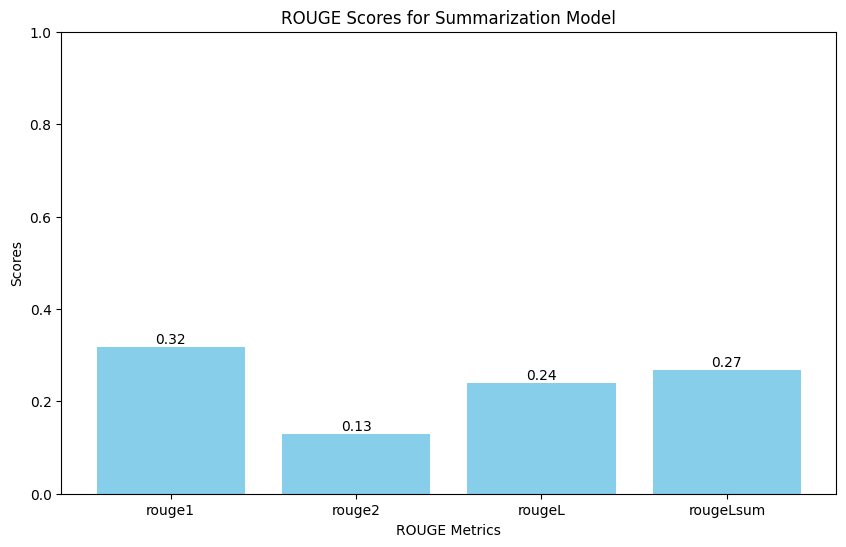

In [38]:
# prompt: plot scores

import matplotlib.pyplot as plt

# Assuming 'scores' is a dictionary as returned by rouge.compute()
# Example: scores = {'rouge1': 0.45, 'rouge2': 0.23, 'rougeL': 0.38, 'rougeLsum': 0.42}

metrics = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel("ROUGE Metrics")
plt.ylabel("Scores")
# print values in plot
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.title("ROUGE Scores for Summarization Model")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for ROUGE scores
plt.show()

#Valutazione delle Metriche
- ROUGE-1 (31.8%)
Misura l'overlap di parole singole (unigrammi) tra il riassunto generato e quello di riferimento. Un valore intorno al 30% è accettabile per compiti di riassunto astrattivo su dataset complessi come CNN/DailyMail, ma suggerisce che c'è spazio per miglioramenti.

- ROUGE-2 (13%)
Riguarda l'overlap di coppie di parole (bigrammi). Un valore del 13% è relativamente basso, il che può indicare che il modello ha difficoltà a catturare la coerenza locale o frasi significative.

- ROUGE-L (24%) e ROUGE-Lsum (26.8%)
Basano la valutazione sulla lunghezza della sottosequenza comune più lunga (longest common subsequence). Questi valori sono utili per capire quanto il modello riesce a catturare la struttura complessiva e la sintassi del riassunto di riferimento.

#Come si Collocano Questi Valori
- Per il dataset CNN/DailyMail, i modelli di base pre-addestrati come T5-small hanno metriche ROUGE-1 tra il 30-35% e ROUGE-2 tra il 10-15% senza un fine-tuning approfondito.
- Modelli avanzati e ben ottimizzati, come T5-base o BART, possono ottenere ROUGE-1 del 40-45% e ROUGE-2 del 20-25% dopo un fine-tuning esteso.
##Punti di Forza
- ROUGE-1 vicino al 32%: Dimostra che il modello cattura una buona quantità di parole chiave del riassunto di riferimento.
- Buona struttura globale: ROUGE-Lsum al 26.8% indica che il modello rispetta in parte la struttura del testo originale.
##Punti di Debolezza
- ROUGE-2 basso: Indica difficoltà nel generare frasi coese o nell'includere coppie di parole significative.
- Opportunità di miglioramento: L'addestramento aggiuntivo su dati più specifici o l'uso di tecniche avanzate (es. data augmentation o modelli più grandi) potrebbe migliorare i risultati.
##Suggerimenti per il Miglioramento
- Data Augmentation: Aumenta la varietà dei dati di training per aiutare il modello a generalizzare meglio.
- Hyperparameter Tuning: Ottimizza i parametri come il learning_rate o il numero di epoche.
- Modelli più avanzati: Usa versioni più grandi come T5-base o BART-large se hai risorse computazionali sufficienti.

###Spiegazione del Codice
####ROUGE:
1. ROUGE-1: Overlap di singole parole (unigrammi).
2. ROUGE-2: Overlap di coppie di parole (bigrammi).
3. ROUGE-L: Overlap basato sulla lunghezza della sequenza più lunga comune (longest common subsequence).

###Generazione Riassunto:
Usiamo il modello fine-tuned per generare riassunti.
La funzione generate include parametri come max_length e num_beams per controllare la lunghezza e la qualità dell'output.
###Valutazione:
La funzione rouge.compute confronta i riassunti generati con quelli di riferimento e calcola le metriche.

#Step 6: Inferenza
Qui useremo il modello T5 sia nella versione pre-addestrata che fine-tuned per generare e confrontare i riassunti di alcuni esempi di articoli.

##Obiettivi dello Step 6
- Generare riassunti con il modello pre-addestrato.
- Generare riassunti con il modello fine-tuned.
- Confrontare i riassunti generati con quelli di riferimento.


##Spiegazione del Codice
1. Funzione generate_summary:

  - Usa generate per creare riassunti.
  - Parametri chiave:
    - max_length: Lunghezza massima del riassunto generato.
    - num_beams: Numero di percorsi considerati durante la generazione (beam search).
  - Il prefisso "summarize:" indica il task al modello.
2. Confronto:

  - Usiamo due versioni del modello (pre-addestrato e fine-tuned) per generare riassunti dello stesso articolo.
  - Mostriamo i riassunti di riferimento dal dataset.
3. Input Limitato:

  - Mostriamo i primi 500 caratteri degli articoli per leggibilità.
  
##Risultati Attesi
- Modello Pre-addestrato: Riassunti più generici e meno specifici al dataset CNN/DailyMail.
- Modello Fine-Tuned: Riassunti più accurati e stilisticamente simili ai riassunti di riferimento.
- Confronto: Permette di evidenziare il miglioramento ottenuto con il fine-tuning.

In [13]:
from transformers import AutoModelForSeq2SeqLM
import torch
import random

local_model = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modello pre-addestrato
pre_trained_model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Modello fine-tuned (carica il modello affinato)
if local_model:
  fine_tuned_model = AutoModelForSeq2SeqLM.from_pretrained("./results/checkpoint-107670")  # Directory del modello salvato
else:
  from google.colab import drive
  drive.mount('/content/drive')
  fine_tuned_model = AutoModelForSeq2SeqLM.from_pretrained("/content/drive/My Drive/text-summarization/finetuned-model") # Directory drive

def generate_summary(model, tokenizer, text, device, max_length=150, num_beams=4):
    model.eval()
    model.to(device)  # Sposta il modello sul dispositivo

    # Tokenizza il testo di input e sposta sul dispositivo
    input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", truncation=True, max_length=512).to(device)

    # Genera il riassunto
    with torch.no_grad():
        summary_ids = model.generate(
            input_ids,
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=True
        )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

i = random.randint(0, len(test_data)-1)
j = random.randint(0, len(test_data)-1)
# Esempio di articoli per l'inferenza
articles = [
    test_data[i]["article"],  # Primo articolo del dataset di test
    test_data[j]["article"],  # Secondo articolo
]

# Genera riassunti
for i, article in enumerate(articles):
    print(f"\n--- Articolo {i+1} ---")
    print(f"Testo originale:\n{article[:500]}...\n")  # Mostra i primi 500 caratteri per brevità

    # Confronto tra i due modelli
    print("--- Riassunto Modello Pre-addestrato ---")
    pre_trained_summary = generate_summary(pre_trained_model, tokenizer, article, device)
    print(pre_trained_summary)

    print("\n--- Riassunto Modello Fine-Tuned ---")
    fine_tuned_summary = generate_summary(fine_tuned_model, tokenizer, article, device)
    print(fine_tuned_summary)

    print("\n--- Riassunto di Riferimento ---")
    print(test_data[i]["highlights"])


Mounted at /content/drive

--- Articolo 1 ---
Testo originale:
A shocking new video appearing to show at least 30 Christians being beheaded and shot by ISIS in Libya has been released. The 29-minute video, titled 'Until It Came To Them - Clear Evidence', shows dozens of militants holding two separate groups captive, thought to be in the south and the west of the country. At least 16 men, described by Islamic State as the 'followers of the cross from the enemy Ethiopian Church', are lined up and shot in a desert area while 12 others are filmed being forced t...

--- Riassunto Modello Pre-addestrato ---
29-minute video titled 'Until It Came To Them - Clear Evidence' shows militants holding two separate groups captive. at least 16 men, described as the 'followers of the cross from the enemy Ethiopian Church', are lined up and shot in a desert area. 12 others are forced to walk down a beach before being beheaded.

--- Riassunto Modello Fine-Tuned ---
29-minute video titled 'Until It Came T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


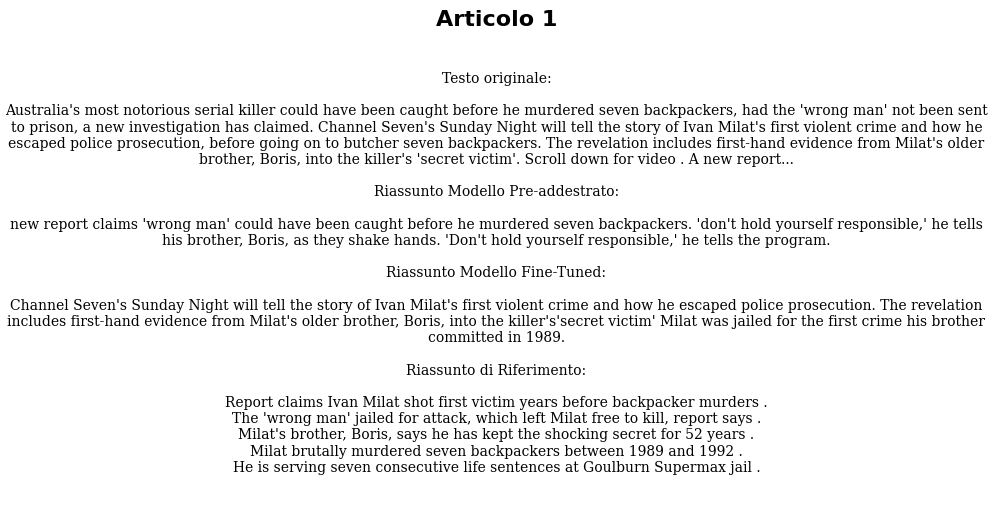

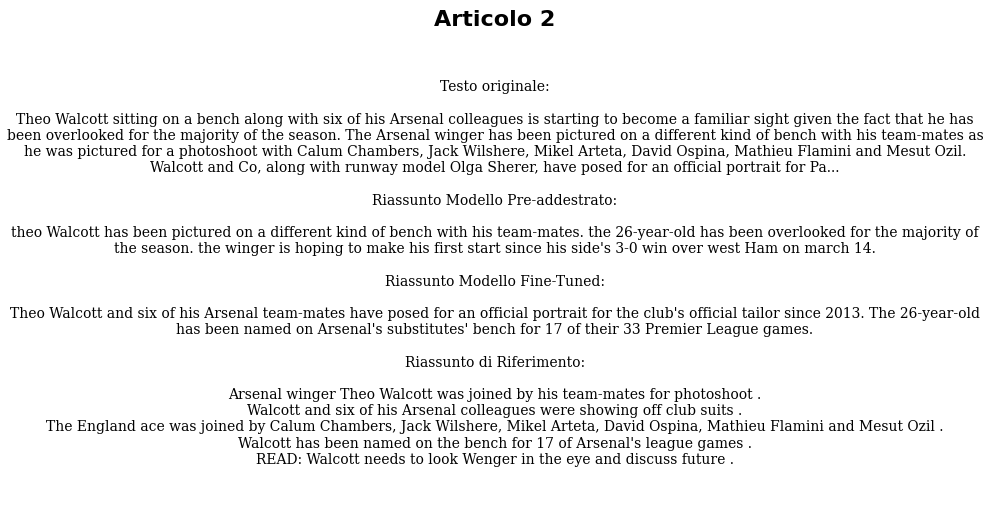

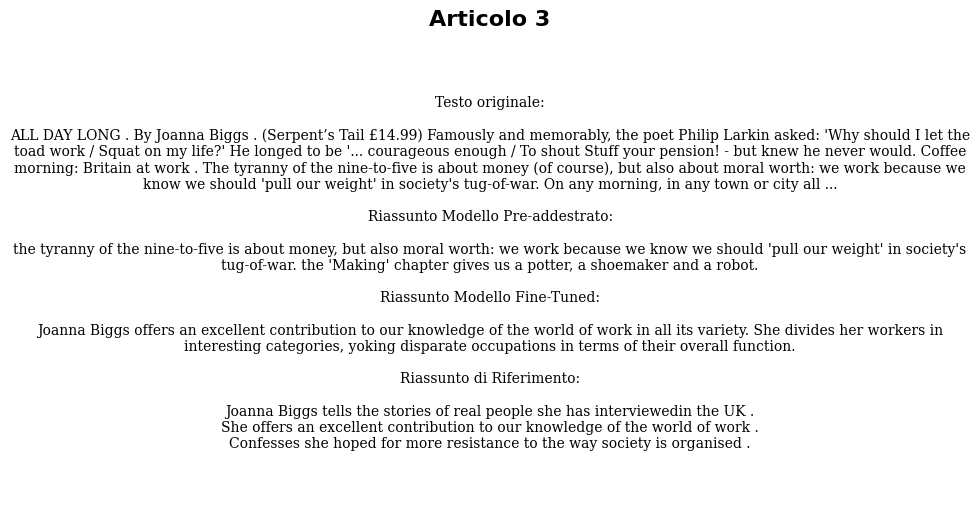

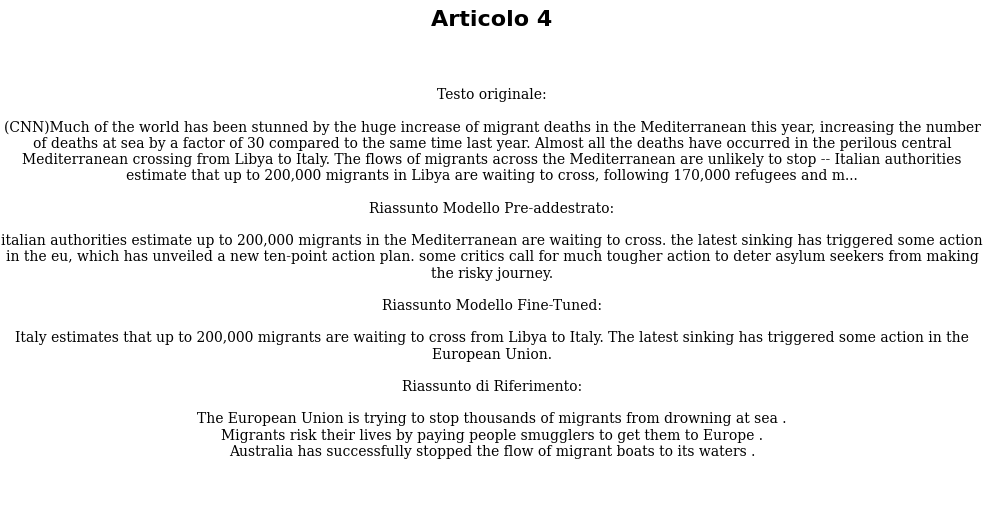

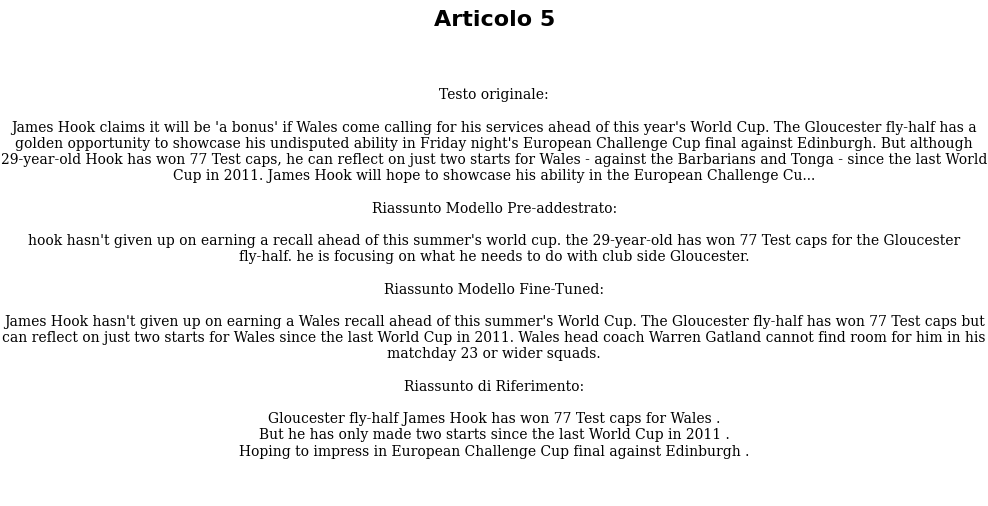

In [30]:
import matplotlib.pyplot as plt
import random
from transformers import AutoModelForSeq2SeqLM
import torch

articles_number = 5

local_model = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modello pre-addestrato
pre_trained_model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Modello fine-tuned (carica il modello affinato)
if local_model:
  fine_tuned_model = AutoModelForSeq2SeqLM.from_pretrained("./results/checkpoint-107670")  # Directory del modello salvato
else:
  from google.colab import drive
  drive.mount('/content/drive')
  fine_tuned_model = AutoModelForSeq2SeqLM.from_pretrained("/content/drive/My Drive/text-summarization/finetuned-model") # Directory drive

def generate_summary(model, tokenizer, text, device, max_length=150, num_beams=4):
    model.eval()
    model.to(device)  # Sposta il modello sul dispositivo

    # Tokenizza il testo di input e sposta sul dispositivo
    input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", truncation=True, max_length=512).to(device)

    # Genera il riassunto
    with torch.no_grad():
        summary_ids = model.generate(
            input_ids,
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=True
        )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)
def plot_article_summary(article, pre_trained_summary, fine_tuned_summary, reference_summary, index, title="Articolo"):
    title = title + " " + str(index+1)
    # Imposta lo stile della figura
    plt.figure(figsize=(10, 6))
    plt.axis('off')  # Nasconde gli assi
    plt.title(title, fontsize=16, weight="bold", loc="center")
    # Testo formattato
    text = (
        f"\n\nTesto originale:\n\n{article[:500]}...\n\n"
        f"Riassunto Modello Pre-addestrato:\n\n{pre_trained_summary}\n\n"
        f"Riassunto Modello Fine-Tuned:\n\n{fine_tuned_summary}\n\n"
        f"Riassunto di Riferimento:\n\n{reference_summary}\n"
    )

    # Aggiungi il testo al plot
    plt.text(0.5, 0.5, text, ha="center", va="center", wrap=True, fontsize=10, family="serif")

    # Mostra la figura
    plt.show()

def main(test_data, tokenizer, device, j):
    i = random.randint(0, len(test_data) - 1)
    article = test_data[i]["article"]

    # Genera i riassunti
    pre_trained_summary = generate_summary(pre_trained_model, tokenizer, article, device)
    fine_tuned_summary = generate_summary(fine_tuned_model, tokenizer, article, device)
    reference_summary = test_data[i]["highlights"]

    # Plot dell'articolo e dei riassunti
    plot_article_summary(article, pre_trained_summary, fine_tuned_summary, reference_summary, j)

# Esempio di utilizzo (aggiungere test_data e tokenizer nel contesto)
for i in range(articles_number):
    main(test_data, tokenizer, torch.device("cuda" if torch.cuda.is_available() else "cpu"),i)